In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV, RandomizedSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier 

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_recall_curve, auc

from sklearn.pipeline import Pipeline

import time
import pickle
from joblib import dump, load

In [4]:
seed = 2212

# What do you mean that my phone is obsolete?
## Inspired by Kirk Gray's [What do you mean that my phone is obsolete?](https://accendoreliability.com/mean-phone-obsolete/) for AccendoReliability and Angelo Young's [Remember flip phones? These cellphones and smartphones no longer exist](https://eu.usatoday.com/story/money/2019/07/19/google-apple-samsung-blackberry-cellphones-no-longer-exist/39681613/) for USA Today

Over the years, mobile phones emerged that many still look back on with fondness and nostalgia, phones that were discontinued because mobile technology outpaced them, or because better versions evolved from them, or because they simply couldn’t compete on price and functionality.

The technology has evolved so quickly that it’s easy to forget how recent mobile phone technology emerged and evolved. The oldest millennials could remember a time when they had never seen a mobile phone while the youngest ones may have never used a residential landline. Children born in the year the first camera phone hit the U.S. market are still in high school, while their younger siblings are older than the first Apple iPhone.

Reliability engineers have traditionally been asked to answer a common question during development of a new device or system, and that is “How long will it last?”. 
It is the eternal question in equipment reliability development, and it really comes down to “that depends on many factors”. 

The project tries to **classify cell phones that are discontinued as of September 2020 based on their specifications**.<br>
For this purpose, a dataset that contains around 10,000 records of cellphone models as scraped from an e-commerce platform (*most probably, https://www.gsmarena.com/*) is used. The dataset has been uploaded on https://www.kaggle.com/ and made publicly available by Ritesh Kumar on September 20, 2020.<br>
URL: *https://www.kaggle.com/riteshkrjha/cellphone-model-features-and-discontinuation-data*

There are a number of [mobile price classification](https://www.kaggle.com/iabhishekofficial/mobile-price-classification) or [mobile price range prediction](https://www.kaggle.com/c/mobile-price-range-prediction-is2020), but no classifications of device availability are known.

### CONTENTS
1. [EDA & Feature Engineering](#EDA&FE)<br>
    1.1. [EDA & Feature Engineering: Launch](#EDA&FE-Launch)<br>
    1.2. [EDA & Feature Engineering: Manufacturer and Model](#EDA&FE-Manufactures)<br>
    1.3. [EDA & Feature Engineering: Network](#EDA&FE-Network)<br>
    1.4. [EDA & Feature Engineering: Body](#EDA&FE-Body)<br>
    1.5. [EDA & Feature Engineering: Display](#EDA&FE-Display)<br>
    1.6. [EDA & Feature Engineering: Platform](#EDA&FE-Platform)<br>
    1.7. [EDA & Feature Engineering: Memory](#EDA&FE-Memory)<br>
    1.8. [EDA & Feature Engineering: Main Camera](#EDA&FE-MainCamera)<br>
    1.9. [EDA & Feature Engineering: Selfie Camera](#EDA&FE-SelfieCamera)<br>
    1.10. [EDA & Feature Engineering: Sound](#EDA&FE-Sound)<br>
    1.11. [EDA & Feature Engineering: Communications](#EDA&FE-Communications)<br>
    1.12. [EDA & Feature Engineering: Features](#EDA&FE-Features)<br>
    1.13. [EDA & Feature Engineering: Battery](#EDA&FE-Battery)<br>
    1.14. [EDA & Feature Engineering: Miscellaneous](#EDA&FE-Misc)<br>
    1.15. [EDA & Feature Engineering: Tests](#EDA&FE-Tests)<br>
    1.16. [EDA & Feature Engineering: Page Views](#EDA&FE-PageViews)<br>
    1.17. [EDA & Feature Engineering: Summary](#EDA&FE-Summary)<br>
2. [Feature Selection](#FeatureSelection)<br>
3. [Dimensionality Reduction](#DimReduction)<br>
4. [Dummy Classifier](#Dummy)<br>
5. [Logistic Regression](#LogisticRegression)<br>
6. [Decision Tree](#DecisionTree)<br>
7. [Random Forest](#RandomForest)<br>
8. [Support Vector Machine](#SVM)<br>
9. [Stacking Classifier](#Stacking)<br>
10. [Final Model Testing & Summary](#Summary)<br>

<a id="EDA&FE"></a>
### 1. EDA & Feature Engineering

In [5]:
df = pd.read_csv('data/mobileCompare.csv', header=0, low_memory=False)

In [6]:
df.shape

(10675, 87)

In [7]:
df.head()

,oem,model,network_technology,network_2g_bands,network_gprs,network_edge,launch_announced,launch_status,body_dimensions,body_weight,...,battery_music_play,selfie_camera_triple,main_camera_v1,selfie_camera,camera,main_camera,network,battery_talk_time,battery_stand.by,page_views_avg
0,Google,Pixel 4 XL,GSM / CDMA / HSPA / EVDO / LTE,GSM 850 / 900 / 1800 / 1900,NaN,NaN,"2019, October 15","Available. Released 2019, October 22",160.4 x 75.1 x 8.2 mm (6.31 x 2.96 x 0.32 in),193 g (6.81 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,CDMA 800 / 1900,NaN,NaN,206
1,Google,Pixel 4,GSM / CDMA / HSPA / EVDO / LTE,GSM 850 / 900 / 1800 / 1900,NaN,NaN,"2019, October 15","Available. Released 2019, October 22",147.1 x 68.8 x 8.2 mm (5.79 x 2.71 x 0.32 in),162 g (5.71 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,CDMA 800 / 1900,NaN,NaN,105
2,Google,Pixel 3a XL,GSM / CDMA / HSPA / EVDO / LTE,GSM 850 / 900 / 1800 / 1900,NaN,NaN,"2019, May 07","Available. Released 2019, May 15",160.1 x 76.1 x 8.2 mm (6.30 x 3.00 x 0.32 in),167 g (5.89 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,CDMA 800 / 1900,NaN,NaN,116
3,Google,Pixel 3a,GSM / CDMA / HSPA / EVDO / LTE,GSM 850 / 900 / 1800 / 1900,NaN,NaN,"2019, May 07","Available. Released 2019, May 15",151.3 x 70.1 x 8.2 mm (5.96 x 2.76 x 0.32 in),147 g (5.19 oz),...,NaN,NaN,NaN,NaN,NaN,NaN,CDMA 800 / 1900,NaN,NaN,141
4,Haier,N60,GSM,GSM 900 / 1800 / 1900,Class 10,No,"2005, Q1",Discontinued,94 x 48 x 25 mm (3.70 x 1.89 x 0.98 in),131 g (4.62 oz),...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,233


At the very beginning, a summary of the DataFrame is provided. It will allow us to read all column labels and will give us infomation on non-null count and data type of each column.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   oem                         10675 non-null  object
 1   model                       10675 non-null  object
 2   network_technology          10675 non-null  object
 3   network_2g_bands            10351 non-null  object
 4   network_gprs                9713 non-null   object
 5   network_edge                9719 non-null   object
 6   launch_announced            10675 non-null  object
 7   launch_status               10675 non-null  object
 8   body_dimensions             10675 non-null  object
 9   body_weight                 10583 non-null  object
 10  body_sim                    10674 non-null  object
 11  display_type                10675 non-null  object
 12  display_size                9284 non-null   object
 13  display_resolution          10626 non-null  ob

The dataset provides device specifications in **16 categories**: (1) launch, (2) manufacturer and model, (3) network, (4) body, (5) display, (6) platform, (7) memory, (8) main camera, (9) selfie camera, (10) sound, (11) communications, (12) features, (13) battery, (14) misc, (15) tests, (16) page viwes.

All features apart from `page_views_avg` are objects. That is, they are text or mixed numeric and non-numeric values.<br>
The above categories will be further explored and transformed to numerical data so that is can be processed by the Scikit-learn machine learning algorithms.

<a id="EDA&FE-Launch"></a>
#### 1.1. EDA & Feature Engineering: Launch

Within the category there are:
* `[6]` `launch_announced` or date/ month/ year of launch;
* `[7]` `launch_status` or launch status as on 09/15/2020 *(target variable)*.

Let's begin with the **target** variable. That is `launch_status` and it indicates if the device is dicontinued or not.

In [9]:
df['launch_status'].isna().sum()

0

In [10]:
df['launch_status'].sample(n=5, random_state=seed)

8976                              Cancelled
4429                           Discontinued
8287                           Discontinued
1019    Available. Released 2019, September
642                            Discontinued
Name: launch_status, dtype: object

There are no missing values. The column contains unstructured data and no specific patter is observed. Instead, we will try to **identify some keywords**.

In [11]:
launch_status_txt = df['launch_status'].str.replace('[^a-zA-z]', ' ')

cntvec_launch_status = CountVectorizer(ngram_range=(1,2), \
                                       stop_words=['january', 'february', 'march', 'april', 'may', 'june', \
                                                   'july', 'august', 'september', 'october', 'november', 'december'])

launch_status_txt_transformed = cntvec_launch_status.fit_transform(launch_status_txt)

launch_status_keywords = pd.DataFrame(launch_status_txt_transformed.toarray(), \
                                      columns=cntvec_launch_status.get_feature_names()).add_prefix('Counts_')

print(launch_status_keywords.sum())

Counts_available             4358
Counts_available released    4315
Counts_cancelled              243
Counts_coming                  73
Counts_coming soon             73
Counts_discontinued          6001
Counts_exp                     77
Counts_exp release             77
Counts_release                 77
Counts_released              4315
Counts_released exp             4
Counts_released septeber        1
Counts_septeber                 1
Counts_soon                    73
Counts_soon exp                73
dtype: int64


Several meaningful keywords are identified: ***cancelled*** or ***discontinued***, that is the status of interest and will be mapped to **'1'**, and ***available***, that is the alternative status and will be mapped to **'0'**. In addition, ***coming soon*** designates devices that are not yet available and, therefore, are not of interest and will be **dropped** from the sample.

In [12]:
df = df[~df['launch_status'].str.lower().str.contains('coming soon')]

In [13]:
df.shape

(10602, 87)

By dropping devices that are not yet available, **73 observations are filtered out**.

The **target variable** is then **created** based on `launch_status` column.

In [14]:
df['label'] = df['launch_status'].apply(lambda val: 1 if 'discontinued' in val.lower() or 
                                                         'cancelled' in val.lower()
                                                      else 0)

In [15]:
df[['launch_status', 'label']].sample(n=5, random_state=seed)

,launch_status,label
7149,Discontinued,1
8569,Discontinued,1
10108,"Available. Released 2016, May",0
3614,"Available. Released 2016, October",0
6840,Discontinued,1


Let's see what is the distribution of the lables and **how well is the dataset balanced**.

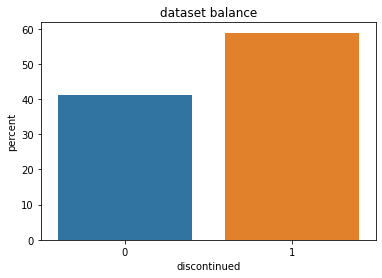

In [16]:
sns.barplot(x='label', y='label', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.title('dataset balance')
plt.xlabel('discontinued')
plt.ylabel('percent')
plt.show()

The dataset is not perfectly balanced, but **60/40 distribution** still does not need re-sampling. However, more attention should be paid on score metrics.

***Function that creates the label variable:***

In [17]:
def create_var_label(dataframe):
    """Creates dataframe['label'] and returns dataframe"""
    dataframe['label'] = dataframe['launch_status'].apply(lambda val: 1 if 'discontinued' in val.lower() or 
                                                         'cancelled' in val.lower()
                                                    else 0)
    
    return dataframe

Continuing with the first of the **explanatory variables** in the categorty: `launch_announced`.

In [18]:
df['launch_announced'].isna().sum()

0

In [19]:
df['launch_announced'].sample(n=5, random_state=seed)

7149                            2005, Q2
8569     2009, March. Released 2009, May
10108                     2016, February
3614                       2016, October
6840                            2003, Q4
Name: launch_announced, dtype: object

There are no missing values. The column contains unstructured data and no specific patter is observed. The most granular level, i.e. **announcement year**, will be extracted so as to ensure that the variable is populated for all observations.

In [20]:
df['launch_announced_year'] = df['launch_announced'].str.extract(r'(\d{4})').astype(float)

Check for **not populated observations**.

In [21]:
df[df['launch_announced_year'].isna()]['launch_announced'].unique()

array(['Not officially announced yet', 'V1', 'Not announced yet',
       'May-01', 'May-02'], dtype=object)

Devices that are *'Not announced yet'* or *'Not officially announced yet'* are **unexpected** as we have aready dropped *'Coming soon'* devices as indicated by `launch_status`. Let's try to find out more by checking their `launch_status`,

In [22]:
df[df['launch_announced'].str.contains(r'Not (?:officially )?announced yet')][['launch_announced', 'launch_status']]\
.sample(n=5, random_state=seed)

,launch_announced,launch_status
1242,Not announced yet,Cancelled
5491,Not officially announced yet,Cancelled
359,Not announced yet,Cancelled
5902,Not announced yet,Cancelled
4070,Not officially announced yet,Discontinued


It seems that those are **'rumour' devices** that have never been and will never be released. Thus, they are not of interest are **dropped** from the dataset.

In [23]:
df = df[~df['launch_announced'].str.contains(r'Not (?:officially )?announced yet')]

In [24]:
df.shape

(10527, 89)

By dropping "rumour" devices, **75 observations are filtered out**.

The rest are **imputed with min value** assuming in early year the DQ of the database was poor.

In [25]:
df['launch_announced_year'].isna().sum() / df.shape[0]

0.0018048826826256293

In [26]:
df['launch_announced_year'].fillna(df['launch_announced_year'].min(), inplace=True)
df['launch_announced_year'] = df['launch_announced_year'].astype(int)

**0.18%** if the values are **imputed**.

Let's preview the **derived data**...

In [27]:
df[['launch_announced', 'launch_announced_year']].sample(n=5, random_state=seed)

,launch_announced,launch_announced_year
2513,"2015, June",2015
5919,2000,2000
2706,2007,2007
2707,2007,2007
6620,"2009, November. Released 2010, March",2009


... and its distribution and relationship with the target variable.

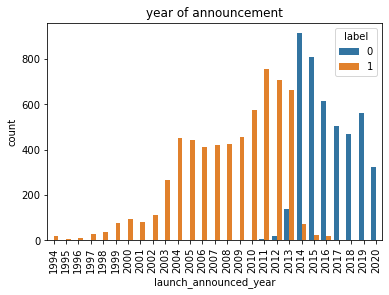

In [28]:
sns.countplot(x ='launch_announced_year', hue='label', data = df)
plt.title('year of announcement')
plt.xticks(rotation=90)
plt.show() 

This variable served us to drop some observations. However, there is one issue. The year of announcement is not exactly a device characteristic. Thus, it will be ignored.

***Function that creates the variables from the "launch" category.***

In [29]:
def create_var_launch(dataframe):
    """Creates dataframe['launch_announced_year'] and returns dataframe"""
    
    # 'launch_announced_year'
    dataframe['launch_announced_year'] = dataframe['launch_announced'].str.extract(r'(\d{4})').astype(float)
    dataframe['launch_announced_year'].fillna(dataframe['launch_announced_year'].min(), inplace=True)
    dataframe['launch_announced_year'] = dataframe['launch_announced_year'].astype(int)

    return dataframe

<a id="EDA&FE-Manufactures"></a>
#### 1.2. EDA & Feature Engineering: Manufacturer and Model

Within the category there are:
* `[0]` `oem` or original equipment manufacturer;
* `[1]` `model` of the device.

A device is identified by `oem` or original equipment manufacturer and `model` and **no missing values or duplicates are expected**.

In [30]:
df[['oem', 'model']].isna().sum()

oem      0
model    0
dtype: int64

In [31]:
df[df[['oem', 'model']].duplicated()].shape

(555, 89)

There are no missing values. However, **there are duplicates**. Let's check if all device specifications are identical.

In [32]:
df[df.iloc[:,0:86].duplicated()].shape

(555, 89)

Yes, all device specifications are identical. What about all columns, including `page_views_avg`?

In [33]:
df[df.duplicated()].shape

(1, 89)

There are **555 duplicated devices**, but with different `page_views_avg`. However, one cannot be sure which counter is correct. One approach is to **take** the last observation assuming that it is an **updated information**.

In [34]:
df = df.drop_duplicates(subset=['oem', 'model'], keep='last')

In [35]:
df.shape

(9972, 89)

By dropping duplicates, **555 observations are filtered out**.

Referring to the information value in those variables, `model` is not expected to bring any added value, this is simply the name that the manufacturer has given to the device, and it will be ignored.

On the other hand, **probably the manufacturer itself caries some information**. For example, it could be that some companies have discontinued their business and their product are no longer available. Or another one, top manufactures are expected to have high variaty of product availabe - from budget phones to flagmans. And another one, those with long history in business have a lot of discontinued model that were replaced with new ones.

In [36]:
df['oem'].sample(n=5, random_state=seed)

693     Tel.Me.
3897        HTC
2008    alcatel
6644      Nokia
3756      Honor
Name: oem, dtype: object

In [37]:
df['oem'].nunique()

116

116 unique manufacturers. That is, `oem` is a nominal categorical feature that is expected to have infomation value, but it has too many categories to be transofmed using `OneHotEncoder`.<br>
Other prossible approaches are suggested here: https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02<br>
Binary Encoding is applied: (1) the categories are first converted to numeric order starting from 1 (order is created as categories appear in a dataset and do not mean any ordinal nature), then (2) then those integers are converted into binary code, so for example 3 becomes 011, 4 becomes 100, and finally (3) the digits of the binary number form separate columns.<br>
Using `OneHotEncoder` we would end up with 116 new columns. Using Binary Encoding, there will be only 7.

In [38]:
lb_oem = LabelEncoder()
df['oem_lb'] = lb_oem.fit_transform(df['oem'])

df['oem_lb_bin'] = df['oem_lb'].apply(lambda x: format(int(x), '07b'))
df['oem_lb_bin'] = df['oem_lb_bin'].astype(str)

for i in range(7):
    df[f'oem_{i + 1}'] = df['oem_lb_bin'].str[i].astype(int)

In [39]:
df[['oem', 'oem_lb', 'oem_lb_bin', 'oem_1', 'oem_2', 'oem_3', 'oem_4', 'oem_5', 'oem_6', 'oem_7']]\
.sample(n=5, random_state=seed)

,oem,oem_lb,oem_lb_bin,oem_1,oem_2,oem_3,oem_4,oem_5,oem_6,oem_7
693,Tel.Me.,92,1011100,1,0,1,1,1,0,0
3897,HTC,33,0100001,0,1,0,0,0,0,1
2008,alcatel,110,1101110,1,1,0,1,1,1,0
6644,Nokia,61,0111101,0,1,1,1,1,0,1
3756,Honor,35,0100011,0,1,0,0,0,1,1


Give credit to top players as determined by https://ictbuz.com/top-mobile-phone-brands/

In [40]:
list_top20 = np.array(['samsung', 'apple', 'google', 'huawei', 'oneplus', 'xiaomi', 'oppo', 'vivo', 'sony', 'asus',\
                       'nokia', 'lg', 'lenovo', 'zte', 'htc', 'panasonic', 'motorola', 'alcatel', 'honor', 'tecno'])

df['oem_top20'] = np.where(df['oem'].str.lower().isin(list_top20), 1, 0)

In [41]:
df[['oem', 'oem_top20']].sample(n=5, random_state=seed)

,oem,oem_top20
693,Tel.Me.,0
3897,HTC,1
2008,alcatel,1
6644,Nokia,1
3756,Honor,1


In [42]:
df['oem_top20'].value_counts()

1    5317
0    4655
Name: oem_top20, dtype: int64

***List of variables to be used in the algorithm evaluation step:***

In [43]:
features = ['oem_1', 'oem_2', 'oem_3', 'oem_4', 'oem_5', 'oem_6', 'oem_7', 'oem_top20']

***Function that creates the variables from the "manufacturer and model" category:***

In [44]:
def create_var_oem(dataframe):
    """Creates dataframe[['oem_1', ..., 'oem_n', 'oem_top20']] and returns dataframe"""
    
    # 'oem_n' or binary encoded manufacturer
    n = len(str(bin(dataframe['oem'].nunique())[2:]))
    lb_oem = LabelEncoder()
    dataframe['oem_lb'] = lb_oem.fit_transform(dataframe['oem'])
    dataframe['oem_lb_bin'] = dataframe['oem_lb'].apply(lambda x: format(int(x), '07b'))
    dataframe['oem_lb_bin'] = dataframe['oem_lb_bin'].astype(str)
    for i in range(n):
        dataframe[f'oem_{i + 1}'] = dataframe['oem_lb_bin'].str[i].astype(int)
    
    # 'oem_top20'
    dataframe['oem_top20'] = np.where(dataframe['oem'].str.lower().isin(list_top20), 1, 0)
    
    return dataframe

 <a id="EDA&FE-Network"></a>
 #### 1.3. EDA & Feature Engineering: Network
 Within the category there are:
* `[2]` `network_technology` that lists network technologies supported<br>
and the rest that provide frequencies and other details on the specific technology
* `[3]` `network_2g_bands`, the name usually given to original GSM, CDMA, and TDMA networks. 2G networks introduced data services for mobiles starting with SMS;
* `[4]` `network_gprs` or General Packet Radio Service is a packet-switching technology that enables data transfers through cellular networks. It is used for mobile internet, MMS and other data communications. Informally, GPRS is also called 2.5G;
* `[5]` `network_edge` (also known as Enhanced GPRS or EGPRS) is a data system used on top of GSM networks. It provides nearly three times faster speeds than the outdated GPRS system. EDGE meets the requirements for a 3G network but is usually classified as 2.75G;
* `[35]` `network_3g_bands` that is loosely defined, but generally includes high data speeds, always-on data access, and greater voice capacity. The high data speeds are possibly the most prominent feature, and certainly the most hyped. They enable such advanced features as live, streaming video;
* `[36]` `network_speed`;
* `[47]` `network_4g_bands` is the fourth generation of mobile phone communications standards. It is a successor of the 3G and provides ultra-broadband internet access for mobile devices. The high data transfer rates make 4G networks suitable for use in USB wireless modems for laptops and even home internet access;
* `[66]` `network_5g_bands` is the fifth generation of mobile phone communications standards. It is a successor to 4G and promises to be faster than previous generations while opening up new uses cases for mobile data. 5G benefits from a much lower latency, resulting in very little delay. This low latency will be critical for applications such as self-driving cars. 5G uses new higher radio frequencies because they are less cluttered and can carry information much faster. However, higher frequencies don't travel as far. 5G is enabled by having a larger number of smaller multiple input and output (MIMO) antennas closer together.Currently, very few mobile phones are 5G capable;
* `[83]` `network`.

In [45]:
df[['network_technology', 'network_2g_bands', 'network_gprs', 'network_edge', 'network_3g_bands', \
         'network_speed', 'network_4g_bands', 'network_5g_bands', 'network']].isna().sum()

network_technology       0
network_2g_bands       316
network_gprs           635
network_edge           629
network_3g_bands      3784
network_speed         3744
network_4g_bands      7098
network_5g_bands      9871
network               7620
dtype: int64

Given that the rest of the columns provide additional details for the specific network technology, **only `network_technology` or supported netowork technologies will be explored**.<br>

In [46]:
df['network_technology'].sample(n=5, random_state=seed)

693                  GSM
3897          GSM / HSPA
2008                 GSM
6644          GSM / HSPA
3756    GSM / HSPA / LTE
Name: network_technology, dtype: object

There are no missing values. Different netowrk technologies are separated with */*. Let's find out what are the **possible technologies**.

In [47]:
df['network_technology_list'] = df['network_technology'].str.split(" / ")
list_technologies = df['network_technology_list'].explode().unique()
print(list_technologies)

['GSM' 'HSPA' 'LTE' 'CDMA' 'EVDO' 'UMTS' '5G' 'No cellular connectivity'
 'CDMA2000']


There are the 2G technologies (GSM, CDMA), 3G technologies (UMTS, CDMA2000, HSPA, EVDO), 4G technologies (LTE), and 5G technologies (5G). In addition, there are devices with ***No cellular connectivity***. There are tablets, smart watches, etc. with specifications not similar to cell phones and are not of interest. Therefore, they will be **dropped** from the sample.

In [48]:
list_technologies = list(list_technologies)
list_technologies.remove('No cellular connectivity')
df = df[~df['network_technology'].str.contains("No cellular connectivity")]

In [49]:
df.shape

(9672, 100)

By dropping devices with no cellular activity, **300 observations are filtered out**.

Categorical features for each type of network connectivity type, considering that **a device can support more than one technology**.

In [50]:
for i, val in enumerate(list_technologies):
    df[f'network_{val}'] = np.where(df['network_technology_list'].map(set([val]).issubset), 1, 0).astype(int)

In [51]:
df[['network_technology', 'network_GSM', 'network_HSPA', 'network_LTE', 'network_CDMA', 'network_EVDO',\
    'network_UMTS', 'network_5G', 'network_CDMA2000']].sample(n=5, random_state=seed)

,network_technology,network_GSM,network_HSPA,network_LTE,network_CDMA,network_EVDO,network_UMTS,network_5G,network_CDMA2000
5170,GSM,1,0,0,0,0,0,0,0
5926,GSM,1,0,0,0,0,0,0,0
10290,GSM / HSPA,1,1,0,0,0,0,0,0
5647,GSM / HSPA / LTE,1,1,1,0,0,0,0,0
9518,GSM,1,0,0,0,0,0,0,0


Let's check for each network technology, how may devices support it.

In [52]:
# Check distribution
df[['network_GSM', 'network_HSPA', 'network_LTE', 'network_CDMA', 'network_EVDO',
    'network_UMTS', 'network_5G', 'network_CDMA2000']].apply(pd.Series.value_counts)

,network_GSM,network_HSPA,network_LTE,network_CDMA,network_EVDO,network_UMTS,network_5G,network_CDMA2000
0,248,4096,6798,8846,9143,9323,9571,9642
1,9424,5576,2874,826,529,349,101,30


***List of variables to be used in the algorithm evaluation step:***

In [53]:
features.extend(['network_GSM', 'network_HSPA', 'network_LTE', 'network_CDMA', 'network_EVDO', 'network_UMTS',
                       'network_5G', 'network_CDMA2000']) 

***Function that creates the variables from the "network" category:***

In [54]:
def crate_var_network(dataframe):
    """Creates dataframe[['network_x', 'network_y', ...]] and returns dataframe"""
    
    # 'network_technology_list'
    dataframe['network_technology_list'] = dataframe['network_technology'].str.split(" / ")
    list_technologies = dataframe['network_technology_list'].explode().unique()
    for i, val in enumerate(list_technologies):
        dataframe[f'network_{val}'] = np.where(dataframe['network_technology_list']\
                                               .map(set([val]).issubset), 1, 0)\
                                               .astype(int)
    
    return dataframe

 <a id="EDA&FE-Body"></a>
#### 1.4. EDA & Feature Engineering: Body
Within the category there are:
* `[8]` `body_dimensions`;
* `[9]` `body_weight`;
* `[10]` `body_sim`;
* `[46]` `body`;
* `[48]` `body_build`;
* `[73]` `body_keyboard`.

In [55]:
df[['body_dimensions', 'body_weight', 'body_sim', 'body', 'body_build', 'body_keyboard']].isna().sum()

body_dimensions       0
body_weight          87
body_sim              0
body               8436
body_build         8692
body_keyboard      8981
dtype: int64

**Body dimensions** and **weight** as well as **sim size** will be explored. The rest are scarcely populated - less than 15%.

To begin with, let's explore `body_dimensions`.

In [56]:
df['body_dimensions'].sample(n=5, random_state=seed)

5170          99.8 x 51 x 15.8 mm (3.93 x 2.01 x 0.62 in)
5926     132 x 49 x 29 mm, 140 cc (5.20 x 1.93 x 1.14 in)
10290       133.8 x 67.6 x 9.3 mm (5.27 x 2.66 x 0.37 in)
5647                                                    -
9518             112 x 50 x 12 mm (4.41 x 1.97 x 0.47 in)
Name: body_dimensions, dtype: object

For `body_dimensions`, in the sample cases, **general pattern is observed**. The dimentions are provided in millimeters and inches and height, width and thickness are separated with *x*. A dedicated variable is created for each dimension.

In [57]:
df[['body_dims_height', 'body_dims_width', 'body_dims_thickness']] = \
df['body_dimensions'].str.extract(r'(\d+(?:\.\d+)?) x (\d+(?:\.\d+)?) x (\d+(?:\.\d+)?) mm').astype(float)

Let's check for additional patterns.

In [58]:
df[df['body_dims_height'].isna()]['body_dimensions'].unique()

array(['V1', '-', '7.9 mm thickness', '8.9 mm thickness',
       '6.9 mm thickness', '205.2 mm x 136.4 mm x X mm x',
       '124.4 x 61.4 x 6.3-11.2 mm', '132 x 66.7 x 6.3 - 12.5 mm',
       '9.5 mm thickness', '156.8 x Unknown x 8 mm', '247 x 179 mm',
       '9.6 mm thickness', '8.5 mm thickness',
       '148.9 x 76.1 x 6.3 - 9.8 mm', '5.1 mm thickness',
       '6.3 mm thickness', '7 mm thickness', '115.1 x 65.3 x TBC mm',
       '143.5 x 73.3 x  8.3 - 11.2 mm', '118 x 50.5 x 12-16 mm', '100 cc',
       '109.8 x 49.3 x 13.3-14.7 mm', '129 x 47 x 17-21 mm, 97 cc',
       '118 x 42-50 x 18-21 mm, 98 cc', '142 x 50-58 x 23-27 mm, 159 cc',
       '123.8 x 50.5 x 16.7-22.5 mm', '8.4 mm thickness',
       '8 mm thickness', '143.3 x 73.9', '11 mm thickness',
       '8.3 mm thickness', '9.3 mm thickness',
       '105.9 x 49.5 x 12.9 (15.9-U900T) mm',
       '241.2 x 174.3 x 10.1-20.6 mm', '8.6mm thick',
       '104 x 49 x 18-19.5 mm', '7.8 mm thickness',
       '142.4 x 73 x 8.2-9.35 mm', '15

There are some similar observations that provide thickness only. The variable `body_dims_thickness` is inset.

In [59]:
df['temp'] = \
    df.loc[df['body_dims_thickness'].isna(), 'body_dimensions'].str.extract(r'(\d+(?:.\d+)?) mm thickness')\
                                                                   .astype(float)

df.loc[df['body_dims_thickness'].isna(), 'body_dims_thickness'] = df['temp']

df = df.drop(columns=['temp'])

As for the rest no specific patter could be identified, **mean value is imputed**.

In [60]:
df['body_dims_height'].replace(0, np.NaN, inplace=True)
df['body_dims_width'].replace(0, np.NaN, inplace=True)
df['body_dims_thickness'].replace(0, np.NaN, inplace=True) 
df[['body_dims_height', 'body_dims_width', 'body_dims_thickness']].isna().sum() / df.shape[0]

body_dims_height       0.031224
body_dims_width        0.031224
body_dims_thickness    0.028950
dtype: float64

In [61]:
df['body_dims_height'].fillna(df['body_dims_height'].mean(), inplace=True)
df['body_dims_width'].fillna(df['body_dims_width'].mean(), inplace=True)
df['body_dims_thickness'].fillna(df['body_dims_thickness'].mean(), inplace=True)

**3.12%**, **3.12%**, and **2.90%**, respectively, of the values are **imputed**.

Let's preview the **derived data**.

In [62]:
df[['body_dimensions', 'body_dims_height', 'body_dims_width', 'body_dims_thickness']].sample(n=5, random_state=seed)

,body_dimensions,body_dims_height,body_dims_width,body_dims_thickness
5170,99.8 x 51 x 15.8 mm (3.93 x 2.01 x 0.62 in),99.800000,51.000000,15.800000
5926,"132 x 49 x 29 mm, 140 cc (5.20 x 1.93 x 1.14 in)",132.000000,49.000000,29.000000
10290,133.8 x 67.6 x 9.3 mm (5.27 x 2.66 x 0.37 in),133.800000,67.600000,9.300000
5647,-,127.329573,64.059733,13.013064
9518,112 x 50 x 12 mm (4.41 x 1.97 x 0.47 in),112.000000,50.000000,12.000000


As all three varables are continuous, let's **examin their distribution**.

In [63]:
quantiles = [0, 0.25, 0.5, 0.75, 1]

In [64]:
def cont_var_distribution(series):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)})
    sns.boxplot(series, ax=ax_box)
    sns.distplot(series, bins=30, ax=ax_hist)
    for q in quantiles:
        qvl = plt.axvline(series.quantile(q), color='r')
    ax_hist.legend([qvl], ['Quantiles'], loc='upper center')
    ax_box.set(xlabel='')
    
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    outliers_count = ((series < (q1 - 1.5 * iqr)) | (series > (q3 + 1.5 * iqr))).sum()
    outliers_pct = outliers_count / len(series)
    
    print(f'Outliers: {outliers_count} or {outliers_pct*100:.2f}%')
    
    skewness = series.skew()
    print(f'Skewness: {skewness:.4f}')
    
    return plt.show()

Outliers: 243 or 2.51%
Skewness: 1.4904


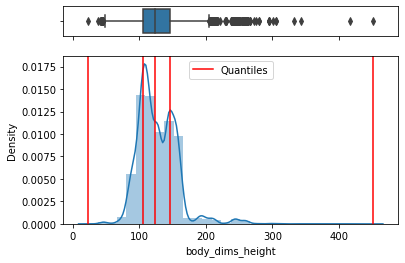

In [65]:
cont_var_distribution(df['body_dims_height'])

The variable has 2.51% ouliers and it is positively skewed. In order to reduce the skewness and to eliminate the eventual impact from outliers, **log transformation is applied** and the distribution is assessed again.

In [66]:
df['body_dims_height_log'] = np.log(df['body_dims_height'])

Outliers: 177 or 1.83%
Skewness: 0.1454


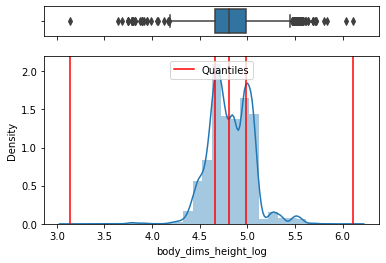

In [67]:
cont_var_distribution(df['body_dims_height_log'])

The skewness is significantly reduced, but outliers are still present. Those most probablity are wearables on the left side and tablets on the right side with funcionalities, corresponding to the onces of cell phones.<br>
Thus, in addition, a **binned categorical variable** from the countinuous once is be created.

In [68]:
quantile_labels = [1, 2, 3, 4]

In [69]:
df['body_dims_height_bin'] = pd.qcut(df['body_dims_height'], q=quantiles, labels=quantile_labels)

Similar, steps for `body_dims_width` and `body_dims_thickness` are performed.

Outliers: 360 or 3.72%
Skewness: 3.0914


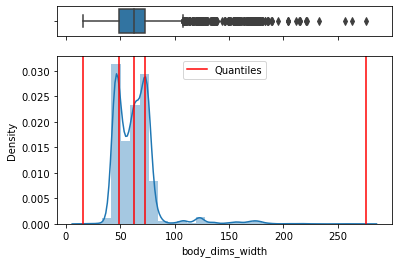

In [70]:
cont_var_distribution(df['body_dims_width'])

In [71]:
df['body_dims_width_log'] = np.log(df['body_dims_width'])

Outliers: 197 or 2.04%
Skewness: 1.0594


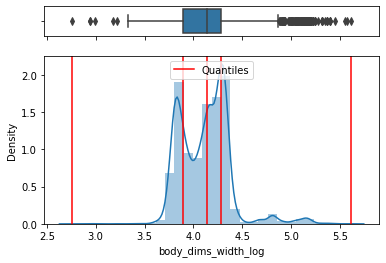

In [72]:
cont_var_distribution(df['body_dims_width_log'])

In [73]:
df['body_dims_width_bin'] = pd.qcut(df['body_dims_width'], q=quantiles, labels=quantile_labels)

Outliers: 140 or 1.45%
Skewness: 1.2431


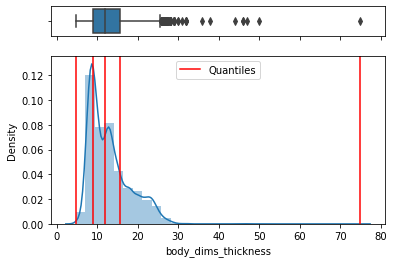

In [74]:
cont_var_distribution(df['body_dims_thickness'])

In [75]:
df['body_dims_thickness_log'] = np.log(df['body_dims_thickness'])

Outliers: 7 or 0.07%
Skewness: 0.4061


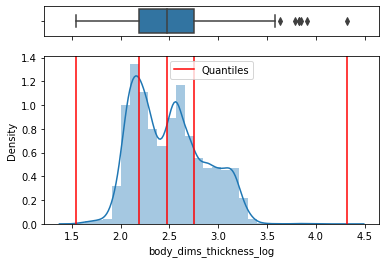

In [76]:
cont_var_distribution(df['body_dims_thickness_log'])

In [77]:
df['body_dims_thickness_bin'] = pd.qcut(df['body_dims_thickness'], q=quantiles, labels=quantile_labels)

Let's preview the **derived data**.

In [78]:
df[['body_dimensions', 'body_dims_height_log', 'body_dims_width_log', 'body_dims_thickness_log', \
    'body_dims_height_bin', 'body_dims_width_bin', 'body_dims_thickness_bin']]\
        .sample(n=5, random_state=seed)

,body_dimensions,body_dims_height_log,body_dims_width_log,body_dims_thickness_log,body_dims_height_bin,body_dims_width_bin,body_dims_thickness_bin
5170,99.8 x 51 x 15.8 mm (3.93 x 2.01 x 0.62 in),4.603168,3.931826,2.760010,1,2,4
5926,"132 x 49 x 29 mm, 140 cc (5.20 x 1.93 x 1.14 in)",4.882802,3.891820,3.367296,3,1,4
10290,133.8 x 67.6 x 9.3 mm (5.27 x 2.66 x 0.37 in),4.896346,4.213608,2.230014,3,3,2
5647,-,4.846779,4.159816,2.565954,3,3,3
9518,112 x 50 x 12 mm (4.41 x 1.97 x 0.47 in),4.718499,3.912023,2.484907,2,2,3


***List of variables to be used in the algorithm evaluation step:***

In [79]:
features.extend(['body_dims_height_log', 'body_dims_width_log', 'body_dims_thickness_log', \
                 'body_dims_height_bin', 'body_dims_width_bin', 'body_dims_thickness_bin'])

Continuing with the next variable in the categorty: `body_weight`.

In [80]:
df['body_weight'].sample(n=5, random_state=seed)

5170      95 g (3.35 oz)
5926     149 g (5.26 oz)
10290                  -
5647                   -
9518      96 g (3.39 oz)
Name: body_weight, dtype: object

For `body_weight`, in the sample cases, **general pattern is observed**. The weight is provided in grams and ounces and specific pattern is observed. A numberic variable for body weight is created.

In [81]:
df['body_weight_g'] = df['body_weight'].str.replace(',', '.').str.extract(r'(\d+(?:[\.]\d+)?) g').astype(float)

Let's search for additional patterns.

In [82]:
df[df['body_weight_g'].isna()]['body_weight'].value_counts()

-                                       744
110.6 (3.88 oz)                           3
167 (5.89 oz)                             2
83g (2.93 oz)                             2
126.5 (4.44 oz)                           2
                                       ... 
607.8 (1.34 lb)                           1
104 (3.67 oz)                             1
83.6 (2.93 oz)                            1
130g (4.59 oz)                            1
389g (Wi-Fi) / 392g (LTE) (10.51 oz)      1
Name: body_weight, Length: 80, dtype: int64

Two **additional patterns** are identified: (1) weight without units and (2) weight and unites without space in between. The variable is inset.

In [83]:
df['temp'] = \
df.loc[df['body_weight_g'].isna(), 'body_weight'].str.replace(',', '.').str.extract(r'(\d+(?:[\.]\d+)?)').astype(float)

df.loc[df['body_weight_g'].isna(), 'body_weight_g'] = df['temp']

df = df.drop(columns='temp')

The rest are **imputed with the mean value**.

In [84]:
df['body_weight_g'].isna().sum() / df.shape[0]

0.0859181141439206

In [85]:
df['body_weight_g'].fillna(df['body_weight_g'].mean(), inplace=True)

**8.59%** of the values are **imputed**.

Let's preview the derived data.

In [86]:
df[['body_weight', 'body_weight_g']].sample(n=5, random_state=seed)

,body_weight,body_weight_g
5170,95 g (3.35 oz),95.000000
5926,149 g (5.26 oz),149.000000
10290,-,140.462264
5647,-,140.462264
9518,96 g (3.39 oz),96.000000


Let's **examin its distribution**.

Outliers: 416 or 4.30%
Skewness: 4.0776


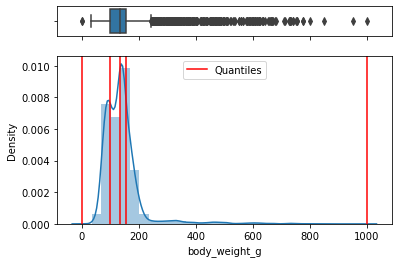

In [87]:
cont_var_distribution(df['body_weight_g'])

Again, presense of ouliers and positively skewed data. **Log transformation is applied**.

In [88]:
df['body_weight_g_log'] = np.log(df['body_weight_g'])

Outliers: 320 or 3.31%
Skewness: 0.6594


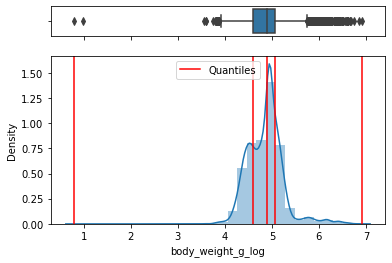

In [89]:
cont_var_distribution(df['body_weight_g_log'])

Still, many outliers are present. In addition, **binned categorical variable** from the countinuous one will be created.

In [90]:
df['body_weight_g_bin'] = pd.qcut(df['body_weight_g'], q=quantiles, labels=quantile_labels)

Let's preview the derived data.

In [91]:
df[['body_weight', 'body_weight_g_log', 'body_weight_g_bin']].sample(n=5, random_state=seed)

,body_weight,body_weight_g_log,body_weight_g_bin
5170,95 g (3.35 oz),4.553877,1
5926,149 g (5.26 oz),5.003946,3
10290,-,4.944939,3
5647,-,4.944939,3
9518,96 g (3.39 oz),4.564348,1


***List of variables to be used in the algorithm evaluation step:***

In [92]:
features.extend(['body_weight_g_log', 'body_weight_g_bin'])

Continuing with the next variable in the categorty: `body_sim`.

In [93]:
df['body_sim'].sample(n=5, random_state=seed)

5170                                Mini-SIM
5926                                Mini-SIM
10290                               Dual SIM
5647     Dual SIM (Micro-SIM, dual stand-by)
9518                     Dual SIM (Mini-SIM)
Name: body_sim, dtype: object

Possible useful information that can be extracted is:
* SIM size:
    * Replaceable SIM cards come in four standard sizes:
        * Full-size (85.6mm × 53.98mm × 0.76 mm)
        * Mini-SIM (25mm x 15mm x 0.76mm)
        * Micro-SIM (15mm x 12mm x 0.76mm)
        * Nano-SIM (12.3mm × 8.8mm × 0.67mm)
    * The eSIM or Embedded SIM comes in one size:
        * eSIM (6mm x 5mm x <1mm) Non Removable
        
* Number of SIM slots:
    * Single
    * Dual
    * Triple
    * Quad
    
 Note that, theoretically, it is possible that a device with more than one SIM slot can have different SIM types.
 
 Let's try to **idendify** some of those **keywords** with the series.

In [94]:
body_sim_txt = df['body_sim'].str.replace('[^a-zA-z]', ' ')

cntvec_body_sim = CountVectorizer(ngram_range=(1,1), stop_words='english')

body_sim_txt_transformed = cntvec_body_sim.fit_transform(body_sim_txt)

body_sim_keywords = pd.DataFrame(body_sim_txt_transformed.toarray(), \
                                      columns=cntvec_body_sim.get_feature_names()).add_prefix('Counts_')

print(body_sim_keywords.sum())

Counts_africa              2
Counts_alcatel             1
Counts_bbb                 1
Counts_bbf                 1
Counts_built               1
Counts_card               32
Counts_china               4
Counts_dual             6881
Counts_electronic         26
Counts_esim               60
Counts_fd                  2
Counts_fhybrid             1
Counts_hybrid            678
Counts_installed           4
Counts_micro            1804
Counts_mini             5671
Counts_mobile              1
Counts_model               6
Counts_models              1
Counts_ms                  1
Counts_mt                  1
Counts_nano             2125
Counts_nanosim             1
Counts_non                 3
Counts_nxt                 2
Counts_onlydual            1
Counts_onlyhybrid          1
Counts_optional            1
Counts_ot                  1
Counts_pe                  1
Counts_pre                 4
Counts_preinstalled        1
Counts_quad                2
Counts_removable           3
Counts_sim    

Several meaningful keywords are identified: (1) for sim size: 'esim', 'micro', 'mini', 'nano', 'non-removable'; (2) for number of sim slots: 'dual', 'quad', 'single', 'triple'.

Let's create binary **categorical variable for each SIM size** and a **variable indicating the number of SIM slots**.

In [95]:
df['body_sim_mini'] = \
    np.where(df['body_sim'].str.lower().str.contains('mini', case=False, na=False), 1, 0)
df['body_sim_micro'] = \
    np.where(df['body_sim'].str.lower().str.contains('micro', case=False, na=False), 1, 0)
df['body_sim_nano'] = \
    np.where(df['body_sim'].str.lower().str.contains('nano', case=False, na=False), 1, 0)
df['body_sim_eSIM'] = \
    np.where(df['body_sim'].str.lower().str.contains('esim|non-removable', case=False, na=False), 1, 0)

In [96]:
conditions = [
    (df['body_sim'].str.contains('Dual', case=False, na=False)),
    (df['body_sim'].str.contains('Triple', case=False, na=False)),
    (df['body_sim'].str.contains('Quad', case=False, na=False))]
choices = [2, 3, 4]
df['body_sim_num'] = np.select(conditions, choices, default=1)

If all categories are `0` it is assumed that the device is with Single Full-size SIM.

Let's check for additional SIM types and additional indicators for devices with more than one SIM slot.

In [97]:
condition = (df['body_sim_mini'] == 0) & (df['body_sim_micro'] == 0) & (df['body_sim_nano'] == 0) & \
            (df['body_sim_eSIM'] == 0)
df[condition]['body_sim'].unique()

array(['Dual SIM', 'Dual SIM (dual stand-by)', 'No', 'Yes',
       'Single SIM or Dual SIM', 'Pre-installed',
       'Single SIM or Dual SIM (dual stand-by)',
       'Dual SIM (Dual stand-by)', 'Hybrid Dual SIM',
       'Hybrid Dual SIM (Dual stand-by)', 'Dual SIM, (dual stand-by)',
       'Single SIM or Hybrid Dual SIM', 'Dual SIM, (Dual stand-by)',
       'Yes, preinstalled', 'Triple SIM',
       'Hybrid Dual SIM ( X5v, X5s)/ Single SIM (X5L)'], dtype=object)

In [98]:
df[df['body_sim_num']==1]['body_sim'].unique()

array(['Micro-SIM', 'Mini-SIM', 'Nano-SIM', 'eSIM',
       'Nano-SIM card & eSIM', 'Nano-SIM, eSIM', 'No', 'MIni-SIM', 'Yes',
       'Pre-installed Nano-SIM', 'Nano-SIM and/or eSIM',
       'Single SIM (Nano-SIM)', 'Pre-installed',
       'Nano-SIM, Electronic SIM card (eSIM)',
       'Electronic SIM card (eSIM)', 'Micro-SIM (built-in)',
       'Single SIM (Micro-SIM) - optional', 'Yes, preinstalled',
       'Non-removable', 'Micro-SIM - 3G model', 'Nano-SIM or eSIM'],
      dtype=object)

Devices **without SIM** are **dropped**.

In [99]:
df = df[df['body_sim'] != 'No']

In [100]:
df.shape

(9665, 125)

By dropping devices without SIM slot, **7 obserations are filtered out**.

Let's preview the **derived data**.

In [101]:
df[['body_sim', 'body_sim_mini', 'body_sim_micro', 'body_sim_nano', 'body_sim_eSIM', 'body_sim_num']]\
.sample(n=5, random_state=seed)

,body_sim,body_sim_mini,body_sim_micro,body_sim_nano,body_sim_eSIM,body_sim_num
6517,Mini-SIM,1,0,0,0,1
5590,"Hybrid Dual SIM (Nano-SIM, dual stand-by)",0,0,1,0,2
5548,"Dual SIM (Nano-SIM, dual stand-by)",0,0,1,0,2
7219,Mini-SIM,1,0,0,0,1
2814,Mini-SIM,1,0,0,0,1


Let's check for each SIM type, how many devices have available SIM slot and how many slots they have.

In [102]:
df[['body_sim_mini', 'body_sim_micro', 'body_sim_nano', 'body_sim_eSIM']].apply(pd.Series.value_counts)

,body_sim_mini,body_sim_micro,body_sim_nano,body_sim_eSIM
0,4040,7993,7852,9602
1,5625,1672,1813,63


In [103]:
df['body_sim_num'].value_counts()

1    5437
2    4202
3      24
4       2
Name: body_sim_num, dtype: int64

***List of variables to be used in the algorithm evaluation step:***

In [104]:
features.extend(['body_sim_mini', 'body_sim_micro', 'body_sim_nano', 'body_sim_eSIM', 'body_sim_num'])

***Fnction that creates the variables from the "body" category:***

In [105]:
def create_var_body_dimensions(dataframe):
    """Creates dataframe[['body_dims_height_log', 'body_dims_width_log', 'body_dims_thickness_log', \
    'body_dims_height_bin', 'body_dims_width_bin', 'body_dims_thickness_bin', 'body_weight_g_log', \
    'body_weight_g_bin','body_sim_mini', 'body_sim_micro', 'body_sim_nano', 'body_sim_eSIM', 'body_sim_num']] \
    and returns dataframe"""
    
    # 'body_dims_height', 'body_dims_width', 'body_dims_thickness'
    dataframe[['body_dims_height', 'body_dims_width', 'body_dims_thickness']] = \
    dataframe['body_dimensions'].str.extract(r'(\d+(?:\.\d+)?) x (\d+(?:\.\d+)?) x (\d+(?:\.\d+)?) mm').astype(float)
    
    # inset 'body_dims_thickness'
    dataframe['temp'] = \
    dataframe.loc[dataframe['body_dims_thickness'].isna(), 'body_dimensions'].str.extract(r'(\d+(?:.\d+)?) mm thickness').astype(float)
    dataframe.loc[dataframe['body_dims_thickness'].isna(), 'body_dims_thickness'] = dataframe['temp']
    dataframe = dataframe.drop(columns=['temp'])
    
    # impute 'body_dims_height', 'body_dims_width', 'body_dims_thickness'
    dataframe['body_dims_height'].replace(0, np.NaN, inplace=True)
    dataframe['body_dims_width'].replace(0, np.NaN, inplace=True)
    dataframe['body_dims_thickness'].replace(0, np.NaN, inplace=True)
    dataframe['body_dims_height'].fillna(dataframe['body_dims_height'].mean(), inplace=True)
    dataframe['body_dims_width'].fillna(dataframe['body_dims_width'].mean(), inplace=True)
    dataframe['body_dims_thickness'].fillna(dataframe['body_dims_thickness'].mean(), inplace=True)
    
    # 'body_dims_height_log', 'body_dims_width_log', 'body_dims_thickness_log'
    dataframe['body_dims_height_log'] = np.log(dataframe['body_dims_height'])
    dataframe['body_dims_width_log'] = np.log(dataframe['body_dims_width'])
    dataframe['body_dims_thickness_log'] = np.log(dataframe['body_dims_thickness'])
    
    # 'body_dims_height_bin', 'body_dims_width_bin', 'body_dims_thickness_bin'
    quantiles = [0, 0.25, 0.5, 0.75, 1]
    quantile_labels = [1, 2, 3, 4]
    dataframe['body_dims_height_bin'] = pd.qcut(dataframe['body_dims_height'], q=quantiles, labels=quantile_labels)
    dataframe['body_dims_width_bin'] = pd.qcut(dataframe['body_dims_width'], q=quantiles, labels=quantile_labels)
    dataframe['body_dims_thickness_bin'] = pd.qcut(dataframe['body_dims_thickness'], q=quantiles, labels=quantile_labels)
    
    # 'body_weight_g'
    dataframe['body_weight_g'] = dataframe['body_weight'].str.replace(',', '.').str.extract(r'(\d+(?:[\.]\d+)?) g').astype(float)
    
    # inset 'body_weight_g'
    dataframe['temp'] = \
    dataframe.loc[dataframe['body_weight_g'].isna(), 'body_weight'].str.replace(',', '.').str.extract(r'(\d+(?:[\.]\d+)?)').astype(float)
    dataframe.loc[dataframe['body_weight_g'].isna(), 'body_weight_g'] = dataframe['temp']
    dataframe = dataframe.drop(columns='temp')
    
    # impute 'body_weight_g'
    dataframe['body_weight_g'].fillna(dataframe['body_weight_g'].mean(), inplace=True)
    
    # 'body_weight_g_log'
    dataframe['body_weight_g_log'] = np.log(dataframe['body_weight_g'])
    
    # 'body_weight_g_bin'
    dataframe['body_weight_g_bin'] = pd.qcut(dataframe['body_weight_g'], q=quantiles, labels=quantile_labels)
    
    # 'body_sim_mini', 'body_sim_micro', 'body_sim_nano', 'body_sim_eSIM'
    dataframe['body_sim_mini'] = np.where(dataframe['body_sim'].str.lower().str.contains('mini', case=False, na=False), 1, 0)
    dataframe['body_sim_micro'] = np.where(dataframe['body_sim'].str.lower().str.contains('micro', case=False, na=False), 1, 0)
    dataframe['body_sim_nano'] = np.where(dataframe['body_sim'].str.lower().str.contains('nano', case=False, na=False), 1, 0)
    dataframe['body_sim_eSIM'] = np.where(dataframe['body_sim'].str.lower().str.contains('esim|non-removable', case=False, na=False), 1, 0)
    
    # 'body_sim_num'
    conditions = [
        (dataframe['body_sim'].str.contains('Dual', case=False, na=False)),
        (dataframe['body_sim'].str.contains('Triple', case=False, na=False)),
        (dataframe['body_sim'].str.contains('Quad', case=False, na=False))]
    choices = [2, 3, 4]
    dataframe['body_sim_num'] = np.select(conditions, choices, default=1)
    
    return dataframe

 <a id="EDA&FE-Display"></a>
#### 1.5. EDA & Feature Engineering: Display
Within the category there are:
* `[11]` `display_type`;
* `[12]` `display_size`;
* `[13]` `display_resolution`;
* `[14]` `display`;
* `[49]` `display_protection`.

In [106]:
df[['display_type', 'display_size', 'display_resolution', 'display', 'display_protection']].isna().sum()

display_type             0
display_size          1175
display_resolution      40
display               6819
display_protection    7825
dtype: int64

**Display type**, **size**, and **resolution** be explored. The rest are scarcely populated - less than 30%.

To begin with, let's explore `display_type`.

In [107]:
df['display_type'].sample(n=5, random_state=seed)

6517                                    TFT, 65K colors
5590    IGZO IPS LCD capacitive touchscreen, 16M colors
5548    IGZO IPS LCD capacitive touchscreen, 16M colors
7219                                   TFT, 256K colors
2814                                         65K colors
Name: display_type, dtype: object

There are many display/ panel types used in smartphones today.

These include:

* LCD (Liquid Crystal Display)
    * TFT (Thin-Film Transistor)
    * TFD (Thin-Film Diode)
    * STN (Super-Twisted Nematic display) - monochrome
    * CSTN (Color Super-Twisted Nematic display)
* IPS-LCD (In-Plane Switching Liquid Crystal Display)
* OLED (Organic Light-Emitting Diode)
* AMOLED (Active-Matrix Organic Light-Emitting Diode)

Touch sensors include:

* Resistive touch sensors
* Capacitive touch sensors

Color depth vary:
* 1-bit color - 2 colors, often black and white, or monochrome
* 2-bit color - 4 colors, usually from a selection of fixed palettes
* 3-bit color - 8 colors, almost always all combinations of full-intensity red, green, and blue
* 4-bit color - 16 colors
* 5-bit color - 32 colors
* 8-bit color - 256 colors
* 12-bit color - 4096 colors
* 16-bit (high color) - 65,536 colors (65K)
* 18-bit - 64×64×64 = 262,144 combinations (256K)
* 24-bit (true color) - 24 bits almost always use 8 bits each of R, G, and B. 16,777,216 color variations. (16M)

Let's extract some information using those keywords. One option is to create a "clean" variables that later to be encoded or directly to create different variables for different types of displays. We opt for the second one and it is perfomed at single step.

In [108]:
df['display_type_LCD'] = \
    np.where(df['display_type'].str.contains('LCD') & ~df['display_type'].str.contains('IPS'), 1, 0)
df['display_type_TFT'] = np.where(df['display_type'].str.contains('TFT'), 1, 0)
df['display_type_TFD'] = np.where(df['display_type'].str.contains('TFD'), 1, 0)
df['display_type_STN'] = \
    np.where(df['display_type'].str.contains('STN') & ~df['display_type'].str.contains('CSTN'), 1, 0)
df['display_type_CSTN'] = np.where(df['display_type'].str.contains('CSTN'), 1, 0)
df['display_type_IPS'] = np.where(df['display_type'].str.contains('IPS'), 1, 0)
df['display_type_OLED'] = \
    np.where(df['display_type'].str.contains('OLED') & ~df['display_type'].str.contains('AMOLED'), 1, 0)
df['display_type_AMOLED'] = np.where(df['display_type'].str.contains('AMOLED'), 1, 0)

Let's check how many devices are with each display type.

In [109]:
df[['display_type_LCD', 'display_type_TFT', 'display_type_TFD', 'display_type_STN', 'display_type_CSTN', \
    'display_type_IPS', 'display_type_OLED', 'display_type_AMOLED']].sum()

display_type_LCD        216
display_type_TFT       4334
display_type_TFD         20
display_type_STN        114
display_type_CSTN       477
display_type_IPS       2850
display_type_OLED       129
display_type_AMOLED     711
dtype: int64

**No information** for 814 display types or **8.42%**.

Proceed with creating variables for touchscreen display.

In [110]:
df['display_type_resistive'] = np.where(df['display_type'].str.contains('resistive', case=False), 1, 0)
df['display_type_capacitive'] = np.where(df['display_type'].str.contains('capacitive', case=False), 1, 0)

In [111]:
df[['display_type_resistive', 'display_type_capacitive']].sum()

display_type_resistive      588
display_type_capacitive    5356
dtype: int64

5,944 or **61.50%** devices are **with touchscreen**.

For **display color** type again categorical features are created considering that the maginitude of **human eye sensitivity** is not corresponding to the differences between different color depths.

In [112]:
df['display_type_1bit'] = np.where(df['display_type'].str.contains("monochrome", case=False), 1, 0)
df['display_type_2bit'] = np.where(df['display_type'].str.contains("4 "), 1, 0)
df['display_type_3bit'] = np.where(df['display_type'].str.contains("8 "), 1, 0)
df['display_type_4bit'] = np.where(df['display_type'].str.contains("16 "), 1, 0)
df['display_type_5bit'] = np.where(df['display_type'].str.contains("32 "), 1, 0)
df['display_type_8bit'] = np.where(df['display_type'].str.contains("256 "), 1, 0)
df['display_type_12bit'] = np.where(df['display_type'].str.contains("4096"), 1, 0)
df['display_type_16bit'] = np.where(df['display_type'].str.contains("65K", case=False), 1, 0)
df['display_type_18bit'] = np.where(df['display_type'].str.contains("256K", case=False), 1, 0)
df['display_type_24bit'] = np.where(df['display_type'].str.contains("16M", case=False), 1, 0)

Check how those are populated.

In [113]:
df[['display_type_1bit', 'display_type_2bit', 'display_type_3bit', 'display_type_4bit', 'display_type_5bit', \
    'display_type_8bit', 'display_type_12bit', 'display_type_16bit', 'display_type_18bit', 'display_type_24bit']]\
.apply(pd.Series.value_counts)

,display_type_1bit,display_type_2bit,display_type_3bit,display_type_4bit,display_type_5bit,display_type_8bit,display_type_12bit,display_type_16bit,display_type_18bit,display_type_24bit
0,9339,9636,9665.0,9663,9665.0,9633,9546,7953,7767,4965
1,326,29,NaN,2,NaN,32,119,1712,1898,4700


**No information** for 847 display color types or **8.76%**. In addition, 'display_type_3bit', 'display_type_4bit', and 'display_type_5bit' have very **limited number** of hits. Thus, they are **dropped**.

In [114]:
df = df.drop(columns=['display_type_3bit', 'display_type_4bit', 'display_type_5bit'])

Let's preview the **derived data**.

In [115]:
df[['display_type', 'display_type_LCD', 'display_type_TFT', 'display_type_TFD', 'display_type_STN', \
    'display_type_CSTN', 'display_type_IPS', 'display_type_OLED', 'display_type_AMOLED', \
    'display_type_resistive', 'display_type_capacitive', \
    'display_type_1bit', 'display_type_2bit', 'display_type_8bit', 'display_type_12bit', 'display_type_16bit', \
    'display_type_18bit', 'display_type_24bit']].sample(n=5, random_state=seed)

,display_type,display_type_LCD,display_type_TFT,display_type_TFD,display_type_STN,display_type_CSTN,display_type_IPS,display_type_OLED,display_type_AMOLED,display_type_resistive,display_type_capacitive,display_type_1bit,display_type_2bit,display_type_8bit,display_type_12bit,display_type_16bit,display_type_18bit,display_type_24bit
6517,"TFT, 65K colors",0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5590,"IGZO IPS LCD capacitive touchscreen, 16M colors",0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
5548,"IGZO IPS LCD capacitive touchscreen, 16M colors",0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
7219,"TFT, 256K colors",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2814,65K colors,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


***List of variables to be used in the algorithm evaluation step:***

In [116]:
features.extend(['display_type_LCD', 'display_type_TFT', 'display_type_TFD', 'display_type_STN', \
    'display_type_CSTN', 'display_type_IPS', 'display_type_OLED', 'display_type_AMOLED', \
    'display_type_resistive', 'display_type_capacitive', \
    'display_type_1bit', 'display_type_2bit', 'display_type_8bit', 'display_type_12bit', 'display_type_16bit', \
    'display_type_18bit', 'display_type_24bit'])

Continuing with the next variable in the categorty: `display_size`

In [117]:
df['display_size'].sample(n=5, random_state=seed)

6517    1.45 inches, 6.8 cm (~14.1% screen-to-body ratio)
5590    5.5 inches, 82.6 cm (~72.8% screen-to-body ratio)
5548    5.45 inches, 76.7 cm (~73.6% screen-to-body ra...
7219                                                  NaN
2814    2.5 inches, 19.4 cm (~25.7% screen-to-body ratio)
Name: display_size, dtype: object

**General pattern is observed**. Usually, display size is provided in inches. Also, the screen-to-body ratio is useful. Variables for both are created.

In [118]:
df['display_size_in'] = df['display_size'].str.extract(r"(\d+(?:\.\d+)?) inches").astype(float)
df['display_size_ratio'] = df['display_size'].str.extract(r"(\d+(?:\.\d+)?)% screen\-to\-body ratio").astype(float)

Search for addional patterns.

In [119]:
df[df['display_size_in'].isna()]['display_size'].unique()

array([nan, ', -', ', 26 x 28 mm', ', 53 x 40 mm'], dtype=object)

In [120]:
df[df['display_size_ratio'].isna()]['display_size'].unique()

array(['2.15 inches, 14.3 cm', nan, '1.44 inches', '6.26 inches, 97.8 cm',
       '4.0 inches, 45.5 cm', '3.5 inches, 34.9 cm', '4.0 inches',
       '10.1 inches, 295.8 cm', '1.3 inches, 5.5 cm',
       '2.2 inches, 35 x 44 mm, 15.2 cm', '4.5 inches, 55.8 cm',
       '2.0 inches', '1.8 inches', '5.5 inches, 83.4 cm',
       '8.0 inches, 198.2 cm', '7.9 inches, 193.3 cm',
       '5.2 inches, 74.5 cm', '3.2 inches', '3.0 inches', '2.4 inches',
       '3.5 inches, 36.5 cm', '2.4 inches, 17.8 cm', ', -',
       '1.8 inches, 10.2 cm', '7.0 inches, 137.9 cm',
       '4.5 inches, 64.9 cm', '2.8 inches, 24.3 cm',
       '2.6 inches, 20.9 cm', '5.0 inches, 68.9 cm',
       '5.0 inches, 71.2 cm', '7.0 inches, 139.5 cm',
       '3.2 inches, 30.5 cm', '4.7 inches, 60.9 cm',
       '4.0 inches, 47.6 cm', '1.77 inches, 9.9 cm',
       '4.63 inches, 59.1 cm', '3.2 inches, 29.1 cm',
       '2.0 inches, 12.6 cm', '2.2 inches, 15.2 cm',
       '5.45 inches, 76.7 cm', '5.99 inches, 92.6 cm', '1.3 inches'

No additinal patters are identified. Missing values are **imputed with mean values for each display type**.

In [121]:
df[['display_size_in', 'display_size_ratio']].isna().sum() / df.shape[0]

display_size_in       0.123435
display_size_ratio    0.152406
dtype: float64

In [122]:
conditions = [
    (df['display_type_LCD'] == 1),
    (df['display_type_TFT'] == 1),
    (df['display_type_TFD'] == 1),
    (df['display_type_STN'] == 1),
    (df['display_type_CSTN'] == 1),
    (df['display_type_IPS'] == 1),
    (df['display_type_OLED'] == 1),
    (df['display_type_AMOLED'] == 1)]
choices = ['LCD', 'TFT', 'TFD', 'STN', 'CSTN', 'IPS', 'OLED', 'AMOLED']
df['display_type_cat'] = np.select(conditions, choices, default='OTHER')

df['display_size_in'] = df.groupby('display_type_cat')['display_size_in'].transform(lambda x: x.fillna(x.mean()))
df['display_size_ratio'] = df.groupby('display_type_cat')['display_size_ratio'].transform(lambda x: x.fillna(x.mean()))

**12.34%** and **15.24%**, respectively, of the values are **imputed**.

Let's preview the **derived data**.

In [123]:
df[['display_size', 'display_size_in', 'display_size_ratio']].sample(n=5, random_state=seed)

,display_size,display_size_in,display_size_ratio
6517,"1.45 inches, 6.8 cm (~14.1% screen-to-body ratio)",1.450000,14.100000
5590,"5.5 inches, 82.6 cm (~72.8% screen-to-body ratio)",5.500000,72.800000
5548,"5.45 inches, 76.7 cm (~73.6% screen-to-body ra...",5.450000,73.600000
7219,NaN,2.921863,38.035319
2814,"2.5 inches, 19.4 cm (~25.7% screen-to-body ratio)",2.500000,25.700000


Let's **examine their distribution**.

Outliers: 142 or 1.47%
Skewness: 0.8299


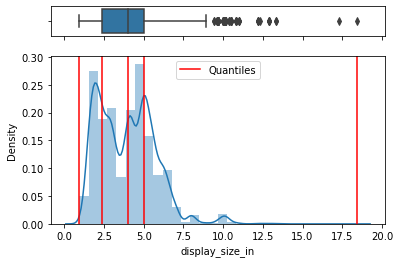

In [124]:
cont_var_distribution(df['display_size_in'])

The skewness and the outliers are no so significant, but there are two peaks in data. Still, let's **apply log transformation**.

In [125]:
df['display_size_in_log'] = np.log(df['display_size_in'])

Outliers: 2 or 0.02%
Skewness: -0.2088


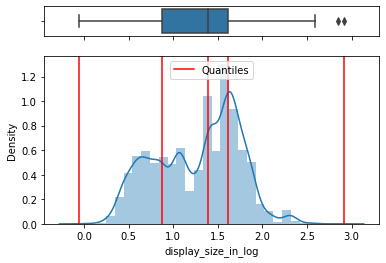

In [126]:
cont_var_distribution(df['display_size_in_log'])

Due to those two peaks, the log transformation actully made the data **negatively skewed**. Still, the absolute value is lower and **this form of the variable is prefered**.

Outliers: 0 or 0.00%
Skewness: -0.1709


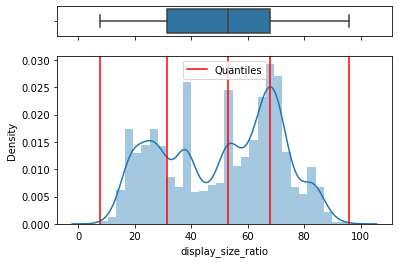

In [127]:
cont_var_distribution(df['display_size_ratio'])

No outliers, some negative skewness and, again, two peaks. **No transformation is applied**. 

***List of variables to be used in the algorithm evaluation step:***

In [128]:
features.extend(['display_size_in_log', 'display_size_ratio'])

Continuing with the next variable in the categorty: `display_resolution`

In [129]:
df['display_resolution'].sample(n=5, random_state=seed)

6517       128 x 128 pixels, 1:1 ratio (~125 ppi density)
5590    1080 x 1920 pixels, 16:9 ratio (~403 ppi density)
5548     720 x 1440 pixels, 18:9 ratio (~295 ppi density)
7219                                     176 x 220 pixels
2814       320 x 240 pixels, 4:3 ratio (~160 ppi density)
Name: display_resolution, dtype: object

**General pattern is observed**. Usually, display resolution is provided in pixels. Also, the density is useful. Let's create variables for those.

In [130]:
df[['display_res_pix_c', 'display_res_pix_r']] = \
df['display_resolution'].str.extract(r"(\d+(?:\.\d+)?) x (\d+(?:\.\d+)?) pixels").astype(float)
df['display_res_ppi'] = df['display_resolution'].str.extract(r"(\d+(?:\.\d+)?) ppi density").astype(float)

Let's search for addional patterns.

In [131]:
condition = (df['display_res_pix_c'].isna()) & (df['display_resolution'].str.contains('line|char')==False)
df[condition]['display_resolution'].value_counts()

-                                                    5
FullHD+                                              2
101x 64 pixels (~85 ppi density)                     2
540 x 960, 16:9 ratio (~220 ppi density)             2
128 x 160pixels (~114 ppi density)                   2
540 x 960, 16:9 ratio (~184 ppi density)             1
480 pixels diameter, 1:1 ratio (~309 ppi density)    1
176 x 220pixels (~141 ppi density)                   1
240 x 320pixels, 4:3 ratio (~200 ppi density)        1
Big                                                  1
540 x 960, 16:9 ratio (~200 ppi density)             1
480 x 1024 (~283 ppi density)                        1
128 x 128pixels, 1:1 ratio (~121 ppi density)        1
Name: display_resolution, dtype: int64

In [132]:
df[df['display_res_ppi'].isna() & df['display_resolution'].str.contains('ppi|density')]['display_resolution']\
.value_counts()

Series([], Name: display_resolution, dtype: int64)

As for the rest no specific patter could be identified, missing values are **imputed with mean values for each display type**.

In [133]:
df[['display_res_pix_c', 'display_res_pix_r', 'display_res_ppi']].isna().sum() / df.shape[0]

display_res_pix_c    0.024521
display_res_pix_r    0.024521
display_res_ppi      0.131298
dtype: float64

In [134]:
df['display_res_pix_c'] = df.groupby('display_type_cat')['display_res_pix_c'].transform(lambda x: x.fillna(x.mean()))
df['display_res_pix_r'] = df.groupby('display_type_cat')['display_res_pix_r'].transform(lambda x: x.fillna(x.mean()))
df['display_res_ppi'] = df.groupby('display_type_cat')['display_res_ppi'].transform(lambda x: x.fillna(x.mean()))

**2.45%**, **2.45%** and **13.13%**, respectively, of the values are **imputed**.

Let's preview the **derived data**.

In [135]:
df[['display_resolution', 'display_res_pix_c', 'display_res_pix_r', 'display_res_ppi']].sample(n=5, random_state=seed)

,display_resolution,display_res_pix_c,display_res_pix_r,display_res_ppi
6517,"128 x 128 pixels, 1:1 ratio (~125 ppi density)",128.0,128.0,125.000000
5590,"1080 x 1920 pixels, 16:9 ratio (~403 ppi density)",1080.0,1920.0,403.000000
5548,"720 x 1440 pixels, 18:9 ratio (~295 ppi density)",720.0,1440.0,295.000000
7219,176 x 220 pixels,176.0,220.0,172.628668
2814,"320 x 240 pixels, 4:3 ratio (~160 ppi density)",320.0,240.0,160.000000


Let's **examin their distribution**.

Outliers: 92 or 0.95%
Skewness: 1.3852


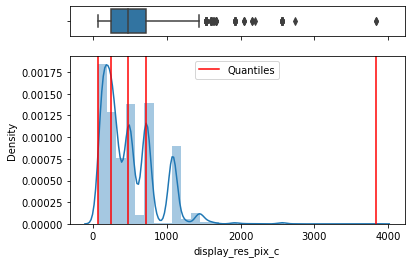

In [136]:
cont_var_distribution(df['display_res_pix_c'])

Not many outliers, although they are far from the mean. In addition, the distribution is positively skewed with several peaks. **No transformation is applied**.

Outliers: 50 or 0.52%
Skewness: 0.9517


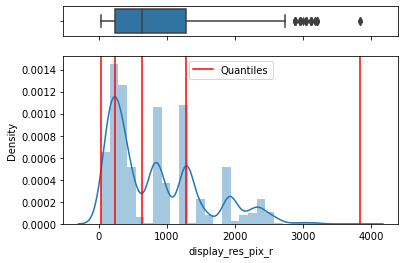

In [137]:
cont_var_distribution(df['display_res_pix_r'])

Not many ouliers, some positive skewness with several peals. **No transfromation is applied**.

Outliers: 169 or 1.75%
Skewness: 1.1004


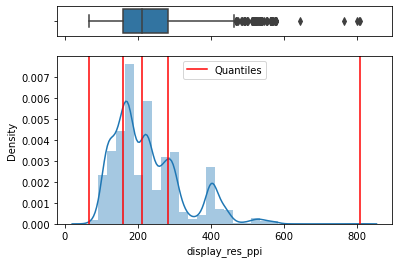

In [138]:
cont_var_distribution(df['display_res_ppi'])

Outliers on the right and positive skewness. **Log transfromation is applied**.

In [139]:
df['display_res_ppi_log'] = np.log(df['display_res_ppi'])

Outliers: 5 or 0.05%
Skewness: 0.2371


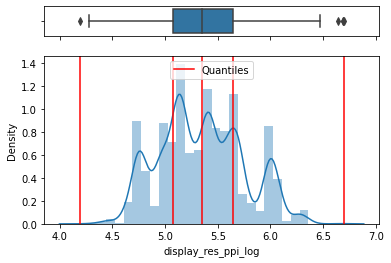

In [140]:
cont_var_distribution(df['display_res_ppi_log'])

***List of variables to be used in the algorithm evaluation step:***

In [141]:
features.extend(['display_res_pix_c', 'display_res_pix_r', 'display_res_ppi_log'])

***Function that creates the variables from the "display" category:***

In [142]:
def create_var_display(dataframe):
    """Creates dataframe[['display_type_LCD', 'display_type_TFT', 'display_type_TFD', 'display_type_STN', \
    'display_type_CSTN', 'display_type_IPS', 'display_type_OLED', 'display_type_AMOLED', 'display_type_resistive', \
    'display_type_capacitive', 'display_type_1bit', 'display_type_2bit', 'display_type_8bit', 'display_type_12bit', \
    'display_type_16bit', 'display_type_18bit', 'display_type_24bit', 'display_size_in_log', 'display_size_ratio', \
    'display_res_pix_c', 'display_res_pix_r', 'display_res_ppi_log']] and returns dataframe"""
    
    # 'display_type_LCD', 'display_type_TFT', 'display_type_TFD', 'display_type_STN', 
    # 'display_type_CSTN', 'display_type_IPS', 'display_type_OLED', 'display_type_AMOLED'
    dataframe['display_type_LCD'] = \
        np.where(dataframe['display_type'].str.contains('LCD') & ~dataframe['display_type'].str.contains('IPS'), 1, 0)
    dataframe['display_type_TFT'] = np.where(dataframe['display_type'].str.contains('TFT'), 1, 0)
    dataframe['display_type_TFD'] = np.where(dataframe['display_type'].str.contains('TFD'), 1, 0)
    dataframe['display_type_STN'] = \
        np.where(dataframe['display_type'].str.contains('STN') & ~dataframe['display_type'].str.contains('CSTN'), 1, 0)
    dataframe['display_type_CSTN'] = np.where(dataframe['display_type'].str.contains('CSTN'), 1, 0)
    dataframe['display_type_IPS'] = np.where(dataframe['display_type'].str.contains('IPS'), 1, 0)
    dataframe['display_type_OLED'] = \
        np.where(dataframe['display_type'].str.contains('OLED') & ~dataframe['display_type'].str.contains('AMOLED'), 1, 0)
    dataframe['display_type_AMOLED'] = np.where(dataframe['display_type'].str.contains('AMOLED'), 1, 0)
    
    # 'display_type_resistive', 'display_type_capacitive'
    dataframe['display_type_resistive'] = np.where(dataframe['display_type'].str.contains('resistive', case=False), 1, 0)
    dataframe['display_type_capacitive'] = np.where(dataframe['display_type'].str.contains('capacitive', case=False), 1, 0)
    
    # 'display_type_1bit', 'display_type_2bit', 'display_type_8bit', 'display_type_12bit', \
    # 'display_type_16bit', 'display_type_18bit', 'display_type_24bit'
    dataframe['display_type_1bit'] = np.where(dataframe['display_type'].str.contains("monochrome", case=False), 1, 0)
    dataframe['display_type_2bit'] = np.where(dataframe['display_type'].str.contains("4 "), 1, 0)
    dataframe['display_type_8bit'] = np.where(dataframe['display_type'].str.contains("256 "), 1, 0)
    dataframe['display_type_12bit'] = np.where(dataframe['display_type'].str.contains("4096"), 1, 0)
    dataframe['display_type_16bit'] = np.where(dataframe['display_type'].str.contains("65K", case=False), 1, 0)
    dataframe['display_type_18bit'] = np.where(dataframe['display_type'].str.contains("256K", case=False), 1, 0)
    dataframe['display_type_24bit'] = np.where(dataframe['display_type'].str.contains("16M", case=False), 1, 0)
        
    # 'display_size_in', 'display_size_ratio'
    dataframe['display_size_in'] = dataframe['display_size'].str.extract(r"(\d+(?:\.\d+)?) inches").astype(float)
    dataframe['display_size_ratio'] = dataframe['display_size'].str.extract(r"(\d+(?:\.\d+)?)% screen\-to\-body ratio").astype(float)
    
    conditions = [
        (dataframe['display_type_LCD'] == 1),
        (dataframe['display_type_TFT'] == 1),
        (dataframe['display_type_TFD'] == 1),
        (dataframe['display_type_STN'] == 1),
        (dataframe['display_type_CSTN'] == 1),
        (dataframe['display_type_IPS'] == 1),
        (dataframe['display_type_OLED'] == 1),
        (dataframe['display_type_AMOLED'] == 1)]
    choices = ['LCD', 'TFT', 'TFD', 'STN', 'CSTN', 'IPS', 'OLED', 'AMOLED']
    dataframe['display_type_cat'] = np.select(conditions, choices, default='OTHER')

    dataframe['display_size_in'] = dataframe.groupby('display_type_cat')['display_size_in'].transform(lambda x: x.fillna(x.mean()))
    dataframe['display_size_ratio'] = dataframe.groupby('display_type_cat')['display_size_ratio'].transform(lambda x: x.fillna(x.mean()))
    
    # display_size_in_log
    dataframe['display_size_in_log'] = np.log(dataframe['display_size_in'])
    
    # 'display_res_pix_c', 'display_res_pix_r', 'display_res_ppi'
    dataframe[['display_res_pix_c', 'display_res_pix_r']] = \
    dataframe['display_resolution'].str.extract(r"(\d+(?:\.\d+)?) x (\d+(?:\.\d+)?) pixels").astype(float)
    dataframe['display_res_ppi'] = dataframe['display_resolution'].str.extract(r"(\d+(?:\.\d+)?) ppi density").astype(float)
    
    dataframe['display_res_pix_c'] = dataframe.groupby('display_type_cat')['display_res_pix_c'].transform(lambda x: x.fillna(x.mean()))
    dataframe['display_res_pix_r'] = dataframe.groupby('display_type_cat')['display_res_pix_r'].transform(lambda x: x.fillna(x.mean()))
    dataframe['display_res_ppi'] = dataframe.groupby('display_type_cat')['display_res_ppi'].transform(lambda x: x.fillna(x.mean()))
    
    # 'display_res_ppi_log'
    dataframe['display_res_ppi_log'] = np.log(dataframe['display_res_ppi'])
    
    return dataframe

 <a id="EDA&FE-Platform"></a>
#### 1.6. EDA & Feature Engineering: Platform
Within the category there are:
* `[37]` `platform_os`;
* `[38]` `platform_chipset`;
* `[39]` `platform_cpu`;
* `[40]` `platform_gpu`.

In [143]:
df[['platform_os', 'platform_chipset', 'platform_cpu', 'platform_gpu']].isna().sum()

platform_os         3701
platform_chipset    4865
platform_cpu        3751
platform_gpu        4964
dtype: int64

To begin with, let's explore `platform_os`.

In [144]:
df['platform_os'].sample(n=5, random_state=seed)

6517                                  NaN
5590    Android 5.0 (Lollipop); Flyme 4.5
5548         Android 8.0 (Oreo); Flyme UI
7219                                  NaN
2814                        BlackBerry OS
Name: platform_os, dtype: object

The most popular (by market share) mobile OS for the period between 2000 and 2020, according to https://www.reddit.com/r/dataisbeautiful/comments/inok8a/oc_most_popular_mobile_operating_systems_2000/, are:
* PalmOS (also known as Garnet OS) is a mobile operating system initially developed by Palm, Inc.;
* Windows Mobile is a family of mobile operating systems developed by Microsoft;
* Symbian is a mobile operating system originally developed by the Symbian Ltd.;
* BlackBerry is a proprietary mobile operating system developed by Canadian company BlackBerry Ltd.;
* iOS (formerly iPhone OS) is a mobile operating system created and developed by Apple Inc. exclusively for its hardware. It is the basis for three other operating systems made by Apple: iPadOS, tvOS, and watchOS. It is proprietary software.
* Android is a mobile operating system based on a modified version of the Linux kernel and other open source software. It is developed by a consortium of developers known as the Open Handset Alliance and commercially sponsored by Google.

Let's extract info on mobile OS. Mobile OS version will not be explored as it is expected to be stronly correlated with the year of announcement.

In [145]:
df['platform_os_PalmOS'] = \
    np.where(df['platform_os'].str.contains("Palm|Garnet", case=False, na=False), 1, 0)
df['platform_os_WinMobile'] = \
    np.where(df['platform_os'].str.contains("Windows|Microsoft", case=False, na=False), 1, 0)
df['platform_os_Symbian'] = \
    np.where(df['platform_os'].str.contains("Symbian", case=False, na=False), 1, 0)
df['platform_os_BlackBerry'] = \
    np.where(df['platform_os'].str.contains("BlackBerry", case=False, na=False), 1, 0)
df['platform_os_iOS'] = \
    np.where(df['platform_os'].str.contains("iOS|iPhone|iPadOS|tvOS|watchOS", case=False, na=False), 1, 0)
df['platform_os_Android'] = \
    np.where(df['platform_os'].str.contains("Android", case=False, na=False), 1, 0)

Let's check number of devices for each mobile OS.

In [146]:
df[['platform_os_PalmOS', 'platform_os_WinMobile', 'platform_os_Symbian', 'platform_os_BlackBerry', \
    'platform_os_iOS', 'platform_os_Android']].apply(pd.Series.value_counts)

,platform_os_PalmOS,platform_os_WinMobile,platform_os_Symbian,platform_os_BlackBerry,platform_os_iOS,platform_os_Android
0,9652,9184,9500,9593,9580,4611
1,13,481,165,72,85,5054


**No information** for 3,795 mobile OS or **39.26%**.

Let's preview the **derived data**.

In [147]:
df[['platform_os', 'platform_os_PalmOS', 'platform_os_WinMobile', 'platform_os_Symbian', 'platform_os_BlackBerry', \
    'platform_os_iOS', 'platform_os_Android']].sample(n=5, random_state=seed)

,platform_os,platform_os_PalmOS,platform_os_WinMobile,platform_os_Symbian,platform_os_BlackBerry,platform_os_iOS,platform_os_Android
6517,NaN,0,0,0,0,0,0
5590,Android 5.0 (Lollipop); Flyme 4.5,0,0,0,0,0,1
5548,Android 8.0 (Oreo); Flyme UI,0,0,0,0,0,1
7219,NaN,0,0,0,0,0,0
2814,BlackBerry OS,0,0,0,1,0,0


***List of variables to be used in the algorithm evaluation step:***

In [148]:
features.extend(['platform_os_PalmOS', 'platform_os_WinMobile', 'platform_os_Symbian', 'platform_os_BlackBerry', \
    'platform_os_iOS', 'platform_os_Android'])

Continuing with the next variable in the categorty: `platform_chipset`.

In [149]:
df['platform_chipset'].sample(n=5, random_state=seed)

6517                        NaN
5590    Mediatek MT6753 (28 nm)
5548             Unisoc SC9832E
7219                        NaN
2814                        NaN
Name: platform_chipset, dtype: object

One one hand the variable is not enough populated (41.39%). But on the other hand, the information could substantially differentiate the devices announced in the recent years. In addition, it is one of the features that differenciates flagmans from budget models. So not only information on the top manufacturers will be extracted, but also external data will be collected on the chipsets' ranking as of August 2020 (https://nanoreview.net/en/soc-list/rating).

First, let's create variables for top manufacturers.

In [150]:
df['platform_chipset_Apple'] = np.where(df['platform_chipset'].str.contains("Apple|Bionic|Fusion", \
                                                                            case=False, na=False), 1, 0)
df['platform_chipset_Qualcomm'] = np.where(df['platform_chipset'].str.contains("Qualcomm|Snapdragon", \
                                                                               case=False, na=False), 1, 0)
df['platform_chipset_Samsung'] = np.where(df['platform_chipset'].str.contains("Samsung|Exynos", \
                                                                               case=False, na=False), 1, 0)
df['platform_chipset_MediaTek'] = np.where(df['platform_chipset'].str.contains("MediaTek|Dimensity|Helio", \
                                                                               case=False, na=False), 1, 0)
df['platform_chipset_HiSilicon'] = np.where(df['platform_chipset'].str.contains("HiSilicon|Kirin", \
                                                                               case=False, na=False), 1, 0)

Let's check how many devices are with chipsets produced by top manufacturers.

In [151]:
df[['platform_chipset_Apple', 'platform_chipset_Qualcomm', 'platform_chipset_Samsung', \
    'platform_chipset_MediaTek', 'platform_chipset_HiSilicon']].apply(pd.Series.value_counts)

,platform_chipset_Apple,platform_chipset_Qualcomm,platform_chipset_Samsung,platform_chipset_MediaTek,platform_chipset_HiSilicon
0,9608,7596,9497,7804,9502
1,57,2069,168,1861,163


**No information** for 5,347 chipset manufacturers or **55.35%**.

For chipset rating, the external data is saved as .csv by copy/ paste the ranking from the website and needs some processing.

In [152]:
chipset = pd.read_csv('data\chipset.csv', sep=';', index_col=0, header=0)

In [153]:
chipset.shape

(114, 7)

In [154]:
chipset.head(10)

,Processor,Rating,AnTuTu 8,Geekbench 5*,Cores,Clock**,Brand
#,,,,,,,
1,A14 Bionic,96,565510,1583 / 4059,6 (2+4),3100 Mhz,Apple
2,Snapdragon 865 Plus,90,646377,971 / 3543,8 (1+3+4),3100 Mhz,Qualcomm
3,Snapdragon 865,88,581099,920 / 3436,8 (1+3+4),2840 Mhz,Qualcomm
4,A13 Bionic,87,473347,1330 / 3475,6 (2+4),2660 Mhz,Apple
5,Exynos 990,81,519427,937 / 2684,8 (2+2+4),2730 Mhz,Samsung
6,Snapdragon 855 Plus,81,470520,777 / 2762,8 (1+3+4),2960 Mhz,Qualcomm
7,Dimensity 1000,78,508089,784 / 3049,8 (4+4),2600 Mhz,MediaTek
8,Kirin 990 (5G),76,492794,755 / 3023,8 (2+2+4),2860 Mhz,HiSilicon
9,Exynos 9825,74,452028,767 / 2401,8 (2+2+4),2730 Mhz,Samsung


Unually the processor name is composed of manufacturer, model, and, in some cases, additional symbols. In order to avoid different spelling/ formatting, it is converted to list.

In [155]:
chipset['processor_elm'] = chipset['Processor'].str.split(' ')

Let's check the names that no not follow the usual convention.

In [156]:
chipset_long = chipset.loc[chipset['processor_elm'].str.len() == chipset['processor_elm'].str.len().max()]
chipset_long.head()

,Processor,Rating,AnTuTu 8,Geekbench 5*,Cores,Clock**,Brand,processor_elm
#,,,,,,,,
2,Snapdragon 865 Plus,90,646377,971 / 3543,8 (1+3+4),3100 Mhz,Qualcomm,"[Snapdragon, 865, Plus]"
6,Snapdragon 855 Plus,81,470520,777 / 2762,8 (1+3+4),2960 Mhz,Qualcomm,"[Snapdragon, 855, Plus]"
8,Kirin 990 (5G),76,492794,755 / 3023,8 (2+2+4),2860 Mhz,HiSilicon,"[Kirin, 990, (5G)]"
12,Dimensity 1000 Plus,71,536333,791 / 3059,8 (4+4),2600 Mhz,MediaTek,"[Dimensity, 1000, Plus]"
13,Kirin 990 (4G),70,426154,740 / 3000,8 (2+2+4),2860 Mhz,HiSilicon,"[Kirin, 990, (4G)]"


In [157]:
chipset_long['processor_elm'].str[2].unique()

array(['Plus', '(5G)', '(4G)'], dtype=object)

'Plus' is replaces with '+', 5G and 4G are deleted.

In [158]:
chipset['Processor'] = chipset['Processor'].str.replace(' Plus', '+')
chipset['Processor'] = chipset['Processor'].str.replace(' \(5G\)', '')
chipset['Processor'] = chipset['Processor'].str.replace(' \(4G\)', '')

And merge all needed processor info.

In [159]:
chipset['processor_info'] = chipset['Processor'].str.cat(chipset['Rating'].astype(str),sep=" ")
chipset['processor_info'] = chipset['processor_info'].str.split(' ')

***Function that process the chipset dataset:***

In [160]:
def chipset_processing(chipset_df):
    """Process the chipset data and returns dataframe"""
    
    chipset_df['Processor'] = chipset_df['Processor'].str.replace(' Plus', '+')
    chipset_df['Processor'] = chipset_df['Processor'].str.replace(' \(5G\)', '')
    chipset_df['Processor'] = chipset_df['Processor'].str.replace(' \(4G\)', '')
    chipset_df['processor_elm'] = chipset_df['Processor'].str.split(' ')
    chipset_df['processor_info'] = chipset_df['Processor'].str.cat(chipset['Rating'].astype(str),sep=" ")
    chipset_df['processor_info'] = chipset_df['processor_info'].str.split(' ')
    col = chipset_df.columns.get_loc('processor_info')

    return chipset_df

And now, let's assign the **rating of the top processors**.

In [161]:
df['platform_chipset_rating'] = 0

col = chipset.columns.get_loc('processor_info')

for row in range(chipset.index.size):
    
    chipset_elm1 = chipset.iloc[row, col][0]
    chipset_elm2 = chipset.iloc[row, col][1]
    chipset_rating = chipset.iloc[row, col][2]
    
    df['platform_chipset_rating'].mask(df['platform_chipset'].str.contains(chipset_elm1, case=False, na=False) & \
                                       df['platform_chipset'].str.contains(chipset_elm2, case=False, na=False), \
                                       other=chipset_rating, inplace=True)
    
df['platform_chipset_rating'] = pd.to_numeric(df['platform_chipset_rating'])

In [162]:
df[['platform_chipset', 'platform_chipset_Apple', 'platform_chipset_Qualcomm', 'platform_chipset_Samsung', \
    'platform_chipset_MediaTek', 'platform_chipset_HiSilicon', 'platform_chipset_rating']]\
.sample(n=5, random_state=seed)

,platform_chipset,platform_chipset_Apple,platform_chipset_Qualcomm,platform_chipset_Samsung,platform_chipset_MediaTek,platform_chipset_HiSilicon,platform_chipset_rating
6517,NaN,0,0,0,0,0,0
5590,Mediatek MT6753 (28 nm),0,0,0,1,0,21
5548,Unisoc SC9832E,0,0,0,0,0,0
7219,NaN,0,0,0,0,0,0
2814,NaN,0,0,0,0,0,0


***List of variables to be used in the algorithm evaluation step:***

In [163]:
features.extend(['platform_chipset_Apple', 'platform_chipset_Qualcomm', 'platform_chipset_Samsung', \
    'platform_chipset_MediaTek', 'platform_chipset_HiSilicon', 'platform_chipset_rating'])

Continuing with the next variable in the categorty: `platform_cpu`.

In [164]:
df['platform_cpu'].sample(n=5, random_state=seed)

6517                                   NaN
5590          Octa-core 1.3 GHz Cortex-A53
5548          Quad-core 1.3 GHz Cortex-A53
7219                                   NaN
2814    32-bit Intel XScale PXA272 312 MHz
Name: platform_cpu, dtype: object

No pattern can be identified. Let's extract at least number of cores using the following information:
* Single core processor = 1 core in the processor
* Dual core processor = 2 cores in the processor
* Quad-core processor = 4 cores in the processor
* Hexa-core processor = 6 cores in the processor
* Octa-core processor = 8 cores in the processor
* Deca core processor = 10 cores in the processor

In [165]:
conditions = [
    (df['platform_cpu'].str.contains("deca", case=False, na=False)),
    (df['platform_cpu'].str.contains("octa", case=False, na=False)),
    (df['platform_cpu'].str.contains("hexa", case=False, na=False)),
    (df['platform_cpu'].str.contains("quad", case=False, na=False)),
    (df['platform_cpu'].str.contains("dual", case=False, na=False))]
choices = [10, 8, 6, 4, 2]
df['platform_cpu_cores'] = np.select(conditions, choices, default=1)

Let's see devices per number if CPU cores

In [166]:
df['platform_cpu_cores'].value_counts()

1     5139
4     2006
8     1568
2      895
6       42
10      15
Name: platform_cpu_cores, dtype: int64

In [167]:
df[['platform_cpu', 'platform_cpu_cores']].sample(n=5, random_state=seed)

,platform_cpu,platform_cpu_cores
6517,NaN,1
5590,Octa-core 1.3 GHz Cortex-A53,8
5548,Quad-core 1.3 GHz Cortex-A53,4
7219,NaN,1
2814,32-bit Intel XScale PXA272 312 MHz,1


***List of variables to be used in the algorithm evaluation step:***

In [168]:
features.append('platform_cpu_cores')

Continuing with the next variable in the categorty: `platform_gpu`.

Mobile SOCs (System-on-a-Chip) have a specific GPU and it is integrated into the chip itself. A GPU is not separate from the SOC. Hence, every phone out there with a Snapdragon 845 will have the same Adreno 630 GPU and every device with Exynos 9810 will have the same Mali-G72 MP18 GPU. However, two different SOCs can have the same GPU as well. For example, both the Snapdragon 625 and 626 have the same Adreno 506 GPU.

As `platform_chipset` has already been analysed, `platfrom_gpu` will be highly, if not 100%, correlated and, therefore, will not be explored further.

***Function that creates the variables from the "platform" category:***

In [169]:
def create_var_platform(dataframe):
    """Creates dataframe[['platform_os_PalmOS', 'platform_os_WinMobile', 'platform_os_Symbian', \
    'platform_os_BlackBerry', 'platform_os_iOS', 'platform_os_Android', 'platform_chipset_Apple', \
    'platform_chipset_Qualcomm', 'platform_chipset_Samsung', 'platform_chipset_MediaTek', \
    'platform_chipset_HiSilicon', 'platform_chipset_rating', 'platform_cpu_cores',]] and returns dataframe.
    
    Prerequisites:
    - processed smartphone processors ranking dataset"""
    
    # 'platform_os_PalmOS', 'platform_os_WinMobile', 'platform_os_Symbian', \
    # 'platform_os_BlackBerry', 'platform_os_iOS', 'platform_os_Android'
    dataframe['platform_os_PalmOS'] = \
        np.where(dataframe['platform_os'].str.contains("Palm|Garnet", case=False, na=False), 1, 0)
    dataframe['platform_os_WinMobile'] = \
        np.where(dataframe['platform_os'].str.contains("Windows|Microsoft", case=False, na=False), 1, 0)
    dataframe['platform_os_Symbian'] = \
        np.where(dataframe['platform_os'].str.contains("Symbian", case=False, na=False), 1, 0)
    dataframe['platform_os_BlackBerry'] = \
        np.where(dataframe['platform_os'].str.contains("BlackBerry", case=False, na=False), 1, 0)
    dataframe['platform_os_iOS'] = \
        np.where(dataframe['platform_os'].str.contains("iOS|iPhone|iPadOS|tvOS|watchOS", case=False, na=False), 1, 0)
    dataframe['platform_os_Android'] = \
        np.where(dataframe['platform_os'].str.contains("Android", case=False, na=False), 1, 0)
    
    # 'platform_os_Android', 'platform_chipset_Apple', 'platform_chipset_Qualcomm', 'platform_chipset_Samsung', \
    # 'platform_chipset_MediaTek', 'platform_chipset_HiSilicon'
    dataframe['platform_chipset_Apple'] = \
        np.where(dataframe['platform_chipset'].str.contains("Apple|Bionic|Fusion", case=False, na=False), 1, 0)
    dataframe['platform_chipset_Qualcomm'] = \
        np.where(dataframe['platform_chipset'].str.contains("Qualcomm|Snapdragon", case=False, na=False), 1, 0)
    dataframe['platform_chipset_Samsung'] = \
        np.where(dataframe['platform_chipset'].str.contains("Samsung|Exynos", case=False, na=False), 1, 0)
    dataframe['platform_chipset_MediaTek'] = \
        np.where(dataframe['platform_chipset'].str.contains("MediaTek|Dimensity|Helio", case=False, na=False), 1, 0)
    dataframe['platform_chipset_HiSilicon'] = \
        np.where(dataframe['platform_chipset'].str.contains("HiSilicon|Kirin", case=False, na=False), 1, 0)
    
    # 'platform_chipset_rating'
    dataframe['platform_chipset_rating'] = 0

    for row in range(chipset.index.size):

        chipset_elm1 = chipset.iloc[row, 8][0]
        chipset_elm2 = chipset.iloc[row, 8][1]
        chipset_rating = chipset.iloc[row, 8][2]

        dataframe['platform_chipset_rating'].\
            mask(dataframe['platform_chipset'].str.contains(chipset_elm1, case=False, na=False) & \
                 dataframe['platform_chipset'].str.contains(chipset_elm2, case=False, na=False), \
                 other=chipset_rating, inplace=True)

    dataframe['platform_chipset_rating'] = pd.to_numeric(dataframe['platform_chipset_rating'])
    
    # 'platform_cpu_cores'
    conditions = [
        (dataframe['platform_cpu'].str.contains("deca", case=False, na=False)),
        (dataframe['platform_cpu'].str.contains("octa", case=False, na=False)),
        (dataframe['platform_cpu'].str.contains("hexa", case=False, na=False)),
        (dataframe['platform_cpu'].str.contains("quad", case=False, na=False)),
        (dataframe['platform_cpu'].str.contains("dual", case=False, na=False))]
    choices = [10, 8, 6, 4, 2]
    dataframe['platform_cpu_cores'] = np.select(conditions, choices, default=1)
    
    return dataframe

<a id="EDA&FE-Memory"></a>
#### 1.7. EDA & Feature Engineering: Memory
Within the category there are:
* `[15]` `memory_card_slot`;
* `[16]` `memory_phonebook`;
* `[17]` `memory_call_records`;
* `[41]` `memory_internal`;
* `[50]` `memory`.

In [170]:
df[['memory_card_slot', 'memory_phonebook', 'memory_call_records', 'memory_internal', 'memory']].isna().sum()

memory_card_slot          0
memory_phonebook       6027
memory_call_records    6098
memory_internal        1698
memory                 8740
dtype: int64

**Memory card slot** and **memory internal** will be explored. The rest are scarcely populated - less than 40%.

To begin with, let's explore `memory_card_slot`.

In [171]:
df['memory_card_slot'].sample(n=5, random_state=seed)

6517                                              No
5590    microSD, up to 256 GB (uses shared SIM slot)
5548                           microSD, up to 128 GB
7219                        microSD (dedicated slot)
2814                        microSD (dedicated slot)
Name: memory_card_slot, dtype: object

No specific pattern is observed. What is important here whether the slot is avaiable or not. It allows not only additional storage, but also easier data transfer. Thus, binary variable is created.

In [172]:
df['memory_card_slot_available'] = np.where(df['memory_card_slot'] == 'No', 0, 1)

In [173]:
df[['memory_card_slot', 'memory_card_slot_available']].sample(n=5, random_state=seed)

,memory_card_slot,memory_card_slot_available
6517,No,0
5590,"microSD, up to 256 GB (uses shared SIM slot)",1
5548,"microSD, up to 128 GB",1
7219,microSD (dedicated slot),1
2814,microSD (dedicated slot),1


Check how many devices have memory card slot.

In [174]:
df['memory_card_slot_available'].value_counts()

1    7423
0    2242
Name: memory_card_slot_available, dtype: int64

***List of variables to be used in the algorithm evaluation step:***

In [175]:
features.append('memory_card_slot_available')

Continuing with the next variable in the categorty: `memory_internal`.

In [176]:
df['memory_internal'].sample(n=5, random_state=seed)

6517          8 MB, 384 kB
5590    16/32 GB, 2 GB RAM
5548       16 GB, 2 GB RAM
7219                 22 MB
2814      64 MB, 16 MB RAM
Name: memory_internal, dtype: object

Let's extract RAM size. Note that it could be in MB or GB. For consistency, all will be converted to MB.

In [177]:
df['memory_internal_RAM'] = df['memory_internal'].str.extract(r"(\d+)\s?MB RAM").astype('float')

df['temp'] = df['memory_internal'].str.extract(r"(\d+)\s?GB RAM").astype('float') * 1000
df.loc[df['memory_internal_RAM'].isna(), 'memory_internal_RAM'] = df['temp']

df = df.drop(columns='temp')

Let's check the descriptive statistics of the variable.

In [178]:
df['memory_internal_RAM'].describe()

count      5677.000000
mean       1963.024485
std        3893.758191
min           1.000000
25%         512.000000
50%        1000.000000
75%        3000.000000
max      256000.000000
Name: memory_internal_RAM, dtype: float64

It seems that max values above is unrealistically high - 256000, that is 256 GB RAM.

In [179]:
df.loc[df['memory_internal_RAM'] == 2.560e+05][['memory_internal', 'memory_internal_RAM']]

,memory_internal,memory_internal_RAM
2283,"512 MB, 256 GB RAM",256000.0


Apparently, it's a typo and it should be 256 MB RAM. Let's correct it.

In [180]:
df.loc[df['memory_internal_RAM'] == 2.560e+05, 'memory_internal_RAM'] = 256

The missing values need to be imputed.

In [181]:
df['memory_internal_RAM'].replace(0, np.NaN, inplace=True)
df['memory_internal_RAM'].isna().sum() / df.shape[0]

0.41262286601138126

Now the question is how to impute missing values.<br>
Another factor that is related to mobile performace is the cpu. We already have all observation populated for `platform_cpu_cores`.

More RAM:

* better task-switching
* can run more complicated apps or open larger/more complex files

More CPU:

* faster turnaround between input and response (less lag) on CPU-bound apps
* better background processing

Still, let's see if there is correlation.

In [182]:
df.loc[df['memory_internal_RAM'].notna(), 'memory_internal_RAM'].corr(df['platform_cpu_cores'])

0.7446362756393371

0.7446 is considered "strong" correlation. Therefore, the missing values for `memory_internal_RAM` will be populated with the min per `platfrom_cpu_cores`.

In [183]:
df['memory_internal_RAM'] = df.groupby('platform_cpu_cores')['memory_internal_RAM']\
.transform(lambda x: x.fillna(x.min()))

**41.26%** of the values are **imputed**. The share of imputed values is significant.

***List of variables to be used in the algorithm evaluation step:***

In [184]:
features.append('memory_internal_RAM')

***Function that creates the variables from the "memory" category:***

In [185]:
def create_var_memory(dataframe):
    """Creates dataframe[['memory_card_slot_available', 'memory_internal_RAM']] and returns dataframe"""
    
    # 'memory_card_slot_available'
    dataframe['memory_card_slot_available'] = np.where(dataframe['memory_card_slot'] == 'No', 0, 1)
    
    # 'memory_internal_RAM'
    dataframe['memory_internal_RAM'] = dataframe['memory_internal'].str.extract(r"(\d+)\s?MB RAM").astype('float')
    dataframe['temp'] = dataframe['memory_internal'].str.extract(r"(\d+)\s?GB RAM").astype('float') * 1000
    dataframe.loc[dataframe['memory_internal_RAM'].isna(), 'memory_internal_RAM'] = dataframe['temp']
    dataframe = dataframe.drop(columns='temp')
    dataframe.loc[dataframe['memory_internal_RAM'] == 2.560e+05, 'memory_internal_RAM'] = 256
    
    dataframe['memory_internal_RAM'] = dataframe.groupby('platform_cpu_cores')['memory_internal_RAM']\
        .transform(lambda x: x.fillna(x.min()))
    
    return dataframe

<a id="EDA&FE-MainCamera"></a>
#### 1.8. EDA & Feature Engineering: Main Camera
Within the category there are:
* `[42]` `main_camera_single`;
* `[43]` `main_camera_video`;
* `[45]` `main_camera_features`;
* `[51]` `main_camera_dual`;
* `[67]` `main_camera_quad`;
* `[68]` `main_camera_triple`;
* `[71]` `main_camera_five`;
* `[76]` `main_camera_dual_or_triple`;
* `[79]` `main_camera_v1`;
* `[81]` `camera`;
* `[82]` `main_camera`.

For this category, it is hard to explore the variables one by one. Instead, the following information will be extracted simultaneously.
* Number of main cameras
* Pixels
* Important features
* Video support
* Frames per second (fps)

In [186]:
df[['main_camera_single', 'main_camera_video', 'main_camera_features', 'main_camera_dual', 'main_camera_quad', \
    'main_camera_triple', 'main_camera_five', 'main_camera_dual_or_triple', 'main_camera_v1', 'camera', \
    'main_camera']].isna().sum()

main_camera_single            1954
main_camera_video             1202
main_camera_features          4318
main_camera_dual              9217
main_camera_quad              9522
main_camera_triple            9461
main_camera_five              9660
main_camera_dual_or_triple    9663
main_camera_v1                9662
camera                        8517
main_camera                   9664
dtype: int64

In [187]:
df[['main_camera_single', 'main_camera_video', 'main_camera_features', 'main_camera_dual', 'main_camera_quad', \
    'main_camera_triple', 'main_camera_five', 'main_camera_dual_or_triple', 'main_camera_v1', 'camera', \
    'main_camera']].sample(n=5, random_state=seed)

,main_camera_single,main_camera_video,main_camera_features,main_camera_dual,main_camera_quad,main_camera_triple,main_camera_five,main_camera_dual_or_triple,main_camera_v1,camera,main_camera
6517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
5590,"13 MP, f/2.2, 1/3"", AF","1080p, 1080p@30fps","Dual-LED dual-tone flash, HDR, panorama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5548,"13 MP, f/2.2, 1/3.1"", 1.12µm, AF",1080p@30fps,"LED flash, panorama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7219,1.3 MP,Yes,LED flash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN


Check what `main_camera_v1`, the variable populated in the old version of the database, contains.

In [188]:
df['main_camera_v1'].unique()

array([nan, 'No', '0.3 MP'], dtype=object)

Missing and *No* are treated equally - no main camera.

In [189]:
df['main_camera_v1'].replace('No', np.NaN, inplace=True)

Check what `camera`, the field with additional details, contains.

In [190]:
df['camera'].unique()

array([nan, 'No', 'VGA'], dtype=object)

Missing and *No* are treated equally - no main camera.

In [191]:
df['camera'].replace('No', np.NaN, inplace=True)

Check what `main_camera` contains.

In [192]:
df['main_camera'].unique()

array([nan, 'No'], dtype=object)

Missing and *No* are treated equally - no main camera.

In [193]:
df['main_camera'].replace('No', np.NaN, inplace=True)

Now, let's create a variable that indicates the number of cameras.

In [194]:
conditions = [
    (df['main_camera_single'].notna()),
    (df['main_camera_v1'].notna()),
    (df['camera'].notna()),
    (df['main_camera'].notna()),
    (df['main_camera_dual'].notna()),
    (df['main_camera_dual_or_triple'].notna()),
    (df['main_camera_triple'].notna()),
    (df['main_camera_quad'].notna()),
    (df['main_camera_five'].notna())]
choices = [1, 1, 1, 1, 2, 2, 3, 4, 5]
df['main_camera_num'] = np.select(conditions, choices, default=0)

In [195]:
df[['main_camera_single', 'main_camera_dual', 'main_camera_quad', 'main_camera_triple', 'main_camera_five',\
    'main_camera_dual_or_triple', 'main_camera_v1', 'camera', 'main_camera', 'main_camera_num']]\
.sample(n=5, random_state=seed)

,main_camera_single,main_camera_dual,main_camera_quad,main_camera_triple,main_camera_five,main_camera_dual_or_triple,main_camera_v1,camera,main_camera,main_camera_num
6517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5590,"13 MP, f/2.2, 1/3"", AF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5548,"13 MP, f/2.2, 1/3.1"", 1.12µm, AF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7219,1.3 MP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Let's see how many main cameras the devices have.

In [196]:
df['main_camera_num'].value_counts()

1    7713
0    1150
2     450
3     204
4     143
5       5
Name: main_camera_num, dtype: int64

To get the information on pixels, let's merge the information irrespectve of number of cameras...

In [197]:
df['main_camera_all'] = df['main_camera_single'].fillna('') + df['main_camera_dual'].fillna('') + \
    df['main_camera_quad'].fillna('') + df['main_camera_triple'].fillna('') + df['main_camera_five'].fillna('') + \
    df['main_camera_dual_or_triple'].fillna('') + df['main_camera_v1'].fillna('') + df['camera'].fillna('') + \
    df['main_camera'].fillna('')

... and create the variable indicating pixels.

In [198]:
df['main_camera_px'] = df['main_camera_all'].str.extract(r"(\d+(?:[\.\,]\d+)?)\s?MP").astype(float)

If camera is "VGA", it corresponds to 0.3 MP
https://www.quora.com/Whats-the-resolution-and-quality-of-a-VGA-camera

In [199]:
df.loc[df['main_camera_all'].str.contains('VGA', case=False, na=False), 'temp'] = 0.3
df.loc[df['main_camera_px'].isna(), 'main_camera_px'] = df['temp']

df = df.drop(columns=['temp'])

Devices with no main camera are with 0MP.

In [200]:
df.loc[df['main_camera_num'] == 0, 'main_camera_px'] = 0

The rest are imputed with the min value of 0.3 MP

In [201]:
df['main_camera_px'].isna().sum() / df.shape[0]

0.014071391619244698

In [202]:
df.loc[df['main_camera_px'].isna(), 'main_camera_px'] = 0.3

**1.41%** of the values are **imputed**.

Let's preview the **derived data**.

In [203]:
df[['main_camera_all', 'main_camera_px']].sample(n=5, random_state=seed)

,main_camera_all,main_camera_px
6517,,0.0
5590,"13 MP, f/2.2, 1/3"", AF",13.0
5548,"13 MP, f/2.2, 1/3.1"", 1.12µm, AF",13.0
7219,1.3 MP,1.3
2814,,0.0


Let's check the descriptive statistics of the variable.

In [204]:
df['main_camera_px'].describe()

count    9665.000000
mean        6.506734
std         9.254492
min         0.000000
25%         1.300000
50%         4.000000
75%         8.000000
max       108.000000
Name: main_camera_px, dtype: float64

Try to identify the top 10 smartphone camera features that make you feel like a professional photographer based on the keyword below.
https://www.businessinsider.com/smartphone-camera-features-that-make-you-feel-like-a-professional-photographer-2018-2
* Dual-lens cameras - already identified with `main_camera_num`
* Wide aperture
* High dynamic range (HDR)
* Optical image stabilization (OIS)
* High-resolution video - will be examined later
* Autofocus
* Auto-detection flash
* Filters
* Portrait mode
* Burst mode

In [205]:
df['main_camera_wide'] = np.where(df['main_camera_all'].str.contains('wide', case=False, na=False) | \
                                  df['main_camera_features'].str.contains('wide', case=False, na=False), 1, 0)
df['main_camera_HDR'] = np.where(df['main_camera_all'].str.contains('HDR', case=False, na=False) | \
                                  df['main_camera_features'].str.contains('HDR', case=False, na=False), 1, 0)
df['main_camera_OIS'] = np.where(df['main_camera_all'].str.contains('OIS', case=False, na=False) | \
                                  df['main_camera_features'].str.contains('OIS', case=False, na=False), 1, 0)
df['main_camera_autofocus'] = np.where(df['main_camera_all'].str.contains('autofocus', case=False, na=False) | \
                                  df['main_camera_features'].str.contains('autofocus', case=False, na=False), 1, 0)
df['main_camera_autoflash'] = np.where((df['main_camera_all'].str.contains('auto-detect', case=False, na=False) & \
                                       df['main_camera_all'].str.contains('flash', case=False, na=False)) | \
                                  (df['main_camera_features'].str.contains('auto-detect', case=False, na=False) & \
                                       df['main_camera_features'].str.contains('flash', case=False, na=False)), 1, 0)
df['main_camera_filters'] = np.where(df['main_camera_all'].str.contains('filters', case=False, na=False) | \
                                  df['main_camera_features'].str.contains('filters', case=False, na=False), 1, 0)
df['main_camera_portrait'] = np.where(df['main_camera_all'].str.contains('portrait', case=False, na=False) | \
                                  df['main_camera_features'].str.contains('portrait', case=False, na=False), 1, 0)
df['main_camera_burst'] = np.where(df['main_camera_all'].str.contains('burst', case=False, na=False) | \
                                  df['main_camera_features'].str.contains('burst', case=False, na=False), 1, 0)

Let's preview the **derived data**.

In [206]:
df[['main_camera_all', 'main_camera_features', 'main_camera_wide', 'main_camera_HDR', 'main_camera_OIS', 'main_camera_autofocus', 'main_camera_autoflash', \
    'main_camera_filters', 'main_camera_portrait', 'main_camera_burst']].sample(n=5, random_state=seed)

,main_camera_all,main_camera_features,main_camera_wide,main_camera_HDR,main_camera_OIS,main_camera_autofocus,main_camera_autoflash,main_camera_filters,main_camera_portrait,main_camera_burst
6517,,NaN,0,0,0,0,0,0,0,0
5590,"13 MP, f/2.2, 1/3"", AF","Dual-LED dual-tone flash, HDR, panorama",0,1,0,0,0,0,0,0
5548,"13 MP, f/2.2, 1/3.1"", 1.12µm, AF","LED flash, panorama",0,0,0,0,0,0,0,0
7219,1.3 MP,LED flash,0,0,0,0,0,0,0,0
2814,,NaN,0,0,0,0,0,0,0,0


Check how many devices have each of the above features,.

In [207]:
df[['main_camera_wide', 'main_camera_HDR', 'main_camera_OIS', 'main_camera_autofocus', 'main_camera_autoflash', \
    'main_camera_filters', 'main_camera_portrait', 'main_camera_burst']].apply(pd.Series.value_counts)

,main_camera_wide,main_camera_HDR,main_camera_OIS,main_camera_autofocus,main_camera_autoflash,main_camera_filters,main_camera_portrait,main_camera_burst
0,8956,7243,9340,9665.0,9665.0,9665.0,9662,9665.0
1,709,2422,325,NaN,NaN,NaN,3,NaN


Very limited information collected. Still, the first three are kept.

In [208]:
df = df.drop(columns=['main_camera_autofocus', 'main_camera_autoflash', 'main_camera_filters', \
                      'main_camera_portrait', 'main_camera_burst'])

Some information for video capture:

In [209]:
df['main_camera_video'].sample(n=5, random_state=seed)

6517                   NaN
5590    1080p, 1080p@30fps
5548           1080p@30fps
7219                   Yes
2814                   NaN
Name: main_camera_video, dtype: object

Missing and *No* are treated equally - no video supported

In [210]:
df['main_camera_video'].replace('No', np.NaN, inplace=True)

Let's create binary variable indicating if the device can capture video.

In [211]:
df['main_camera_video_available'] = np.where(df['main_camera_video'].notna(), 1, 0)

In [212]:
df[['main_camera_video', 'main_camera_video_available']].sample(n=5, random_state=seed)

,main_camera_video,main_camera_video_available
6517,NaN,0
5590,"1080p, 1080p@30fps",1
5548,1080p@30fps,1
7219,Yes,1
2814,NaN,0


Check how many devices support video.

In [213]:
df['main_camera_video_available'].value_counts()

1    7961
0    1704
Name: main_camera_video_available, dtype: int64

And let's try to extract with how many FPS the video is captured. 

In [214]:
df['main_camera_video_fps'] = df['main_camera_video'].str.extract(r"(\d+(?:[\.\,]\d+)?)\s?fps").astype('float')

In [215]:
df[df['main_camera_video_available'] == 1][['main_camera_video', 'main_camera_video_fps']]\
.sample(n=5, random_state=seed)

,main_camera_video,main_camera_video_fps
3849,720p@30fps,30.0
3268,Yes,NaN
2749,1080p@30fps,30.0
8449,Yes,NaN
4849,Yes,NaN


0 FPS for devices that cannot capture video.

In [216]:
df.loc[df['main_camera_video_available'] == 0, 'main_camera_video_fps'] = 0

The rest need to be imputed.

In [217]:
df['main_camera_video_fps'].isna().sum() / df.shape[0]

0.3612002069322297

In order to impute the missing values, let's check for correlation with `main_camera_px`.

In [218]:
df.loc[df['main_camera_video_fps'].notna(), 'main_camera_video_fps'].corr(df['main_camera_px'])

0.40678189095485273

The correlation is weak. In this case the missing values will be populated with the most frequent value, ignoring the best cameras.

In [219]:
df.loc[df['main_camera_video_available'] == 1, 'main_camera_video_fps'].sort_values().value_counts()

30.0     3745
15.0      359
60.0      152
24.0       94
25.0       37
10.0       25
20.0       13
12.0        9
120.0       4
18.0        4
14.0        4
13.0        4
960.0       3
8.0         3
7.0         3
28.0        2
19.0        2
9.0         1
100.0       1
22.0        1
12.5        1
17.0        1
21.0        1
6.0         1
Name: main_camera_video_fps, dtype: int64

In [220]:
df.loc[df['main_camera_video_available'] == 1 & df['main_camera_video_fps'].isna(), 'main_camera_video_fps'] = 15

**36.12%** of the values are **imputed**. The share is significant.

Let's see the descriptve statistics.

In [221]:
df['main_camera_video_fps'].describe()

count    9665.000000
mean       21.980911
std        18.820622
min         6.000000
25%        15.000000
50%        15.000000
75%        30.000000
max       960.000000
Name: main_camera_video_fps, dtype: float64

The most recently announced devices can shoot at up to 960 FPS.

Going back to the most important features (high-resolution video):

In [222]:
df['main_camera_hrv'] = np.where(df['main_camera_video'].str.contains(('4K|8K'), case=False, na=False), 1, 0)

Check how many devices support high-resolution video

In [223]:
df['main_camera_hrv'].value_counts()

0    9415
1     250
Name: main_camera_hrv, dtype: int64

***List of variables to be used in the algorithm evaluation step:***

In [224]:
features.extend(['main_camera_num', 'main_camera_px', 'main_camera_wide', 'main_camera_HDR', 'main_camera_OIS', \
                       'main_camera_video_available', 'main_camera_video_fps', 'main_camera_hrv'])                   

***Function that creates the variables from the "main camera" category:***

In [225]:
def create_var_main_camera(dataframe):
    """Creates dataframe[['main_camera_num', 'main_camera_px', 'main_camera_wide', 'main_camera_HDR', \
    'main_camera_OIS', 'main_camera_video_available', 'main_camera_video_fps', 'main_camera_hrv']] \
    and returns dataframe"""
    
    # 'main_camera_num'
    dataframe['main_camera_v1'].replace('No', np.NaN, inplace=True)
    dataframe['camera'].replace('No', np.NaN, inplace=True)
    dataframe['main_camera'].replace('No', np.NaN, inplace=True)
    
    conditions = [
        (dataframe['main_camera_single'].notna()),
        (dataframe['main_camera_v1'].notna()),
        (dataframe['camera'].notna()),
        (dataframe['main_camera'].notna()),
        (dataframe['main_camera_dual'].notna()),
        (dataframe['main_camera_dual_or_triple'].notna()),
        (dataframe['main_camera_triple'].notna()),
        (dataframe['main_camera_quad'].notna()),
        (dataframe['main_camera_five'].notna())]
    choices = [1, 1, 1, 1, 2, 2, 3, 4, 5]
    dataframe['main_camera_num'] = np.select(conditions, choices, default=0)
    
    # 'main_camera_px'
    dataframe['main_camera_all'] = dataframe['main_camera_single'].fillna('') + \
        dataframe['main_camera_dual'].fillna('') + dataframe['main_camera_quad'].fillna('') + \
        dataframe['main_camera_triple'].fillna('') + dataframe['main_camera_five'].fillna('') + \
        dataframe['main_camera_dual_or_triple'].fillna('') + dataframe['main_camera_v1'].fillna('') + \
        dataframe['camera'].fillna('') + dataframe['main_camera'].fillna('')
    
    dataframe['main_camera_px'] = dataframe['main_camera_all'].str.extract(r"(\d+(?:[\.\,]\d+)?)\s?MP").astype(float)
    
    dataframe.loc[dataframe['main_camera_all'].str.contains('VGA', case=False, na=False), 'temp'] = 0.3
    dataframe.loc[dataframe['main_camera_px'].isna(), 'main_camera_px'] = dataframe['temp']
    dataframe = dataframe.drop(columns=['temp'])
    
    dataframe.loc[dataframe['main_camera_num'] == 0, 'main_camera_px'] = 0
    
    dataframe.loc[dataframe['main_camera_px'].isna(), 'main_camera_px'] = 0.3
    
    # 'main_camera_wide', 'main_camera_HDR', 'main_camera_OIS'
    dataframe['main_camera_wide'] = np.where(dataframe['main_camera_all'].str.contains('wide', case=False, na=False) |\
                                  dataframe['main_camera_features'].str.contains('wide', case=False, na=False), 1, 0)
    dataframe['main_camera_HDR'] = np.where(dataframe['main_camera_all'].str.contains('HDR', case=False, na=False) | \
                                  dataframe['main_camera_features'].str.contains('HDR', case=False, na=False), 1, 0)
    dataframe['main_camera_OIS'] = np.where(dataframe['main_camera_all'].str.contains('OIS', case=False, na=False) | \
                                  dataframe['main_camera_features'].str.contains('OIS', case=False, na=False), 1, 0)
    
    # 'main_camera_video_available'
    dataframe['main_camera_video'].replace('No', np.NaN, inplace=True)
    dataframe['main_camera_video_available'] = np.where(dataframe['main_camera_video'].notna(), 1, 0)
    
    # 'main_camera_video_fps'
    dataframe['main_camera_video_fps'] = \
        dataframe['main_camera_video'].str.extract(r"(\d+(?:[\.\,]\d+)?)\s?fps").astype('float')
    
    dataframe.loc[dataframe['main_camera_video_available'] == 0, 'main_camera_video_fps'] = 0
    dataframe.loc[dataframe['main_camera_video_available'] == 1 & \
                  dataframe['main_camera_video_fps'].isna(), 'main_camera_video_fps'] = 15
    
    # 'main_camera_hrv'
    dataframe['main_camera_hrv'] = \
        np.where(dataframe['main_camera_video'].str.contains(('4K|8K'), case=False, na=False), 1, 0)
    
    return dataframe

<a id="EDA&FE-SelfieCamera"></a>
#### 1.9. EDA & Feature Engineering: Selfie Camera
Within the category there are:
* `[52]` `selfie_camera_dual`;
* `[53]` `selfie_camera_features`;
* `[54]` `selfie_camera_video`;
* `[64]` `selfie_camera_single`;
* `[78]` `selfie_camera_triple`;
* `[80]` `selfie_camera`.

Similar steps as for Main Camera are taken with the exception of camera features and video support as these are not the main purpose of the selfie camera.

In [226]:
df['selfie_camera'].unique()

array([nan, 'V2', 'No', 'Videocall camera', 'No - uses main camera',
       'Uses main camera', 'V1', 'HD', 'Videocalling over Wi-Fi only',
       'Yes', 'CIF videocall camera', 'VGA', 'Spy camera', 'CIF', '0',
       'Videocall, via SW update'], dtype=object)

In [227]:
df['selfie_camera'].replace(['V2','No','No - uses main camera','Uses main camera','V1','0'], np.NaN, inplace=True)

In [228]:
df[df['selfie_camera_single'].str.contains('main', case=False, na=False)]['selfie_camera_single'].unique()

array(['Rotating main camera module'], dtype=object)

In [229]:
df['selfie_camera_single'].replace(['V1','V2','No','Rotating main camera module','0'], np.NaN, inplace=True)

In [230]:
df[df['selfie_camera_dual'].str.contains('main', case=False, na=False)]['selfie_camera_dual'].unique()

array(['Uses main cameras', 'Motorized flip-up main camera module'],
      dtype=object)

In [231]:
df['selfie_camera_dual'].replace(['V1','V2','No','Uses main cameras', 'Motorized flip-up main camera module', '0'], \
                                   np.NaN, inplace=True)

In [232]:
df[df['selfie_camera_triple'].str.contains('main', case=False, na=False)]['selfie_camera_triple'].unique()

array(['Uses main cameras'], dtype=object)

In [233]:
df['selfie_camera_triple'].replace(['V1','V2','No','Uses main cameras', '0'], np.NaN, inplace=True)

Create variable indicating the number of selfie cameras

In [234]:
conditions = [
    (df['selfie_camera'].notna()),
    (df['selfie_camera_single'].notna()),
    (df['selfie_camera_dual'].notna()),
    (df['selfie_camera_triple'].notna())]
choices = [1, 1, 2, 3]
df['selfie_camera_num'] = np.select(conditions, choices, default=0)

In [235]:
df[['selfie_camera', 'selfie_camera_single', 'selfie_camera_dual', 'selfie_camera_triple', 'selfie_camera_num']]\
.sample(n=5, random_state=seed)

,selfie_camera,selfie_camera_single,selfie_camera_dual,selfie_camera_triple,selfie_camera_num
6517,NaN,NaN,NaN,NaN,0
5590,NaN,"5 MP, f/2.0, 1/5"", 1.12µm",NaN,NaN,1
5548,NaN,"8 MP, f/2.2, 1/4"", 1.12µm",NaN,NaN,1
7219,NaN,NaN,NaN,NaN,0
2814,NaN,NaN,NaN,NaN,0


Let's see how many sefie cameras the devices have.

In [236]:
df['selfie_camera_num'].value_counts()

1    5173
0    4383
2     108
3       1
Name: selfie_camera_num, dtype: int64

Pixels:

In [237]:
df['selfie_camera_all'] = df['selfie_camera'].fillna('') + df['selfie_camera_single'].fillna('') + \
df['selfie_camera_dual'].fillna('') + df['selfie_camera_triple'].fillna('')

In [238]:
df['selfie_camera_px'] = df['selfie_camera_all'].str.extract(r"(\d+(?:[\.\,]\d+)?)\s?MP").astype(float)

In [239]:
df.loc[df['selfie_camera_all'].str.contains('VGA', case=False, na=False), 'temp'] = 0.3
df.loc[df['selfie_camera_px'].isna(), 'selfie_camera_px'] = df['temp']
df = df.drop(columns=['temp'])

In [240]:
df.loc[df['selfie_camera_num'] == 0, 'selfie_camera_px'] = 0

In [241]:
df['selfie_camera_px'].isna().sum() / df.shape[0]

0.04418003103983446

In [242]:
df.loc[df['selfie_camera_px'].isna(), 'selfie_camera_px'] = 0.3

**4.42%** of the values are **imputed**.

Let's preview the **derived data**.

In [243]:
df[['selfie_camera_all', 'selfie_camera_px']].sample(n=5, random_state=seed)

,selfie_camera_all,selfie_camera_px
6517,,0.0
5590,"5 MP, f/2.0, 1/5"", 1.12µm",5.0
5548,"8 MP, f/2.2, 1/4"", 1.12µm",8.0
7219,,0.0
2814,,0.0


Let's see the descriptive statistics.

In [244]:
df['selfie_camera_px'].describe()

count    9665.000000
mean        2.707807
std         5.274475
min         0.000000
25%         0.000000
50%         0.300000
75%         5.000000
max        44.000000
Name: selfie_camera_px, dtype: float64

***List of variables to be used in the algorithm evaluation step:***

In [245]:
features.extend(['selfie_camera_num', 'selfie_camera_px'])

***Function that creates the variables from the "selfie camera" category:***

In [246]:
def create_var_selfie_camera(dataframe):
    """Creates dataframe[['selfie_camera_num', 'selfie_camera_px',]] and returns dataframe"""
    
    # 'selfie_camera_num'
    dataframe['selfie_camera'].replace(['V2','No','No - uses main camera','Uses main camera','V1','0'], 
                                       np.NaN, 
                                       inplace=True)
    dataframe['selfie_camera_single'].replace(['V1','V2','No','Rotating main camera module','0'], 
                                              np.NaN, 
                                              inplace=True)
    dataframe['selfie_camera_dual'].replace(['V1','V2','No','Uses main cameras', 
                                             'Motorized flip-up main camera module', '0'], 
                                            np.NaN, 
                                            inplace=True)
    dataframe['selfie_camera_triple'].replace(['V1','V2','No','Uses main cameras', '0'], np.NaN, inplace=True)
    
    conditions = [
        (dataframe['selfie_camera'].notna()),
        (dataframe['selfie_camera_single'].notna()),
        (dataframe['selfie_camera_dual'].notna()),
        (dataframe['selfie_camera_triple'].notna())]
    choices = [1, 1, 2, 3]
    dataframe['selfie_camera_num'] = np.select(conditions, choices, default=0)
    
    # 'selfie_camera_px'
    dataframe['selfie_camera_all'] = dataframe['selfie_camera'].fillna('') + \
        dataframe['selfie_camera_single'].fillna('') + dataframe['selfie_camera_dual'].fillna('') + \
        dataframe['selfie_camera_triple'].fillna('')
    
    dataframe['selfie_camera_px'] = \
        dataframe['selfie_camera_all'].str.extract(r"(\d+(?:[\.\,]\d+)?)\s?MP").astype(float)
    
    dataframe.loc[dataframe['selfie_camera_all'].str.contains('VGA', case=False, na=False), 'temp'] = 0.3
    dataframe.loc[dataframe['selfie_camera_px'].isna(), 'selfie_camera_px'] = dataframe['temp']
    dataframe = dataframe.drop(columns=['temp'])
    
    dataframe.loc[dataframe['selfie_camera_num'] == 0, 'selfie_camera_px'] = 0
    dataframe.loc[dataframe['selfie_camera_px'].isna(), 'selfie_camera_px'] = 0.3
    
    return dataframe

<a id="EDA&FE-Sound"></a>
#### 1.10. EDA & Feature Engineering: Sound
Within the category there are:
* `[18]` `sound_loudspeaker`;
* `[19]` `sound_alert_types`;
* `[20]` `sound_3.5mm_jack`;
* `[69]` `sound`.

In [247]:
df[['sound_loudspeaker', 'sound_alert_types', 'sound_3.5mm_jack', 'sound']].isna().sum()

sound_loudspeaker       0
sound_alert_types    7255
sound_3.5mm_jack       68
sound                7232
dtype: int64

**Sound loudspeaker** and **sound 3.5mm jack** will explored. The rest are scarcely populated - less than 25%.

To begin with, let's explore `sound_loudspeaker`.

In [248]:
df['sound_loudspeaker'].sample(n=5, random_state=seed)

6517    Yes
5590    Yes
5548    Yes
7219     No
2814    Yes
Name: sound_loudspeaker, dtype: object

In [249]:
df['sound_loudspeaker'].unique()

array(['Yes', 'No', 'Yes, with stereo speakers',
       'Yes, with stereo speakers (4 speakers)',
       'Yes, with stereo speakers (16 mm, 22 Khz with vibration)',
       'Yes, with dual speakers',
       'Yes, with Dolby Atmos stereo speakers (2 dedicated amplifiers)',
       'Yes, with DTS:X stereo speakers (2 dedicated amplifiers)',
       'Yes, dual speakers',
       'Yes, 2.1 Stereo Surround Sound (2 tweeters + 1 bass loudspeaker)',
       'Yes, built-in amplifier', 'Yes, dual mono speakers',
       'Yes, with front stereo speakers', 'Yes, with multiple speakers',
       'Yes, with stereo speakers (1.5 Watt)',
       'Yes, with stereo speakers (3G models only)',
       'Yes, with stereo speakers (22 Khz with vibration)',
       'Yes, with Dolby Atmos stereo speakers (THX-certified amplifiers)',
       'Yes, with four speakers',
       'Yes, with stereo speakers (Bang&Olufsen)',
       'Yes, with Dolby Atmos stereo speakers'], dtype=object)

Let's check if there are enough instances of stereo.

In [250]:
df.loc[df['sound_loudspeaker'].str.contains('stereo', case=False, na=False), 'sound_loudspeaker'].shape

(776,)

With only 776 instances, if "stereo" is present in description of the `sound_loudspeaker` or not is not idicative of the actual device specifications. Therefore, the feature will be transofmed to binary variable.

In [251]:
df['sound_loudspeaker_available'] = np.where(df['sound_loudspeaker'] == 'No', 0, 1)

In [252]:
df[['sound_loudspeaker', 'sound_loudspeaker_available']].sample(n=5, random_state=seed)

,sound_loudspeaker,sound_loudspeaker_available
6517,Yes,1
5590,Yes,1
5548,Yes,1
7219,No,0
2814,Yes,1


Check how many devices have loudspeaker.

In [253]:
df['sound_loudspeaker_available'].value_counts()

1    8416
0    1249
Name: sound_loudspeaker_available, dtype: int64

***List of variables to be used in the algorithm evaluation step:***

In [254]:
features.append('sound_loudspeaker_available')

Continuing with the next variable in the categorty: `sound_3.5mm_jack`.

In [255]:
df['sound_3.5mm_jack'].sample(n=5, random_state=seed)

6517    Yes
5590    Yes
5548    Yes
7219     No
2814     No
Name: sound_3.5mm_jack, dtype: object

In [256]:
df['sound_3.5mm_jack'].unique()

array(['Yes', 'No', nan, 'No, included adaptor for 3.5mm', 'TBD',
       'To be confirmed', 'TBC', 'nO'], dtype=object)

No details. Only binary variable is created.

In [257]:
df['sound_3.5mm_jack_available'] = np.where(df['sound_loudspeaker'] == 'Yes', 1, 0)

In [258]:
df[['sound_3.5mm_jack', 'sound_3.5mm_jack_available']].sample(n=5, random_state=seed)

,sound_3.5mm_jack,sound_3.5mm_jack_available
6517,Yes,1
5590,Yes,1
5548,Yes,1
7219,No,0
2814,No,1


Check how many devices have 3.5mm jack available.

In [259]:
df['sound_3.5mm_jack_available'].value_counts()

1    7581
0    2084
Name: sound_3.5mm_jack_available, dtype: int64

***List of variables to be used in the algorithm evaluation step:***

In [260]:
features.append('sound_3.5mm_jack_available')

***Function that creates the variables from the "sound" category:***

In [261]:
def create_var_sound(dataframe):
    """Creates dataframe[['sound_loudspeaker_available', 'sound_3.5mm_jack_available']] and returns dataframe"""
    
    # 'sound_loudspeaker_available'
    dataframe['sound_loudspeaker_available'] = np.where(dataframe['sound_loudspeaker'] == 'No', 0, 1)
    
    # 'sound_3.5mm_jack_available'
    dataframe['sound_3.5mm_jack_available'] = np.where(dataframe['sound_loudspeaker'] == 'Yes', 1, 0)
    
    return dataframe

<a id="EDA&FE-Communications"></a>
#### 1.10. EDA & Feature Engineering: Communications
Within the category there are:

* `[21]` `comms_wlan`
* `[22]` `comms_bluetooth`
* `[23]` `comms_gps`
* `[24]` `comms_radio`
* `[25]` `comms_usb`
* `[55]` `comms_nfc`
* `[65]` `comms_infrared_port`

In [262]:
df[['comms_wlan', 'comms_bluetooth', 'comms_gps', 'comms_radio', 'comms_usb', 'comms_nfc', 'comms_infrared_port']]\
.isna().sum()

comms_wlan                0
comms_bluetooth           8
comms_gps                13
comms_radio             103
comms_usb               875
comms_nfc              8453
comms_infrared_port    8630
dtype: int64

Let's create binary varibles indicating if the communication channel is available or not.

To begin with, let's explore `comms_wlan`.

In [263]:
df['comms_wlan'].sample(n=5, random_state=seed)

6517                                                   No
5590    Wi-Fi 802.11 a/b/g/n, dual-band, Wi-Fi Direct,...
5548                          Wi-Fi 802.11 b/g/n, hotspot
7219                                                   No
2814                                                   No
Name: comms_wlan, dtype: object

Check if *Wi-Fi* is sufficient indicator.

In [264]:
df.loc[~df['comms_wlan'].str.contains('Wi-Fi'), 'comms_wlan'].unique()

array(['No', 'Optional', 'V1', 'Yes'], dtype=object)

And create the variable.

In [265]:
df['comms_wlan_available'] = np.where(df['comms_wlan'].str.contains('No|Optional|V1'), 0, 1)

In [266]:
df[['comms_wlan', 'comms_wlan_available']].sample(n=5, random_state=seed)

,comms_wlan,comms_wlan_available
6517,No,0
5590,"Wi-Fi 802.11 a/b/g/n, dual-band, Wi-Fi Direct,...",1
5548,"Wi-Fi 802.11 b/g/n, hotspot",1
7219,No,0
2814,No,0


Check how many devices have Wi-Fi.

In [267]:
df['comms_wlan_available'].value_counts()

1    5874
0    3791
Name: comms_wlan_available, dtype: int64

Continuing with the other variable in the categorty: `comms_bluetooth`.

In [268]:
df['comms_bluetooth'].sample(n=5, random_state=seed)

6517               No
5590    4.0, A2DP, LE
5548    4.1, A2DP, LE
7219                2
2814                2
Name: comms_bluetooth, dtype: object

Missing and *No* are treated equally - no bluetooth available

In [269]:
df['comms_bluetooth'].fillna('No', inplace=True)

Check for other idicators, apart from bluetooth version.

In [270]:
df.loc[~df['comms_bluetooth'].str.contains('\d+'), 'comms_bluetooth'].unique()

array(['Yes', 'No', 'Optional', 'TBC', 'Market dependent',
       'Yes, headset support only'], dtype=object)

And create the variable.

In [271]:
df['comms_bluetooth_available'] = np.where(df['comms_bluetooth'].str.contains('No|Optional|TBC'), 0, 1)

In [272]:
df[['comms_bluetooth', 'comms_bluetooth_available']].sample(n=5, random_state=seed)

,comms_bluetooth,comms_bluetooth_available
6517,No,0
5590,"4.0, A2DP, LE",1
5548,"4.1, A2DP, LE",1
7219,2,1
2814,2,1


Check how many devices have bluetooth.

In [273]:
df['comms_bluetooth_available'].value_counts()

1    8095
0    1570
Name: comms_bluetooth_available, dtype: int64

Continuing with the other variable in the categorty: `comms_gps`.

In [274]:
df['comms_gps'].sample(n=5, random_state=seed)

6517                          No
5590    Yes, with A-GPS, GLONASS
5548    Yes, with A-GPS, GLONASS
7219                          No
2814                         Yes
Name: comms_gps, dtype: object

Missing and *No* are treated equally - no GPS available

In [275]:
df['comms_gps'].fillna('No', inplace=True)

Check for other indicators.

In [276]:
df.loc[~df['comms_gps'].str.contains('Yes|No|GPS'), 'comms_gps'].unique()

array(['To be confirmed', 'TBD', 'Np', 'E911 call only'], dtype=object)

And create the variable.

In [277]:
df['comms_gps_available'] = np.where(df['comms_gps'].str.contains('No|TBD|Np'), 0, 1)

In [278]:
df[['comms_gps', 'comms_gps_available']].sample(n=5, random_state=seed)

,comms_gps,comms_gps_available
6517,No,0
5590,"Yes, with A-GPS, GLONASS",1
5548,"Yes, with A-GPS, GLONASS",1
7219,No,0
2814,Yes,1


Check how many devices have GPS

In [279]:
df['comms_gps_available'].value_counts()

1    5663
0    4002
Name: comms_gps_available, dtype: int64

Continuing with the other variable in the categorty: `comms_radio`.

In [280]:
df['comms_radio'].sample(n=5, random_state=seed)

6517    FM radio
5590          No
5548          No
7219          No
2814          No
Name: comms_radio, dtype: object

Missing and *No* are treated equally - no FM radio available

In [281]:
df['comms_radio'].fillna('No', inplace=True)

Check for other indicators.

In [282]:
df.loc[~df['comms_radio'].str.contains('Yes|No|FM'), 'comms_radio'].unique()

array(['Unspecified', 'To be confirmed', 'T-DMB radio',
       'Factory locked by default, can be enabled', 'Streaming Radio',
       '-', 'XM radio', 'Nо', 'MobiRadio', 'TBC'], dtype=object)

And create the variable.

In [283]:
df['comms_radio_available'] = np.where(df['comms_radio'].str.contains('No|Unspecified|To be confirmed|-|TBC'), 0, 1)

In [284]:
df[['comms_radio', 'comms_radio_available']].sample(n=5, random_state=seed)

,comms_radio,comms_radio_available
6517,FM radio,1
5590,No,0
5548,No,0
7219,No,0
2814,No,0


Check how many devices have FM radio.

In [285]:
df['comms_radio_available'].value_counts()

1    5819
0    3846
Name: comms_radio_available, dtype: int64

Continuing with the other variable in the categorty: `comms_usb`.

In [286]:
df['comms_usb'].sample(n=5, random_state=seed)

6517    Proprietary (charging only)
5590         microUSB 2.0, USB Host
5548                   microUSB 2.0
7219                    Proprietary
2814                        miniUSB
Name: comms_usb, dtype: object

Missing and *No* are treated equally - no USB port available.

In [287]:
df['comms_usb'].fillna('No', inplace=True)

Check for other indicators

In [288]:
df.loc[~df['comms_usb'].str.contains('Yes|No|USB|\d+'), 'comms_usb'].unique()

array(['Proprietary', 'TBC', 'Pop-Port', 'Proprietary (charging only)',
       'Proprietary,', 'Proprietary (optional)',
       'Proprietary (charging, mass storage)', 'charging only'],
      dtype=object)

And create the variable.

In [289]:
df['comms_usb_available'] = np.where(df['comms_usb'].str.contains('No|TBC|charging only'), 0, 1)

In [290]:
df[['comms_usb', 'comms_usb_available']].sample(n=5, random_state=seed)

,comms_usb,comms_usb_available
6517,Proprietary (charging only),0
5590,"microUSB 2.0, USB Host",1
5548,microUSB 2.0,1
7219,Proprietary,1
2814,miniUSB,1


Check how many devices have USB port.

In [291]:
df['comms_usb_available'].value_counts()

1    8350
0    1315
Name: comms_usb_available, dtype: int64

Continuing with the other variable in the categorty: `comms_nfc`.

In [292]:
df['comms_nfc'].sample(n=5, random_state=seed)

6517    NaN
5590    NaN
5548    NaN
7219    NaN
2814    NaN
Name: comms_nfc, dtype: object

Missing and *No* are treated equally - no NFC port available.

In [293]:
df['comms_nfc'].fillna('No', inplace=True)

Check for other indicators.

In [294]:
df.loc[~df['comms_nfc'].str.contains('Yes|No'), 'comms_nfc'].unique()

array(['Unspecified', 'Carrier dependent', 'Region specific', 'TBC',
       'Optional', 'To be confirmed', 'O2 UK only', 'Via software update',
       'TBD'], dtype=object)

And create the variable.

In [295]:
df['comms_nfc_available'] = np.where(df['comms_nfc'].str.contains('No|Unspecified|TBC|To be confirmed|TBD'), 0, 1)

In [296]:
df[['comms_nfc', 'comms_nfc_available']].sample(n=5, random_state=seed)

,comms_nfc,comms_nfc_available
6517,No,0
5590,No,0
5548,No,0
7219,No,0
2814,No,0


Check how many devices have NFC available.

In [297]:
df['comms_nfc_available'].value_counts()

0    8465
1    1200
Name: comms_nfc_available, dtype: int64

Continuing with the other variable in the categorty: `comms_infrared_port`.

In [298]:
df['comms_infrared_port'].sample(n=5, random_state=seed)

6517    NaN
5590    NaN
5548    NaN
7219    NaN
2814    NaN
Name: comms_infrared_port, dtype: object

Missing and *No* are treated equally - no IR port available.

In [299]:
df['comms_infrared_port'].fillna('No', inplace=True)

Check for other indicators.

In [300]:
df.loc[~df['comms_infrared_port'].str.contains('Yes|No'), 'comms_infrared_port'].unique()

array([], dtype=object)

And create the variable.

In [301]:
df['comms_infrared_port_available'] = np.where(df['comms_infrared_port'].str.contains('No'), 0, 1)

In [302]:
df[['comms_infrared_port', 'comms_infrared_port_available']].sample(n=5, random_state=seed)

,comms_infrared_port,comms_infrared_port_available
6517,No,0
5590,No,0
5548,No,0
7219,No,0
2814,No,0


Check how many devices have IR port available

In [303]:
df['comms_infrared_port_available'].value_counts()

0    8630
1    1035
Name: comms_infrared_port_available, dtype: int64

***List of variables to be used in the algorithm evaluation step:***

In [304]:
features.extend(['comms_wlan_available', 'comms_bluetooth_available', 'comms_gps_available', \
                 'comms_radio_available', 'comms_usb_available', 'comms_nfc_available', \
                'comms_infrared_port_available'])

***Function that creates the variables from the "communications" category:***

In [305]:
def create_var_comms(dataframe):
    """Creates dataframe[['comms_wlan_available', 'comms_bluetooth_available', 'comms_gps_available', \
    'comms_radio_available', 'comms_usb_available', 'comms_nfc_available', 'comms_infrared_port_available']] \
    and returns dataframe"""
    
    # 'comms_wlan_available'
    dataframe['comms_wlan_available'] = np.where(dataframe['comms_wlan'].str.contains('No|Optional|V1'), 0, 1)
    
    # 'comms_bluetooth_available'
    dataframe['comms_bluetooth'].fillna('No', inplace=True)
    dataframe['comms_bluetooth_available'] = \
        np.where(dataframe['comms_bluetooth'].str.contains('No|Optional|TBC'), 0, 1)
    
    # 'comms_gps_available'
    dataframe['comms_gps'].fillna('No', inplace=True)
    dataframe['comms_gps_available'] = np.where(dataframe['comms_gps'].str.contains('No|TBD|Np'), 0, 1)
    
    # 'comms_radio_available'
    dataframe['comms_radio'].fillna('No', inplace=True)
    dataframe['comms_radio_available'] = \
        np.where(dataframe['comms_radio'].str.contains('No|Unspecified|To be confirmed|-|TBC'), 0, 1)
    
    # 'comms_usb_available'
    dataframe['comms_usb'].fillna('No', inplace=True)
    dataframe['comms_usb_available'] = np.where(dataframe['comms_usb'].str.contains('No|TBC|charging only'), 0, 1)
    
    # 'comms_nfc_available'
    dataframe['comms_nfc'].fillna('No', inplace=True)
    dataframe['comms_nfc_available'] = \
        np.where(dataframe['comms_nfc'].str.contains('No|Unspecified|TBC|To be confirmed|TBD'), 0, 1)
    
    # 'comms_infrared_port_available'
    dataframe['comms_infrared_port'].fillna('No', inplace=True)
    dataframe['comms_infrared_port_available'] = np.where(dataframe['comms_infrared_port'].str.contains('No'), 0, 1)
    
    return dataframe

<a id="EDA&FE-Features"></a>
#### 1.12. EDA & Feature Engineering: Features
Within the category there are:
* `[26]` `features_sensors`;
* `[27]` `features_messaging`;
* `[28]` `features_browser`;
* `[29]` `features_clock`;
* `[30]` `features_alarm`;
* `[31]` `features_games`;
* `[32]` `features_java`;
* `[33]` `features`;
* `[72]` `features_languages`;

In [306]:
df[['features_sensors', 'features_messaging', 'features_browser', 'features_clock', 'features_alarm',\
    'features_games', 'features_java', 'features', 'features_languages']].isna().sum()

features_sensors         0
features_messaging    5965
features_browser      6072
features_clock        9197
features_alarm        9197
features_games        6027
features_java         6019
features              4251
features_languages    9388
dtype: int64

Only **fearures sensors** will be explored. The rest are scarcely populated.

In [307]:
df['features_sensors'].sample(n=5, random_state=seed)

6517                                         V1
5590    Accelerometer, gyro, proximity, compass
5548          Accelerometer, proximity, compass
7219                                         V1
2814                                         V1
Name: features_sensors, dtype: object

Let's try to count the number of different sensors considering they are separated with "," and create a variable indicating the number of sensors.

In [308]:
df.loc[df['features_sensors'] == 'No|V1', 'features_sensors_num'] = 0
df.loc[df['features_sensors_num'].isna(), 'features_sensors_num'] = df['features_sensors'].str.count(',') + 1

In [309]:
df[['features_sensors', 'features_sensors_num']].sample(n=5, random_state=seed)

,features_sensors,features_sensors_num
6517,V1,1
5590,"Accelerometer, gyro, proximity, compass",4
5548,"Accelerometer, proximity, compass",3
7219,V1,1
2814,V1,1


Check how many sensors the devices have.

In [310]:
df['features_sensors_num'].value_counts()

1     4917
3     1436
2     1400
4      860
5      690
6      241
7       59
8       49
9       10
10       3
Name: features_sensors_num, dtype: int64

***List of variables to be used in the algorithm evaluation step:***

In [311]:
features.append('features_sensors_num')

***Function that creates the variables from the "features" category:***

In [312]:
def create_var_features(dataframe):
    """Creates dataframe[['features_sensors_num']] and returns dataframe"""
    
    # 'features_sensors_num'
    dataframe.loc[dataframe['features_sensors'] == 'No|V1', 'features_sensors_num'] = 0
    dataframe.loc[dataframe['features_sensors_num'].isna(), 'features_sensors_num'] = \
        dataframe['features_sensors'].str.count(',') + 1
    
    return dataframe

<a id="EDA&FE-Battery"></a>
#### 1.13. EDA & Feature Engineering: Battery
Within the category there are:
* `[56]` `battery_charging`;
* `[75]` `battery`;
* `[77]` `battery_music_play`;
* `[84]` `battery_talk_time`;
* `[85]` `battery_stand.by`.

In [313]:
df[['battery_charging', 'battery', 'battery_music_play', 'battery_talk_time', 'battery_stand.by']].isna().sum()

battery_charging      8575
battery                115
battery_music_play    8926
battery_talk_time     2851
battery_stand.by      3091
dtype: int64

Only **battery** will be explored. The rest are scarcely populated.

Some important feature of the baterry include:
* mAh (Milliamp Hours) or the unit that measures (electric) power over time
* removable/ non-removable battery
* fast and/or wireless charging

In [314]:
df['battery'].sample(n=5, random_state=seed)

6517    Removable Li-Ion 800 mAh battery (BL-5CB)
5590               Non-removable 3100 mAh battery
5548            Removable Li-Ion 3000 mAh battery
7219                                          NaN
2814                     Removable Li-Ion battery
Name: battery, dtype: object

Let's extract the battery power and create variable indicating mAh.

In [315]:
df['battery_mAh'] = df['battery'].str.extract(r"(\d+)\s?mAh").astype('float')

The rest will be **imputed with min value**.

In [316]:
df['battery_mAh'].replace(0, np.NaN, inplace=True)
df['battery_mAh'].isna().sum() / df.shape[0]

0.09622348680807036

In [317]:
df['battery_mAh'].fillna(df['battery_mAh'].min(), inplace=True)

**9.62%** of the values are **imputed**.

Let's check its distribution.

Outliers: 155 or 1.60%
Skewness: 1.4667


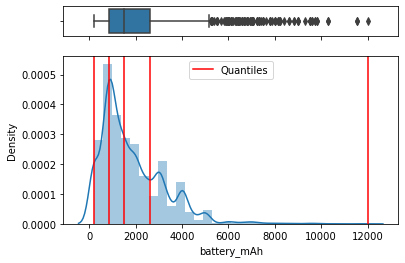

In [318]:
cont_var_distribution(df['battery_mAh'])

Outliers and positive skewness. **Log transformation is applied**.

In [319]:
df['battery_mAh_log'] = np.log(df['battery_mAh'])

Outliers: 0 or 0.00%
Skewness: -0.6511


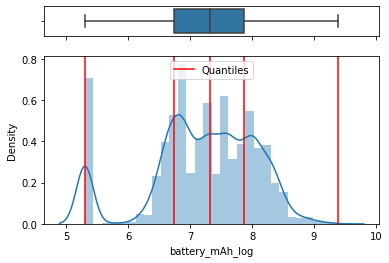

In [320]:
cont_var_distribution(df['battery_mAh_log'])

A variable indicating if the battery is removable or not is created.

In [321]:
df['battery_removable'] = np.where(df['battery'].str.contains('non-removable', case=False, na=False), 0, 1)

In [322]:
df[['battery', 'battery_removable']].sample(n=5, random_state=seed)

,battery,battery_removable
6517,Removable Li-Ion 800 mAh battery (BL-5CB),1
5590,Non-removable 3100 mAh battery,0
5548,Removable Li-Ion 3000 mAh battery,1
7219,NaN,1
2814,Removable Li-Ion battery,1


Check how many devices are with removable battery.

In [323]:
df['battery_removable'].value_counts()

1    6995
0    2670
Name: battery_removable, dtype: int64

***List of variables to be used in the algorithm evaluation step:***

In [324]:
features.extend(['battery_mAh_log', 'battery_removable'])

***Function that creates the variables from the "battery" category:***

In [325]:
def create_var_battery(dataframe):
    """Creates dataframe[['battery_mAh_log', 'battery_removable']] and returns dataframe"""
    
    # 'battery_mAh'
    dataframe['battery_mAh'] = dataframe['battery'].str.extract(r"(\d+)\s?mAh").astype('float')
    dataframe['battery_mAh'].replace(0, np.NaN, inplace=True)
    dataframe['battery_mAh'].fillna(dataframe['battery_mAh'].min(), inplace=True)
    
    # 'battery_mAh_log'
    dataframe['battery_mAh_log'] = np.log(dataframe['battery_mAh'])
    
    # 'battery_removable'
    dataframe['battery_removable'] = np.where(dataframe['battery'].str.contains('non-removable', case=False, na=False), 0, 1)
    
    return dataframe

<a id="EDA&FE-Misc"></a>
#### 1.14. EDA & Feature Engineering: Miscellaneous
Within the category there are:
* `[34]` `misc_colors`;
* `[44]` `misc_price`;
* `[57]` `misc_models`;
* `[70]` `misc_sar_eu`;
* `[74]` `misc_sar`.

In [326]:
df[['misc_colors', 'misc_price', 'misc_models', 'misc_sar_eu', 'misc_sar']].isna().sum()

misc_colors       0
misc_price     3695
misc_models    8090
misc_sar_eu    7197
misc_sar       7561
dtype: int64

Device color is not considered to be related to device availability.
Device price is also irrelevant since in each point in time there are budget devices and flagmans.
The rest of the varibles are scarcely populated and no assumtions for the missing values could be made.

<a id="EDA&FE-Tests"></a>
#### 1.15. EDA & Feature Engineering: Tests
Within the category there are:
* `[58]` `tests_performance`;
* `[59]` `tests_camera`;
* `[60]` `tests_loudspeaker`;
* `[61]` `tests_audio_quality`;
* `[62]` `tests_battery_life`;
* `[63]` `tests_display`.

In [327]:
df[['tests_performance', 'tests_camera', 'tests_loudspeaker', 'tests_audio_quality', 'tests_battery_life', \
    'tests_display']].isna().sum()

tests_performance      9136
tests_camera           8849
tests_loudspeaker      8707
tests_audio_quality    8820
tests_battery_life     8994
tests_display          8994
dtype: int64

All variables are scarcely populated and no assumptions for the missing valued could be made.

<a id="EDA&FE-PageViews"></a>
#### 1.16. EDA & Feature Engineering: Page Views
Within the category there is `[86]` `page_views_avg`.

In [328]:
df['page_views_avg'].isna().sum()

0

In [329]:
df['page_views_avg'].describe()

count    9665.000000
mean      271.971857
std       130.611933
min        50.000000
25%       159.000000
50%       270.000000
75%       385.000000
max       500.000000
Name: page_views_avg, dtype: float64

No further data processing is required. Still, let's check it distribution.

Outliers: 0 or 0.00%
Skewness: 0.0324


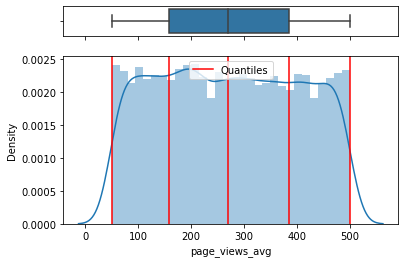

In [330]:
cont_var_distribution(df['page_views_avg'])

No transformations are applied.

However, again, this variable is not a device characteristic. Thus it is ignored following the business logic.

<a id="EDA&FE-Summary"></a>
#### 1.17. EDA & Feature Engineering: Summary

In [331]:
len(features)

88

Apart from the target variable there are 88 features:
* 68 categorical variables, of which:
    * 57 binary variables
    *  4 ordinal variables
    *  7 variables, created via Binary Encoding
* 20 numeric variables, of which:
    * 10 continuous variables, of which:
        * 3 nominal values
        * 7 log transformed
    * 10 discrete variables

All **feature engineering** steps above have been defined as custom functions that can now be implemented as **pipeline**.

*Note: A marginal difference in the mean value of variables with information on body dimensions and weight is discovered as during EDA some of the observations have been dropped after variable creation.*

In [332]:
chipset = pd.read_csv('data\chipset.csv', sep=';', index_col=0, header=0)

In [333]:
chipset = chipset_processing(chipset)

In [334]:
phone_specs = pd.read_csv('data/mobileCompare.csv', header=0, low_memory=False)

In [335]:
list_top20 = np.array(['samsung', 'apple', 'google', 'huawei', 'oneplus', 'xiaomi', 'oppo', 'vivo', 'sony', 'asus',\
                       'nokia', 'lg', 'lenovo', 'zte', 'htc', 'panasonic', 'motorola', 'alcatel', 'honor', 'tecno'])

In [336]:
features = ['oem_1', 'oem_2', 'oem_3', 'oem_4', 'oem_5', 'oem_6', 'oem_7', 'oem_top20', \
            'network_GSM', 'network_HSPA', 'network_LTE', 'network_CDMA', 'network_EVDO', 'network_UMTS', \
            'network_5G', 'network_CDMA2000', 'body_dims_height_log', 'body_dims_width_log', \
            'body_dims_thickness_log', 'body_dims_height_bin', 'body_dims_width_bin', 'body_dims_thickness_bin', \
            'body_weight_g_log', 'body_weight_g_bin', 'body_sim_mini', 'body_sim_micro', 'body_sim_nano', \
            'body_sim_eSIM', 'body_sim_num', 'display_type_LCD', 'display_type_TFT', 'display_type_TFD', \
            'display_type_STN', 'display_type_CSTN', 'display_type_IPS', 'display_type_OLED', 'display_type_AMOLED', \
            'display_type_resistive', 'display_type_capacitive', 'display_type_1bit', 'display_type_2bit', \
            'display_type_8bit', 'display_type_12bit', 'display_type_16bit', 'display_type_18bit', \
            'display_type_24bit', 'display_size_in_log', 'display_size_ratio', 'display_res_pix_c', \
            'display_res_pix_r', 'display_res_ppi_log', 'platform_os_PalmOS', 'platform_os_WinMobile', \
            'platform_os_Symbian', 'platform_os_BlackBerry', 'platform_os_iOS', 'platform_os_Android', \
            'platform_chipset_Apple', 'platform_chipset_Qualcomm', 'platform_chipset_Samsung', \
            'platform_chipset_MediaTek', 'platform_chipset_HiSilicon', 'platform_chipset_rating', \
            'platform_cpu_cores', 'memory_card_slot_available', 'memory_internal_RAM', 'main_camera_num', \
            'main_camera_px', 'main_camera_wide', 'main_camera_HDR', 'main_camera_OIS', \
            'main_camera_video_available', 'main_camera_video_fps', 'main_camera_hrv', 'selfie_camera_num', \
            'selfie_camera_px', 'sound_loudspeaker_available', 'sound_3.5mm_jack_available', 'comms_wlan_available', \
            'comms_bluetooth_available', 'comms_gps_available', 'comms_radio_available', 'comms_usb_available', \
            'comms_nfc_available', 'comms_infrared_port_available', 'features_sensors_num', 'battery_mAh_log', \
            'battery_removable']

In [337]:
def drop_observations(dataframe):
    dataframe = dataframe.drop_duplicates(subset=['oem', 'model'], keep='last')
    dataframe = dataframe[~dataframe['launch_status'].str.lower().str.contains('coming soon')]
    dataframe = dataframe[~dataframe['launch_announced'].str.contains(r'Not (?:officially )?announced yet')]
    dataframe = dataframe[~dataframe['network_technology'].str.contains("No cellular connectivity")]
    dataframe = dataframe[dataframe['body_sim'] != 'No']
    
    return dataframe

In [338]:
phone_specs = (phone_specs.pipe(drop_observations)
                          .pipe(create_var_label)
                          .pipe(create_var_launch)
                          .pipe(create_var_oem)
                          .pipe(crate_var_network)
                          .pipe(create_var_body_dimensions)
                          .pipe(create_var_display)
                          .pipe(create_var_platform)
                          .pipe(create_var_memory)
                          .pipe(create_var_main_camera)
                          .pipe(create_var_selfie_camera)
                          .pipe(create_var_sound)
                          .pipe(create_var_comms)
                          .pipe(create_var_features)
                          .pipe(create_var_battery)
     )   

As the dataset is processes, the explanatory features and the target are separated into different datasets.

In [339]:
phone_features = phone_specs[features]
phone_label = phone_specs['label']

In [340]:
phone_features.shape, phone_label.shape

((9665, 88), (9665,))

As a final step of the feature engineering, the **explatanory variables are scaled to a standard range**. To normalize the input variables, the *MinMaxScaler* is applied. This will transform the features by scaling each feature to the range between 0 and 1.

In [341]:
scaler = MinMaxScaler()

In [342]:
phone_features = pd.DataFrame(data = scaler.fit_transform(phone_features),
                              index=phone_features.index,
                              columns=phone_features.columns)

For the next phase, feature selection, the dataset will be **split into train and test**. A ratio of **80:20** is chosen as it will leave approx. 8,000 observation for training and 2000 for testing. In addition, the data it stratified by the labels in order to preseve its distribution between the two sets.

In [343]:
phone_features_train, phone_features_test, phone_label_train, phone_label_test = \
    train_test_split(phone_features, phone_label, test_size=0.20, stratify=phone_label, random_state=seed)

In [344]:
phone_features_train.shape, phone_features_test.shape, phone_label_train.shape, phone_label_test.shape

((7732, 88), (1933, 88), (7732,), (1933,))

<a id="FeatureSelection"></a>
### 2. Feature Selection

**"As the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially."**<br>
&emsp; Charles Isbell, Professor and Senior Associate Dean, School of Interactive Computing, Georgia Tech

Having 88 features for 7732 observations with approx. 60/40 balance in the train sample (or even less if we consider cross-validation), we may fail to generalize as the number of training examples for each dimension (i.e. feature) is insufficient, increasing the sensitivity to sampling error.

As summarized by [Raheel Shaikh](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e), we can benefit from performing feature selection and:
* reduce overfitting - less redundant data means less opportunity to make decisions based on noise;
* improve accuracy - less misleading data means modeling accuracy improves;
* reduce training time  - fewer data points reduce algorithm complexity and algorithms train faster;

Most feature selection method can be devided into:
* filter based
* wrapper based (e.g. recursive feature elimination)
* embedded (e.g. LASSO, tree-based feature selection)

The filter based specifies some metric and based on that filter features. Here, the univariate feature selection will be explored in order to get an intuition that later will be used to optimize the algorithms.

**Univariate feature selection** works by selecting the best features based on univariate statistical tests, that is, the ones having the strongest relationship with the target variable.

For classification problems, 3 options for score function are possible: (1) **chi2**, (2) F-test based method, and (3) mutual information based method. Considering that the F-test based method estimates the degree of linear dependency only, and that chi2 and mutual information based method are expected to provide similar results with this sample size, the first **option is prefered**.

In [345]:
selector_chi2 = SelectKBest(chi2, k=88)

In [346]:
selector_chi2.fit(phone_features_train, phone_label_train)

SelectKBest(k=88, score_func=<function chi2 at 0x1195C738>)

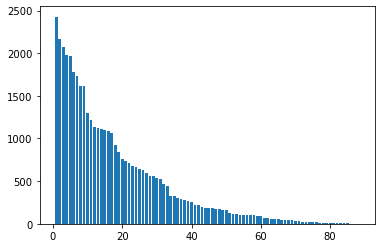

In [347]:
scores = np.sort(selector_chi2.scores_)[::-1]
indices = np.arange(1, 89, 1)
plt.bar(indices, scores, color='#1f77b4')
plt.show()

Let's slice it a bit to determin where exactly the sharp drops are.

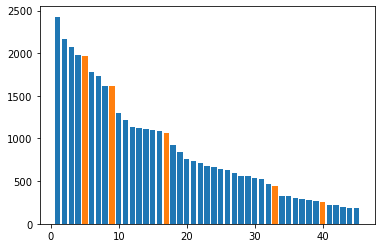

In [348]:
colors = []
for i in indices:
    if i in (5, 9, 17, 33, 40):
        colors.append('#ff7f0e')
    else:
        colors.append('#1f77b4')

plt.bar(indices[:45], scores[:45], color=colors)
plt.show()

Several drops in scores can be indentified: after 5th, 9th, 17th, 33th, and after 40th best feature the values are negiligible. 

In [349]:
k_options = [5, 9, 17, 33, 40]

Let's see which are the best 9 features, for example.

In [350]:
k = 9

scores = selector_chi2.scores_
indices = np.argsort(scores)[::-1]
k_best_features = list(phone_features.columns.values[indices[0:k]])
print(k_best_features)

['network_LTE', 'main_camera_HDR', 'body_sim_mini', 'display_type_IPS', 'body_sim_nano', 'display_type_24bit', 'platform_cpu_cores', 'display_type_capacitive', 'platform_os_Android']


<a id="DimReduction"></a>
### 3. Dimensionality Reduction

Linear dimensionality reduction is applied in order to obtain lower-dimensional data while preserving as much of the data's variation as possible.

In [351]:
pca = PCA(random_state=seed)

In [352]:
pcs = pca.fit_transform(phone_features_train)

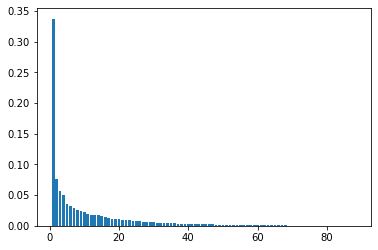

In [353]:
expl_var = pca.explained_variance_ratio_
indices = np.arange(1, 89, 1)
plt.bar(indices, expl_var)
plt.show()

In [354]:
np.sum(pca.explained_variance_ratio_[:1])

0.33720555469685326

In [355]:
np.sum(pca.explained_variance_ratio_[:2])

0.41421332642417286

The first principle component explains 0.3372 of the variance and the first two together explain 0.4142 of the variance. Let's scatter plot them and see 2D representation of the labels.

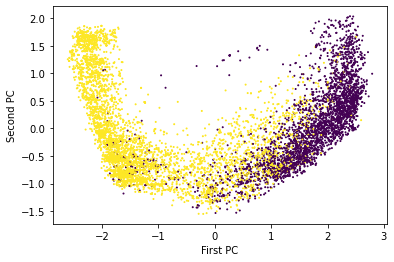

In [356]:
first_pc, second_pc = pcs[:, 0], pcs[:, 1]

plt.scatter(first_pc, second_pc, c=phone_label_train, s=1)
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.show()

The two classes are clearly divisible, although there is some overlapping here:

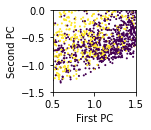

In [357]:
first_pc, second_pc = pcs[:, 0], pcs[:, 1]

plt.figure(figsize=(1.5, 1.5))
plt.scatter(first_pc, second_pc, c=phone_label_train, s=1)
plt.xlim([0.5, 1.5])
plt.ylim([-1.5, 0])
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.show()

Let's see how many PCA components are needed to explain 0.70, 0.75, 0.80, 0.85, 0.90, and 0.95 of the variance, respectively.

In [358]:
np.sum(pca.explained_variance_ratio_[:11])

0.7071312613840348

In [359]:
np.sum(pca.explained_variance_ratio_[:14])

0.7597817520465644

In [360]:
np.sum(pca.explained_variance_ratio_[:17])

0.8026280221593226

In [361]:
np.sum(pca.explained_variance_ratio_[:22])

0.8548295026858944

In [362]:
np.sum(pca.explained_variance_ratio_[:29])

0.9056353369873905

In [363]:
np.sum(pca.explained_variance_ratio_[:40])

0.9524443688391724

Starting from 11 PCA components for 0.70 of the variance, we need another:
-  3 PCA components for additional 0.05 (up to 0.75)
-  3 PCA components for additional 0.05 (up to 0.80)
-  5 PCA components for additional 0.05 (up to 0.85)
-  7 PCA components for additional 0.05 (up to 0.90)
- 11 PCA components for additional 0.05 (up to 0.95)

Considering the above trade off between number of components and variance explained, the number of PCA components will be limited to 22 explaining 0.85 of the variance.

In [364]:
n_components_options = [11, 14, 17, 22]

<a id="Dummy"></a>
### 4. Dummy Classifier

A **DummyClassifier** will be used a simple baseline to compare with the other classifiers, i.e. any other classifier is expected to perform better on the given dataset. The DummyClassifier itself is completely independent of the training data.
In this case, **'stratified' strategy** is used to generate predictions. It generates predictions by respecting the training set’s class distribution.

In [365]:
dummy = DummyClassifier(random_state=seed)

In [366]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [367]:
def fit_and_score(estimator, train_attributes, train_labels):
    """Fit model, print confusion matrix, classification report, cross-validation results"""
    
    start = time.time()
    estimator.fit(train_attributes, train_labels)
    stop = time.time()
    
    cm = confusion_matrix(train_labels, estimator.predict(train_attributes), normalize='all')
    
    cr = classification_report(train_labels, estimator.predict(train_attributes))
    
    scoring = ['f1', 'recall']
    cv_scores = cross_validate(estimator,
                               train_attributes,
                               train_labels,
                               return_train_score=True,
                               scoring=scoring,
                               cv = skf)
    
    f1_train = cv_scores['train_f1']
    f1_train_mean = cv_scores['train_f1'].mean()
    f1_train_std = cv_scores['train_f1'].std()
    f1_val = cv_scores['test_f1']
    f1_val_mean = cv_scores['test_f1'].mean()
    f1_val_std = cv_scores['test_f1'].std()
    
    recall_train = cv_scores['train_recall']
    recall_train_mean = cv_scores['train_recall'].mean()
    recall_train_std = cv_scores['train_recall'].std()
    recall_val = cv_scores['test_recall']
    recall_val_mean = cv_scores['test_recall'].mean()
    recall_val_std = cv_scores['test_recall'].std()
    
    print("CONFUSION MATRIX:"), print(cm), print(), \
    print("CLASSIFICATION REPORT:"), print(cr), print(), \
    print("CROSS-VALIDATION RESULTS:"), \
        print(f'Train F1-Score (mean):      {f1_train_mean:.4f}', end='    '), \
        print(f'Train F1-Score (std):      {f1_train_std:.4f}'), \
        print(f'Validation F1-Score (mean): {f1_val_mean:.4f}', end='    '), \
        print(f'Validation F1-Score (std): {f1_val_std:.4f}'), \
        print(f'Train Recall (mean):        {recall_train_mean:.4f}', end='    '), \
        print(f'Train Recall (std):        {recall_train_std:.4f}'), \
        print(f'Validation Recall (mean):   {recall_val_mean:.4f}', end='    '), \
        print(f'Validation Recall (std):   {recall_val_std:.4f}')
    
    return stop - start

In [368]:
_ = fit_and_score(dummy, phone_features_train, phone_label_train)

CONFUSION MATRIX:
[[0.17046042 0.23887739]
 [0.23654941 0.35411278]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42      3165
           1       0.60      0.60      0.60      4567

    accuracy                           0.52      7732
   macro avg       0.51      0.51      0.51      7732
weighted avg       0.52      0.52      0.52      7732


CROSS-VALIDATION RESULTS:
Train F1-Score (mean):      0.5876    Train F1-Score (std):      0.0046
Validation F1-Score (mean): 0.5937    Validation F1-Score (std): 0.0087
Train Recall (mean):        0.5879    Train Recall (std):        0.0046
Validation Recall (mean):   0.5934    Validation Recall (std):   0.0087


One of important implication from using the DummyClassifier is to demonstrate the difference between the metrics, considering the 60/40 distribution of the dataset. The dataset imbalance focus our attention to the **F1 Score** for Class 1 (discontinued devices). Moreover, considering the pace of innovation, we do not want to miss any 'positive value' and also **Recall** will be a metric of interest. *In the case of the DummyClassifier Recall and Precision are almost equal as FN and FP observations are almost equal. However, this is not expected to be the case with other estimators.*

The other important implication is to show that any analytic approach for a classification problem should be better than a random guessing approach. That is each algorthim should achive **F1 Score and Recall greater than 0.60**.

<a id="LogisticRegression"></a>
### 5. Logistic Regression

Logistic Regression is one of the most basic algorithms to solve a classification problem. It is used to model the probability of a certain class or event existing, in this case discontinuance of a phone.

As a first step, the model is fit without feature selection or any hyperparameter optimization.

In [369]:
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000)

In [370]:
_ = fit_and_score(logistic_regression, phone_features_train, phone_label_train)

CONFUSION MATRIX:
[[0.37454734 0.03479048]
 [0.03272116 0.55794102]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3165
           1       0.94      0.94      0.94      4567

    accuracy                           0.93      7732
   macro avg       0.93      0.93      0.93      7732
weighted avg       0.93      0.93      0.93      7732


CROSS-VALIDATION RESULTS:
Train F1-Score (mean):      0.9429    Train F1-Score (std):      0.0007
Validation F1-Score (mean): 0.9413    Validation F1-Score (std): 0.0021
Train Recall (mean):        0.9443    Train Recall (std):        0.0010
Validation Recall (mean):   0.9428    Validation Recall (std):   0.0045


Although both F1-Score and Recall are above 0.94, there are **no clear signs of overfitting** as train and test scores are similar and the standard deviations are low. The misclassified samples are few. However, the **model complexity is high** with 88 phone features used. 

Let's **try to reduce model complexity while keeping model performance high**, by applying feature selection or dimensionality reduction and optimizing the hyperparameters.

For LogisticRegression the following hyperparameters will be optimized:
* `C` - Inverse of regularization strength (λ) - trying to increase the regularization
* `fit_intercept` - Specifies if a constant (a.k.a. bias or intercept) should be added

`penalty` or the norm used in the penalization will not be changed from its default value `l2` as feature selection or dimensionality reduction will be applied.

In [371]:
pipe_lr = Pipeline([
    ('reduce_dim', 'passthrough'),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
    ])

In [372]:
param_grid_lr = [
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': k_options,
        'classifier__C': [1e-3, 1e-2, 1e-1, 1e-0],
        'classifier__fit_intercept': [True, False]
    },
    {
        'reduce_dim': [PCA(random_state=seed)],
        'reduce_dim__n_components': n_components_options,
        'classifier__C': [1e-3, 1e-2, 1e-1, 1e-0],
        'classifier__fit_intercept': [True, False]
    }
]

In [373]:
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid_lr, scoring='f1', cv=skf, return_train_score=True)

In [374]:
grid_lr.fit(phone_features_train, phone_label_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2212, shuffle=True),
             estimator=Pipeline(steps=[('reduce_dim', 'passthrough'),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid=[{'classifier__C': [0.001, 0.01, 0.1, 1.0],
                          'classifier__fit_intercept': [True, False],
                          'reduce_dim': [SelectKBest(k=40,
                                                     score_func=<function chi2 at 0x1195C738>)],
                          'reduce_dim__k': [5, 9, 17, 33, 40]},
                         {'classifier__C': [0.001, 0.01, 0.1, 1.0],
                          'classifier__fit_intercept': [True, False],
                          'reduce_dim': [PCA(random_state=2212)],
                          'reduce_dim__n_components': [11, 14, 17, 22]}],
             return_train_score=True, scoring='f1')

In [375]:
grid_lr.best_params_

{'classifier__C': 1.0,
 'classifier__fit_intercept': True,
 'reduce_dim': SelectKBest(k=40, score_func=<function chi2 at 0x1195C738>),
 'reduce_dim__k': 40}

In [376]:
grid_lr_results = pd.DataFrame(grid_lr.cv_results_)
grid_lr_results.sort_values(by='rank_test_score', inplace=True)

In [377]:
grid_lr_results[['param_classifier__C', 'param_classifier__fit_intercept', 'param_reduce_dim', 'param_reduce_dim__k', \
                 'param_reduce_dim__n_components', 'mean_test_score', 'std_test_score', 'rank_test_score', \
                 'mean_train_score', 'std_train_score']].head()

,param_classifier__C,param_classifier__fit_intercept,param_reduce_dim,param_reduce_dim__k,param_reduce_dim__n_components,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
34,1,True,"SelectKBest(k=40, score_func=<function chi2 at...",40,NaN,0.939386,0.002703,1,0.939620,0.001121
33,1,True,"SelectKBest(k=40, score_func=<function chi2 at...",33,NaN,0.939137,0.002155,2,0.939354,0.000942
39,1,False,"SelectKBest(k=40, score_func=<function chi2 at...",40,NaN,0.936744,0.002478,3,0.937631,0.000637
38,1,False,"SelectKBest(k=40, score_func=<function chi2 at...",33,NaN,0.935910,0.002084,4,0.937584,0.000288
24,0.1,True,"SelectKBest(k=40, score_func=<function chi2 at...",40,NaN,0.932573,0.003100,5,0.933213,0.000510


The best pipe as selected by GridSearchCV selects the best 40 features. Otherwise the estimator is identical to the base one. The difference between base estimator and best estimator is 0.0019 and the number of features is reduced from 88 to 40. What is more the difference between base estimator and **second best estimator** is 0.0022 and the number of features is reduces with another 7. Aiming at less complexity the latter **is selected as the optimal logistic regression**. It should be noted that the interpretability of the results is kept as original features are selected instaed of PCA components.

In [378]:
pipe_lr_best = Pipeline([
    ('reduce_dim', SelectKBest(chi2, k=33)),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
    ])

In [379]:
fit_time_pipe_lr_best = fit_and_score(pipe_lr_best, phone_features_train, phone_label_train)

CONFUSION MATRIX:
[[0.37325401 0.03608381]
 [0.03582514 0.55483704]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3165
           1       0.94      0.94      0.94      4567

    accuracy                           0.93      7732
   macro avg       0.93      0.93      0.93      7732
weighted avg       0.93      0.93      0.93      7732


CROSS-VALIDATION RESULTS:
Train F1-Score (mean):      0.9394    Train F1-Score (std):      0.0009
Validation F1-Score (mean): 0.9391    Validation F1-Score (std): 0.0022
Train Recall (mean):        0.9395    Train Recall (std):        0.0014
Validation Recall (mean):   0.9391    Validation Recall (std):   0.0038


Let's see the **final model coefficients**.

In [380]:
pipe_lr_best.named_steps['classifier'].intercept_

array([2.18031625])

In [381]:
mask = pipe_lr_best.named_steps['reduce_dim'].get_support()
selected_features = phone_features.columns[mask]
coef = pipe_lr_best.named_steps['classifier'].coef_[0]
coef_weights = (np.absolute(pipe_lr_best.named_steps['classifier'].coef_) / \
                    np.sum(np.absolute(pipe_lr_best.named_steps['classifier'].coef_)))[0]


pipe_lr_best_coef = pd.DataFrame({'Phone Features':selected_features, 
                                  'Coefficients':coef, 
                                  'Coefficients Weight': coef_weights})

pipe_lr_best_coef.sort_values(by=['Coefficients Weight'], ascending=False)

,Phone Features,Coefficients,Coefficients Weight
9,body_sim_num,-4.486129,0.142633
31,features_sensors_num,4.402980,0.139989
22,platform_cpu_cores,-4.352737,0.138392
17,display_res_pix_r,2.208230,0.070209
8,body_sim_nano,-1.955300,0.062167
12,display_type_capacitive,-1.624091,0.051637
21,platform_chipset_rating,-1.610804,0.051214
6,body_sim_mini,1.416878,0.045049
7,body_sim_micro,-1.262338,0.040135
1,network_LTE,-1.165746,0.037064


The phone features impacting the algorith at most are `body_sim_num`, `features_sensors_num` and `platform_cpu_cores`.

<a id="DecisionTree"></a>
### 6. Decision Tree

Growing a tree for DecisionTreeClassifier involves deciding on which features to choose and what conditions to use for splitting, along with knowing when to stop.

As a first step, the model is fit without feature selection or any hyperparameter optimization.

In [382]:
decision_tree = DecisionTreeClassifier(random_state=seed)

In [383]:
_ = fit_and_score(decision_tree, phone_features_train, phone_label_train)

CONFUSION MATRIX:
[[4.09337817e-01 0.00000000e+00]
 [5.17330574e-04 5.90144853e-01]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3165
           1       1.00      1.00      1.00      4567

    accuracy                           1.00      7732
   macro avg       1.00      1.00      1.00      7732
weighted avg       1.00      1.00      1.00      7732


CROSS-VALIDATION RESULTS:
Train F1-Score (mean):      0.9996    Train F1-Score (std):      0.0001
Validation F1-Score (mean): 0.9347    Validation F1-Score (std): 0.0017
Train Recall (mean):        0.9993    Train Recall (std):        0.0001
Validation Recall (mean):   0.9341    Validation Recall (std):   0.0067


With no surprise, the model is **overfitting**. The model can be simplified with feature selection or dimensionality reduction. But for decision tree specifically, in order to take advantage of the easy interpretability of the algorithm, it will be optimized by reducing the `max_depth` of the tree, increasing the `min_samples_leaf` and decisding on the splittint `criterion`. The max features will not be parametrized as, according to the Sklearn documentation, 'the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than `max_features` features'.

To get an intuition for the hyperparameters optimization, let's check the current **tree depth** and **feature importances**.

In [384]:
decision_tree.get_depth()

19

The `max_depth` is set to vary from 5 to 17, ensuring sufficient depth and limiting it to be below the base one.

The `min_samples_leaf` is set to vary between 5 and 75 that is approx. 1% of the sample.

In [385]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(5, 18, 2),
    'min_samples_leaf': np.arange(5, 76, 5),
}

In [386]:
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=seed), 
                       param_grid=param_grid_dt, 
                       scoring='f1', 
                       cv=skf, 
                       return_train_score=True)

In [387]:
grid_dt.fit(phone_features_train, phone_label_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2212, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=2212),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  7,  9, 11, 13, 15, 17]),
                         'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])},
             return_train_score=True, scoring='f1')

In [388]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 20}

In [389]:
grid_dt_results = pd.DataFrame(grid_dt.cv_results_)
grid_dt_results.sort_values(by='rank_test_score', inplace=True)
grid_dt_results['train_test_diff'] = grid_dt_results['mean_test_score'] - grid_dt_results['mean_train_score']

In [390]:
grid_dt_results[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', \
                 'rank_test_score', 'mean_train_score', 'std_train_score', 'train_test_diff']].head(20)

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,train_test_diff
93,gini,17,20,0.942573,0.005976,1,0.952960,0.001644,-0.010387
78,gini,15,20,0.942573,0.005976,1,0.952960,0.001644,-0.010387
63,gini,13,20,0.942573,0.005976,1,0.952960,0.001644,-0.010387
48,gini,11,20,0.942468,0.005885,4,0.952960,0.001644,-0.010492
92,gini,17,15,0.942370,0.006735,5,0.956181,0.001463,-0.013810
77,gini,15,15,0.942370,0.006735,5,0.956181,0.001463,-0.013810
62,gini,13,15,0.942370,0.006735,5,0.956181,0.001463,-0.013810
18,gini,7,20,0.942218,0.005677,8,0.951118,0.001166,-0.008900
47,gini,11,15,0.942176,0.006714,9,0.956243,0.001417,-0.014067
33,gini,9,20,0.942154,0.005649,10,0.952824,0.001657,-0.010670


A lot of parameter combinations give similar results. As a optimum the parameters raked as 8 are selected, more specifically:
* `max_depth` = 7 - allowing good representation and easy interpretability 
* `min_samples_leaf` = 20 - the maximum of the best combinations
* no change in default `criterion` - 'gini'

Those hyperparameters are chosen becuase they allow lower complexity of the model and in addition have:
- 0.0004 lower mean of F1-Score compared to the best parameters
- 0.0003 lower standard deviation of F1-Score compared to the best parameters
- 0.0015 lower difference between train and test F1-Scores compared to the best parameters

In [391]:
dt_best = DecisionTreeClassifier(max_depth=7, min_samples_leaf=20, random_state=seed)

In [392]:
fit_time_dt_best = fit_and_score(dt_best, phone_features_train, phone_label_train)

CONFUSION MATRIX:
[[0.38282462 0.02651319]
 [0.0312985  0.55936368]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3165
           1       0.95      0.95      0.95      4567

    accuracy                           0.94      7732
   macro avg       0.94      0.94      0.94      7732
weighted avg       0.94      0.94      0.94      7732


CROSS-VALIDATION RESULTS:
Train F1-Score (mean):      0.9511    Train F1-Score (std):      0.0012
Validation F1-Score (mean): 0.9422    Validation F1-Score (std): 0.0057
Train Recall (mean):        0.9427    Train Recall (std):        0.0048
Validation Recall (mean):   0.9334    Validation Recall (std):   0.0061


Let's see the **rules of the final tree**.

In [395]:
dt_best_rules = export_text(dt_best, feature_names=list(phone_features_train))
print(dt_best_rules)

|--- platform_cpu_cores <= 0.22
|   |--- body_sim_mini <= 0.50
|   |   |--- features_sensors_num <= 0.17
|   |   |   |--- body_sim_micro <= 0.50
|   |   |   |   |--- body_sim_num <= 0.17
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- body_sim_num >  0.17
|   |   |   |   |   |--- battery_mAh_log <= 0.39
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- battery_mAh_log >  0.39
|   |   |   |   |   |   |--- oem_7 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- oem_7 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- body_sim_micro >  0.50
|   |   |   |   |--- battery_mAh_log <= 0.51
|   |   |   |   |   |--- oem_7 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- oem_7 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- battery_mAh_log >  0.51
|   |   |   |   |   |--- oem_2 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- oem_2 >  0.50
|   |   |   |   |   |   |--- cl

In [396]:
dt_features = pd.DataFrame(data=dt_best.feature_importances_, 
                           index=phone_features.columns, 
                           columns=['Feature Importance'])
dt_features.sort_values(by='Feature Importance', ascending=False, inplace=True)

In [397]:
dt_features[dt_features['Feature Importance']>0].shape

(25, 1)

In [398]:
dt_features.head(3)

,Feature Importance
platform_cpu_cores,0.803203
body_sim_mini,0.085200
body_sim_micro,0.026245


25 phone features have been used in total, where the most significant ones are `platform_cpu_cores`, `body_sim_mini` and `body_sim_micro`.

<a id="RandomForest"></a>
### 7. Random Forest

The Random Forest is another frequently used classifier. It is ensemble algorithm that uses multiple decision trees. The Random Forest classifier is a modified bagging algorithm of a Decision Trees each using a bootstrap sample and randomly selected features. The final classification is determined by majority vote.

As a first step, the model is fit without feature selection or any hyperparameter optimization.

In [399]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=seed)

In [400]:
_ = fit_and_score(random_forest, phone_features_train, phone_label_train)

CONFUSION MATRIX:
[[4.09337817e-01 0.00000000e+00]
 [5.17330574e-04 5.90144853e-01]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3165
           1       1.00      1.00      1.00      4567

    accuracy                           1.00      7732
   macro avg       1.00      1.00      1.00      7732
weighted avg       1.00      1.00      1.00      7732


CROSS-VALIDATION RESULTS:
Train F1-Score (mean):      0.9996    Train F1-Score (std):      0.0001
Validation F1-Score (mean): 0.9564    Validation F1-Score (std): 0.0020
Train Recall (mean):        0.9996    Train Recall (std):        0.0003
Validation Recall (mean):   0.9492    Validation Recall (std):   0.0043


Again, with no doubt, the model is **overfitting**.

In addition to the decision tree hyperparameters, here also the `n_estimators` that is the number of individual trees can be optimized. To a certain extent, what is learned from the Decision Tree can be used here:
* `max_depth` will be limited from 1 to 7 (the stand alone decision tree depth is 7)
* `min_sample_leaf` will be limited again from 5 to 75 (the stand alone decision tree min sample leaf was 20)
* no change in the default `criterion` that is `gini`

In addition, as the ease of interpretability is already lost, PCA components can be tested, where the number of the particular components is limited to 22 (explaining 0.85 of the variability, but the selection is left to the estimator.

In [401]:
pipe_rf = Pipeline([
    ('reduce_dim', 'passthrough'),
    ('classifier', RandomForestClassifier(random_state=seed))
    ])

In [402]:
param_grid_rf = [
    {
        'classifier__n_estimators': np.arange(100, 501, 100),
        'classifier__max_depth': np.arange(1, 8, 1),
        'classifier__min_samples_leaf': np.arange(5, 76, 10)
        
    },
    {
        'reduce_dim': [PCA(n_components=22, random_state=seed)],
        'classifier__n_estimators': np.arange(100, 501, 100),
        'classifier__max_depth': np.arange(1, 8, 1),
        'classifier__min_samples_leaf': np.arange(5, 76, 10)
    }
]

In [403]:
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, scoring='f1', cv=skf, return_train_score=True)

In [404]:
grid_rf.fit(phone_features_train, phone_label_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2212, shuffle=True),
             estimator=Pipeline(steps=[('reduce_dim', 'passthrough'),
                                       ('classifier',
                                        RandomForestClassifier(random_state=2212))]),
             param_grid=[{'classifier__max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                          'classifier__min_samples_leaf': array([ 5, 15, 25, 35, 45, 55, 65, 75]),
                          'classifier__n_estimators': array([100, 200, 300, 400, 500])},
                         {'classifier__max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                          'classifier__min_samples_leaf': array([ 5, 15, 25, 35, 45, 55, 65, 75]),
                          'classifier__n_estimators': array([100, 200, 300, 400, 500]),
                          'reduce_dim': [PCA(n_components=22,
                                             random_state=2212)]}],
             return_train_score=True, scoring

In [405]:
dump(grid_rf, 'gridsearchcv/grid_rf_object.pkl')
# grid_rf = load('gridsearchcv/grid_rf_object.pkl') 

['gridsearchcv/grid_rf_object.pkl']

In [406]:
grid_rf.best_params_

{'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 5,
 'classifier__n_estimators': 300}

In [407]:
grid_rf_results = pd.DataFrame(grid_rf.cv_results_)
grid_rf_results.sort_values(by='rank_test_score', inplace=True)
grid_rf_results.to_csv('data/grid_rf_results.csv')
# grid_rf_results = pd.read_csv('data/grid_rf_results.csv')

In [408]:
grid_rf_results[['param_classifier__max_depth', 'param_classifier__min_samples_leaf', \
                 'param_classifier__n_estimators', 'param_reduce_dim', 'mean_test_score', 'std_test_score', \
                 'rank_test_score', 'mean_train_score', 'std_train_score']].head()

,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__n_estimators,param_reduce_dim,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
242,7,5,300,NaN,0.945545,0.003054,1,0.954768,0.000939
240,7,5,100,NaN,0.945312,0.003282,2,0.954428,0.001142
243,7,5,400,NaN,0.945276,0.003629,3,0.954823,0.000774
241,7,5,200,NaN,0.945209,0.003604,4,0.954639,0.000835
244,7,5,500,NaN,0.945157,0.003331,5,0.954728,0.000743


 No significant difference is observed between the top estimators, all of them with `max_depth`=7 and `min_samples_leaf`=5, but differenciated by the number of individual estimators. The simple algorithm is preferred, i.e. the one with 100 individual estimator (the difference with the best one is only 0.0002).

In [409]:
rf_best = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=5, random_state=seed)

In [410]:
fit_time_rf_best = fit_and_score(rf_best, phone_features_train, phone_label_train)

CONFUSION MATRIX:
[[0.38657527 0.02276255]
 [0.0320745  0.55858769]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3165
           1       0.96      0.95      0.95      4567

    accuracy                           0.95      7732
   macro avg       0.94      0.95      0.94      7732
weighted avg       0.95      0.95      0.95      7732


CROSS-VALIDATION RESULTS:
Train F1-Score (mean):      0.9544    Train F1-Score (std):      0.0011
Validation F1-Score (mean): 0.9453    Validation F1-Score (std): 0.0033
Train Recall (mean):        0.9476    Train Recall (std):        0.0019
Validation Recall (mean):   0.9385    Validation Recall (std):   0.0019


Let's see how many features have been used and which are with highest importance.

In [411]:
rf_features = pd.DataFrame(data=rf_best.feature_importances_, 
                           index=phone_features.columns, 
                           columns=['Feature Importance'])
rf_features.sort_values(by='Feature Importance', ascending=False, inplace=True)

In [412]:
rf_features[rf_features['Feature Importance']>0].shape

(80, 1)

In [413]:
rf_features.head(3)

,Feature Importance
display_size_ratio,0.110019
body_sim_mini,0.107613
platform_cpu_cores,0.100455


<a id="SVM"></a>
### 8. Support Vector Machine

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

As a first step, the model is fit without feature selection or any hyperparameter optimization.

In [414]:
svc_linear = LinearSVC(random_state=seed)

In [415]:
_ = fit_and_score(svc_linear, phone_features_train, phone_label_train)

CONFUSION MATRIX:
[[0.374418   0.03491981]
 [0.03194516 0.55871702]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3165
           1       0.94      0.95      0.94      4567

    accuracy                           0.93      7732
   macro avg       0.93      0.93      0.93      7732
weighted avg       0.93      0.93      0.93      7732


CROSS-VALIDATION RESULTS:
Train F1-Score (mean):      0.9437    Train F1-Score (std):      0.0013
Validation F1-Score (mean): 0.9419    Validation F1-Score (std): 0.0051
Train Recall (mean):        0.9459    Train Recall (std):        0.0020
Validation Recall (mean):   0.9453    Validation Recall (std):   0.0053


Although both F1-Score and Recall are above 0.94, there are **no clear signs of overfitting** as train and test scores are similar and the standard deviations are low. However, the **model complexity is high** with 88 phone features used. 

Let's **try to reduce model complexity while keeping model performance high**, by applying feature selection or dimensionality reduction and optimizing the hyperparameters.

For LinearSVM the following hyperparameters will be optimized:
* `C` - Inverse of regularization strength (λ) - trying to increase the regularization
* `fit_intercept` - Specifies if a constant (a.k.a. bias or intercept) should be added

`penalty` or the norm used in the penalization will not be changed from its default value `l2` as feature selection or dimensionality reduction will be applied.

In [416]:
pipe_svc_linear = Pipeline([
    ('reduce_dim', 'passthrough'),
    ('classifier', LinearSVC(random_state=seed))
    ])

In [417]:
param_grid_svc_linear = [
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': k_options,
        'classifier__C': [1e-3, 1e-2, 1e-1, 1e-0],
        'classifier__fit_intercept': [True, False]
    },
    {
        'reduce_dim': [PCA(random_state=seed)],
        'reduce_dim__n_components': n_components_options,
        'classifier__C': [1e-3, 1e-2, 1e-1, 1e-0],
        'classifier__fit_intercept': [True, False]
    }
]

In [418]:
grid_svc_linear = GridSearchCV(pipe_svc_linear, 
                               param_grid=param_grid_svc_linear, 
                               scoring='f1', 
                               cv=skf, 
                               return_train_score=True)

In [419]:
grid_svc_linear.fit(phone_features_train, phone_label_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2212, shuffle=True),
             estimator=Pipeline(steps=[('reduce_dim', 'passthrough'),
                                       ('classifier',
                                        LinearSVC(random_state=2212))]),
             param_grid=[{'classifier__C': [0.001, 0.01, 0.1, 1.0],
                          'classifier__fit_intercept': [True, False],
                          'reduce_dim': [SelectKBest(k=40,
                                                     score_func=<function chi2 at 0x1195C738>)],
                          'reduce_dim__k': [5, 9, 17, 33, 40]},
                         {'classifier__C': [0.001, 0.01, 0.1, 1.0],
                          'classifier__fit_intercept': [True, False],
                          'reduce_dim': [PCA(random_state=2212)],
                          'reduce_dim__n_components': [11, 14, 17, 22]}],
             return_train_score=True, scoring='f1')

In [420]:
grid_svc_linear.best_params_

{'classifier__C': 1.0,
 'classifier__fit_intercept': True,
 'reduce_dim': SelectKBest(k=40, score_func=<function chi2 at 0x1195C738>),
 'reduce_dim__k': 40}

In [421]:
grid_svc_linear_results = pd.DataFrame(grid_svc_linear.cv_results_)
grid_svc_linear_results.sort_values(by='rank_test_score', inplace=True)

In [422]:
grid_svc_linear_results[['param_classifier__C', 'param_classifier__fit_intercept', 'param_reduce_dim', \
                         'param_reduce_dim__k', 'param_reduce_dim__n_components', 'mean_test_score', \
                         'std_test_score', 'rank_test_score', 'mean_train_score', 'std_train_score']].head()

,param_classifier__C,param_classifier__fit_intercept,param_reduce_dim,param_reduce_dim__k,param_reduce_dim__n_components,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
34,1,True,"SelectKBest(k=40, score_func=<function chi2 at...",40,NaN,0.938288,0.002723,1,0.938844,0.001074
33,1,True,"SelectKBest(k=40, score_func=<function chi2 at...",33,NaN,0.938179,0.002019,2,0.938752,0.000799
24,0.1,True,"SelectKBest(k=40, score_func=<function chi2 at...",40,NaN,0.936676,0.003061,3,0.937745,0.001011
39,1,False,"SelectKBest(k=40, score_func=<function chi2 at...",40,NaN,0.936307,0.002751,4,0.937555,0.000476
23,0.1,True,"SelectKBest(k=40, score_func=<function chi2 at...",33,NaN,0.936051,0.003095,5,0.937621,0.001021


The best pipe as selected by GridSearchCV selects the best 40 features. Otherwise the estimator is identical to the base one. The difference between base estimator and best estimator is 0.0036 and the number of features is reduced from 88 to 40. What is more the difference between base estimator and **second best estimator** is 0.0037 and the number of features is reduces with another 7. Aiming at less complexity the latter **is selected as the optimal linear SVC**. It should be noted that the interpretability of the results is kept as original features are selected instaed of PCA components.

In [423]:
pipe_svc_linear_best = Pipeline([
    ('reduce_dim', SelectKBest(chi2, k=33)),
    ('classifier', LinearSVC(random_state=seed))
    ])

In [424]:
fit_time_pipe_svc_linear_best = fit_and_score(pipe_svc_linear_best, phone_features_train, phone_label_train)

CONFUSION MATRIX:
[[0.37377134 0.03556648]
 [0.03634247 0.55431971]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3165
           1       0.94      0.94      0.94      4567

    accuracy                           0.93      7732
   macro avg       0.93      0.93      0.93      7732
weighted avg       0.93      0.93      0.93      7732


CROSS-VALIDATION RESULTS:
Train F1-Score (mean):      0.9388    Train F1-Score (std):      0.0008
Validation F1-Score (mean): 0.9382    Validation F1-Score (std): 0.0020
Train Recall (mean):        0.9380    Train Recall (std):        0.0021
Validation Recall (mean):   0.9369    Validation Recall (std):   0.0032


Let's see the **final model coefficients**.

In [425]:
pipe_svc_linear_best.named_steps['classifier'].intercept_

array([0.50797967])

In [426]:
mask = pipe_svc_linear_best.named_steps['reduce_dim'].get_support()
selected_features = phone_features.columns[mask]
coef = pipe_svc_linear_best.named_steps['classifier'].coef_[0]
coef_weights = (np.absolute(pipe_svc_linear_best.named_steps['classifier'].coef_) / \
                    np.sum(np.absolute(pipe_svc_linear_best.named_steps['classifier'].coef_)))[0]


pipe_svc_linear_best_coef = pd.DataFrame({'Phone Features':selected_features, 
                                     'Coefficients':coef, 
                                     'Coefficients Weight': coef_weights})

pipe_svc_linear_best_coef.sort_values(by=['Coefficients Weight'], ascending=False)

,Phone Features,Coefficients,Coefficients Weight
31,features_sensors_num,1.746241,0.170910
22,platform_cpu_cores,-1.604704,0.157057
9,body_sim_num,-1.021293,0.099957
17,display_res_pix_r,0.948727,0.092855
8,body_sim_nano,-0.595238,0.058258
21,platform_chipset_rating,-0.512786,0.050188
6,body_sim_mini,0.488122,0.047774
7,body_sim_micro,-0.404369,0.039577
12,display_type_capacitive,-0.393293,0.038493
1,network_LTE,-0.299679,0.029330


Can we achive better performance using the **'kernel trick'**?

In [427]:
svc_kernel = SVC(random_state=seed)

In [428]:
_ = fit_and_score(svc_kernel, phone_features_train, phone_label_train)

CONFUSION MATRIX:
[[0.38269529 0.02664252]
 [0.02858251 0.56207967]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3165
           1       0.95      0.95      0.95      4567

    accuracy                           0.94      7732
   macro avg       0.94      0.94      0.94      7732
weighted avg       0.94      0.94      0.94      7732


CROSS-VALIDATION RESULTS:
Train F1-Score (mean):      0.9520    Train F1-Score (std):      0.0012
Validation F1-Score (mean): 0.9460    Validation F1-Score (std): 0.0039
Train Recall (mean):        0.9500    Train Recall (std):        0.0015
Validation Recall (mean):   0.9426    Validation Recall (std):   0.0068


The results are better to both the default linear SVC and tuned linear SVC. Can we reach even better performace with hyperparamters optimization?

Again feature selection or PCA dimensionality reduction will be applied. In addition to the `C` hyperparameter, also `gamma` will be tuned. As the first regulates the penalty for error and second regulates the fit, they are expected to go in opposite directions. Considering that the base model do not show signs of overfitting, the range of the hyperparameters is set to vary between 0.001 and 1000.

In [429]:
pipe_svc_kernel = Pipeline([
    ('reduce_dim', 'passthrough'),
    ('classifier', SVC(random_state=seed))
    ])

In [430]:
param_grid_svc_kernel = [
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': k_options,
        'classifier__C': [1e-3, 1e-2, 1e-1, 1e-0, 1e+1, 1e+2, 1e+3],
        'classifier__gamma': [1e-3, 1e-2, 1e-1, 1e-0, 1e+1, 1e+2, 1e+3]
    },
    {
        'reduce_dim': [PCA(random_state=seed)],
        'reduce_dim__n_components': n_components_options,
        'classifier__C': [1e-3, 1e-2, 1e-1, 1e-0, 1e+1, 1e+2, 1e+3],
        'classifier__gamma': [1e-3, 1e-2, 1e-1, 1e-0, 1e+1, 1e+2, 1e+3]
    }
]

In [431]:
grid_svc_kernel = GridSearchCV(pipe_svc_kernel,
                            param_grid=param_grid_svc_kernel,
                            scoring='f1',
                            cv=skf,
                            return_train_score=True)

In [432]:
grid_svc_kernel.fit(phone_features_train, phone_label_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2212, shuffle=True),
             estimator=Pipeline(steps=[('reduce_dim', 'passthrough'),
                                       ('classifier', SVC(random_state=2212))]),
             param_grid=[{'classifier__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                            1000.0],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                100.0, 1000.0],
                          'reduce_dim': [SelectKBest(k=40,
                                                     score_func=<function chi2 at 0x1195C738>)],
                          'reduce_dim__k': [5, 9, 17, 33, 40]},
                         {'classifier__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                            1000.0],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1.0, 10.0,
                                                100.0, 1000.0],
   

In [433]:
dump(grid_svc_kernel, 'gridsearchcv/grid_svc_kernel_object.pkl')
# grid_rf = load('gridsearchcv/grid_svc_kernel_object.pkl')

['gridsearchcv/grid_svc_kernel_object.pkl']

In [434]:
grid_svc_kernel.best_params_

{'classifier__C': 10.0,
 'classifier__gamma': 0.1,
 'reduce_dim': SelectKBest(k=40, score_func=<function chi2 at 0x1195C738>),
 'reduce_dim__k': 40}

In [435]:
grid_svc_kernel_results = pd.DataFrame(grid_svc_kernel.cv_results_)
grid_svc_kernel_results.sort_values(by='rank_test_score', inplace=True)
grid_svc_kernel_results['train_test_diff'] = \
    grid_svc_kernel_results['mean_test_score'] - grid_svc_kernel_results['mean_train_score']
grid_svc_kernel_results.to_csv('data/grid_svc_kernel_results.csv')
# grid_svc_kernel_results = pd.read_csv('data/grid_svc_kernel_results.csv')

In [436]:
grid_svc_kernel_results[['param_classifier__C', 'param_classifier__gamma', 'param_reduce_dim',
       'param_reduce_dim__k', 'param_reduce_dim__n_components', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'mean_train_score', 'std_train_score', 'train_test_diff']].head(10)

,param_classifier__C,param_classifier__gamma,param_reduce_dim,param_reduce_dim__k,param_reduce_dim__n_components,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score,train_test_diff
154,10,0.1,"SelectKBest(k=40, score_func=<function chi2 at...",40,NaN,0.949296,0.005241,1,0.961013,0.001572,-0.011717
368,10,0.1,PCA(random_state=2212),NaN,22,0.948922,0.003826,2,0.962237,0.001205,-0.013316
343,1,1,PCA(random_state=2212),NaN,17,0.948646,0.001030,3,0.970500,0.000786,-0.021854
395,100,0.1,PCA(random_state=2212),NaN,17,0.948638,0.005004,4,0.973177,0.001255,-0.024539
344,1,1,PCA(random_state=2212),NaN,22,0.948165,0.001725,5,0.977123,0.000491,-0.028958
394,100,0.1,PCA(random_state=2212),NaN,14,0.947813,0.003720,6,0.967285,0.001194,-0.019472
396,100,0.1,PCA(random_state=2212),NaN,22,0.947745,0.004417,7,0.980839,0.001161,-0.033094
153,10,0.1,"SelectKBest(k=40, score_func=<function chi2 at...",33,NaN,0.947493,0.004930,8,0.959232,0.002087,-0.011739
189,100,0.1,"SelectKBest(k=40, score_func=<function chi2 at...",40,NaN,0.947295,0.003901,9,0.974955,0.000745,-0.027660
367,10,0.1,PCA(random_state=2212),NaN,17,0.947085,0.003158,10,0.957622,0.000682,-0.010537


The best estimator applies feature selection and considers only the best 40 features. In addition, `C` hyperparameter is optimized to 10 (i.e. less regularizarion, more penalty for errors) and `gamma` hyperparameter is optimized to 0.1 (i.e better fitting through Gaussian process applied to more data points with shrinked coverange of the nearest points).

In [437]:
pipe_svc_kernel_best = grid_svc_kernel.best_estimator_

In [438]:
fit_time_pipe_svc_kernel_best = fit_and_score(pipe_svc_kernel_best, phone_features_train, phone_label_train)

CONFUSION MATRIX:
[[0.38644594 0.02289188]
 [0.02315054 0.56751164]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3165
           1       0.96      0.96      0.96      4567

    accuracy                           0.95      7732
   macro avg       0.95      0.95      0.95      7732
weighted avg       0.95      0.95      0.95      7732


CROSS-VALIDATION RESULTS:
Train F1-Score (mean):      0.9610    Train F1-Score (std):      0.0016
Validation F1-Score (mean): 0.9493    Validation F1-Score (std): 0.0052
Train Recall (mean):        0.9607    Train Recall (std):        0.0015
Validation Recall (mean):   0.9507    Validation Recall (std):   0.0039


<a id="Stacking"></a>
### 9. Stacking Classifier

Stacked generalization consists in stacking the output of individual estimator and use a classifier to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

Considering the already trained classifiers, all of them achieving very satisfactory scores, it not necessary to train also a Stacking Classifier that requires the tuning of all individual estimators. However, from purely experimental purposes, having all individual estimators already tuned, it worth checking if the Stacking Classifier will achieve better results and what will be the difference with the individual ones.

In [439]:
estimators = [
    ('lr', pipe_lr_best),
    ('dt', dt_best),
    ('rf', rf_best),
    ('svc_l', pipe_svc_linear_best),
    ('svc_k', pipe_svc_kernel_best)
]

In [440]:
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [441]:
fit_time_stacking = fit_and_score(stacking, phone_features_train, phone_label_train)

CONFUSION MATRIX:
[[0.38541128 0.02392654]
 [0.02198655 0.56867563]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3165
           1       0.96      0.96      0.96      4567

    accuracy                           0.95      7732
   macro avg       0.95      0.95      0.95      7732
weighted avg       0.95      0.95      0.95      7732


CROSS-VALIDATION RESULTS:
Train F1-Score (mean):      0.9625    Train F1-Score (std):      0.0016
Validation F1-Score (mean): 0.9514    Validation F1-Score (std): 0.0034
Train Recall (mean):        0.9635    Train Recall (std):        0.0022
Validation Recall (mean):   0.9520    Validation Recall (std):   0.0036


<a id="Summary"></a>
### 10. Final Algorithms Testing & Summary

The aim of this project was to **classify cell phones that are discontinued as of September 2020 based on their specifications**. For this purpose an extensive EDA and feature engineering on dataset scraped from an e-commerce platform was performed. From there on several classifiers have been trained - once using the default hyperparameters and again using the tuned ones, namely:
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* Linear SVM Classifier
* Kernel SVM Classifier
* Stacking Classifier

Before going to the final algorithms testing, let's **compare the results obtained during training**.

| Classifier (tuned) | Interpretability |  Train Time | Train F1 Score | F1 Score Diff ww Default | N Features | TOP 3 Features |
| --- | :-: | --- | --- | --- | --- | :- |
| Logistic Regression | Y |  0.1631 | 0.94 | 0.00 | 33 | body_sim_num; features_sensors_num; platform_cpu_cores |
| Decision Tree | Y | 0.2015 | 0.95 | OF | 25 | platform_cpu_cores; body_sim_mini; body_sim_micro |
| Random Forest | N | 1.2839 | 0.95 | OF | 80 | platform_cpu_cores; body_sim_mini; display_size_ratio |
| Linear SVC | Y | 0.2922 | 0.94 | 0.00 | 33 | features_sensors_num; platform_cpu_cores; body_sim_num |
| Kernel SVC | N | 1.8979 | 0.96 | 0.01 | 40 | - |
| Stacking | N | 17.5634 | 0.96 | - | - | - |

* The train scores across different classifiers are similar.
* The values metrics reported (Accuracy, F1 score, and Recall score) were similar as (1) the dataset is relatively balances (60/40 distribution) and (2) the share of misclassified samples in the two classess is similar.
* The base Decision Tree and Random Forest algorithms were overfitting as no restrictions on depth and min leaf size are applied by default. 
* The base of the other classifiers showed no signs of overfitting.
* The tuned classifiers are selected using GridSearchCV and further manual selection for all cases apart from Kernel SVC.
* The estimator of the tuned Logistic Regression and Linear SVC algorithms is no different from the default one.
* The estimator of the tuned Kernel SVC is with both `C` and `gamma` optimized hyperparameters, where more penalty is imposed on the error term and the data is fitted more precisely.
* The training time needed is highest, naturally, for Stacking Classifier, followed by Kernel SVC and Random Forest. On the other hand, the shortest time needed for training is for Logistic Regression, followed by Decision Tree.
* PCA dimentionality reductions was not selected for any of the algorithms.
* The smalles number of features (25) is used by Decision Tree and the highest number of features (80) is used by Random Forest.
* In TOP 3 features, where they can be identified, `platform_cpu_cores` is present for all algorithms.
* The TOP 3 features of the linear classifers are identical.

Now, let's proceed to the final algorithms testing.

In [442]:
labels = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'LinearSVC', 'KernelSVC', 'StackingClassifier']
classifiers = [pipe_lr_best, dt_best, rf_best, pipe_svc_linear_best, pipe_svc_kernel_best, stacking]
f1_scores_train = []
recall_scores_train = []
f1_scores_test = []
recall_scores_test = []
auc_pr = []
predict_time = []

In [443]:
for c in classifiers:
    start = time.time()
    phone_label_predicted = c.predict(phone_features_test)
    end = time.time()
    
    f1_scores_train.append(f1_score(phone_label_train, c.predict(phone_features_train)))
    recall_scores_train.append(recall_score(phone_label_train, c.predict(phone_features_train)))
    f1_scores_test.append(f1_score(phone_label_test, phone_label_predicted))
    recall_scores_test.append(recall_score(phone_label_test, phone_label_predicted))
    
    try:
        precision, recall, _ = precision_recall_curve(phone_label_test, c.predict_proba(phone_features_test)[:, 1])
    except AttributeError:
         precision, recall, _ = precision_recall_curve(phone_label_test, c.decision_function(phone_features_test))
        
    auc_pr.append(auc(recall, precision))
    
    predict_time.append(end-start)

In [444]:
test_results = pd.DataFrame(list(zip(f1_scores_train, 
                                     recall_scores_train, 
                                     f1_scores_test, 
                                     recall_scores_test,
                                     auc_pr,
                                     predict_time)),
                                 columns=['Train F1 Score',
                                          'Train Recall Score', 
                                          'Test F1 Score',
                                          'Test Recall Score',
                                          'AUC Precision Recall',
                                          'Predict Time'],
                                 index=labels)
test_results['Diff F1 Score'] = test_results['Test F1 Score'] - test_results['Train F1 Score']
test_results['Diff Recall Score'] = test_results['Test Recall Score'] - test_results['Train Recall Score']

In [445]:
test_results = test_results[['Train F1 Score', 'Train Recall Score', \
                             'Test F1 Score', 'Test Recall Score', \
                             'Diff F1 Score', 'Diff Recall Score', \
                             'AUC Precision Recall', 'Predict Time']]

In [446]:
test_results

,Train F1 Score,Train Recall Score,Test F1 Score,Test Recall Score,Diff F1 Score,Diff Recall Score,AUC Precision Recall,Predict Time
LogisticRegression,0.939142,0.939347,0.931818,0.933450,-0.007324,-0.005897,0.979331,0.000000
DecisionTree,0.950863,0.947011,0.938901,0.935201,-0.011962,-0.011810,0.974632,0.007010
RandomForest,0.953211,0.945697,0.939527,0.938704,-0.013684,-0.006993,0.987197,0.099177
LinearSVC,0.939089,0.938472,0.932751,0.935201,-0.006337,-0.003270,0.975767,0.015624
KernelSVC,0.961016,0.960806,0.944056,0.945709,-0.016960,-0.015096,0.985116,0.244478
StackingClassifier,0.961198,0.962776,0.945074,0.949212,-0.016124,-0.013565,0.989728,0.312427


* The ranking by Test F1 Score and Test Recall Score is identical.
* Stacking Classifier otperforms the second best estimator with only 0.0010. For the rest of the analysis it will not be considered as it was trained for experimental purposes only.
* Kernel SVC is with the highest testing scores, followed by Random Forest; Logistic Regression and Linear SVC (i.e. the linear models) are with lowest testing scores. The difference between the first and the last is only 0.0122.
* On the contraty, Logistic Regression and Linear SVC (i.e. the linear models) are with the smallest difference between training and testing score; the one with largest difference is the top performer - Kernel SVC.
* Following AUC Precision Recall, the algorithm with largest AUC is Random Forest, followed by Kernel SVC; the one with smallest AUC is Decision Tree. The difference between the first and the last is only 0.0126.
* The fastest predictor is Logistic Regression, followed by Decision Tree. The slowest predictor is Kernel SVC.
* For the above it can be concuded that there is a trade off between perfomance and overfitting as well as between performance and prediction time.


Still, if one of the classifiers should be determined as the best out of all, it would be the Random Forest Classifier. 
* It has the second best performance (F1 Score 0.9389 and Recall Score 0.9352 and respective differences with the best one 0.0045 and 0.0070, respectively)
* It has the second largest difference with training score (0.0137), according to F1 Score, that is almost double the smallest one. However, the difference with the training score (0.0070), according to Recall Score, is in the middle.
* It has the largest AUC Precision Recall (0.9872).
* It has the second slowest prediction time that is still much faster than the one of Kernel SVC.

Recalling some of the arguments derived during the training phase:
* The positioning of the classifier is similar.
* The lack of easy interpretability can be considered as a disadvantage (if the interpretability was a leading characteristics of the algorithm, then Decision Tree Classifier would have been selected as the best one).

To conclude, cell phones have been classified as available or discontinued as of September 2020 based on their specifications. Six different tuned classifier have been employed. All of them show very good performance with scoring above 0.90 without indications of overfitting. Random Forest Classifier is determined as the best algorithm based on several criteria, that is F1 and Recall scores as well as AUC Precision Recall on testing dataset, difference between training and testing scores and, finally, prediction time. The cell phone features indicated as the onces having highest importance are `platform_cpu_cores`, `body_sim_mini` and `display_size_ratio`.

No previous researches on the topic have been identified. On the other hand, the dataset used is reported to be with quarterly expected update frequency (*next release at the beginning of 2021*). It will be intriguing to understand how long the trained algorithms can maintain high performance considering that the dataset tends to become significantly imbalanced. Moreover, the present data cannot answer the question how fast the technologies are changing as there is no discontinuance date. But the time between the present training and the time when a refinement would be needed will be a very good proxy.